<a href="https://colab.research.google.com/github/VaibhavBhusawale/-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project(Vaibhav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


**Contents in the Notebook**
  - <a> 1.1 Introduction</a>
  - <a> 1.2 Importing Dictionaries</a>
  - <a> 1.3 Data Warehousing</a>
  - <a> 1.4 Visual Inspection</a>
  - <a> 1.5 Exploratory Data Analysis (EDA)</a>
  - <a> 1.6 Feature engineering and selection</a>
  - <a> 1.7 Linear regression</a>
  - <a> 1.8 lasso Regression</a>
  - <a> 1.9 Ridge Regression</a>
  - <a> 2.0 Decision Tree Regression</a>
  - <a> 2.1 Light Gradient Boosting Machine</a>
  - <a> 2.2 Random forest</a>
  - <a> 2.3 Conclusion</a>








## **<a> 1.1 Introduction</a>**


##''The bike is a solution to complicated traffic''
A bike rental  business rents out bicycles for short periods of time, usually for a few hours. Most rentals are provided by bike shops as a sideline to their main businesses of sales and service, but shops specialize in rentals.

The rise of bike rental startups has brought an excellent opportunity for all the bike enthusiasts to travel across the all countries comfortably, conveniently and affordably. Now people can explore a new city on a rented bike of their choice, which allows them to enjoy a joyful ride experience without worrying about the bike maintenance hassles.



Head to the heart of Seoul to see the city's historical attractions as well as the modern sights of Seoul from a Seoul Bike. The grand palaces of Seoul as well as the four great gates (once the only way to enter or exit Seoul) are all in proximity to each other. There's no better way to explore Seoul's history than a tour through this area. For more modern attractions, visit one of Seoul's art museums. Seoul's museums offer both amazing art and fun activities for visitors to take part in. In the Four Great Gates area, there are Seoul Bike rental stations located every 500 meters, so sightseeing and bicycling in this area is both fun and convenient. Rent a bike, and park it at the rental station while you sightsee at each attraction. Here's an itinerary you may want to use on your bike trip:  Changdeokgung Palace - National Museum of Modern and Contemporary Art, Seoul - Gyeongbokgung Palace - Sejong Center for the Performing Arts - Jeongdong-gil -Sungnyemun Gate (Namdaemun).

##If climate changes, change your route##

# Hypothesis for the problem:

1. The number of bikes rented during rainfall/snowfall reduces.
2. The number of bikes rented increases during peak hours.
3. The number of bikes rented during weekends is less compared to weekdays.
4. The number of bikes rented on holidays is less compared to that of working days.
5. The number of bikes rented reduces if there is high humidity.
6. The number of bikes rented on days with high solar radiations is low.
7. The number of bikes rented on average in summer is higher compared to other seasons.

## **<a>1.2 Importing Dictionaries</a>**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **<a> 1.3 Data Warehousing</a>**

In [ ]:
# Call drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data

path = '/content/drive/MyDrive/SeoulBikeData.csv'

df = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
# Basic inspection

df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# updating the attribute names

df = df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
df.head()

date  rented_bike_count  hour  ...  seasons     holiday  func_day
0  01/12/2017                254     0  ...   Winter  No Holiday       Yes
1  01/12/2017                204     1  ...   Winter  No Holiday       Yes
2  01/12/2017                173     2  ...   Winter  No Holiday       Yes
3  01/12/2017                107     3  ...   Winter  No Holiday       Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday       Yes

[5 rows x 14 columns]

In [ ]:
df.shape

(8760, 14)

Checking the missing values:

In [ ]:
df.isnull().sum()

date                 0
rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

In this dataset zero missing values

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe()

rented_bike_count         hour  ...     rainfall     snowfall
count        8760.000000  8760.000000  ...  8760.000000  8760.000000
mean          704.602055    11.500000  ...     0.148687     0.075068
std           644.997468     6.922582  ...     1.128193     0.436746
min             0.000000     0.000000  ...     0.000000     0.000000
25%           191.000000     5.750000  ...     0.000000     0.000000
50%           504.500000    11.500000  ...     0.000000     0.000000
75%          1065.250000    17.250000  ...     0.000000     0.000000
max          3556.000000    23.000000  ...    35.000000     8.800000

[8 rows x 10 columns]

In [ ]:
df.describe().shape

(8, 10)

# **<a> 1.4 Visual Inspection</a>**

In [ ]:
# converting date column from string to datetime features

df['date'] = pd.to_datetime(df.date)

The date column is converted to datetime datatype

In [ ]:
#add month , day, year columns
for df in [df]:
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day

#Analysis of bike rents and correlation with weather conditions

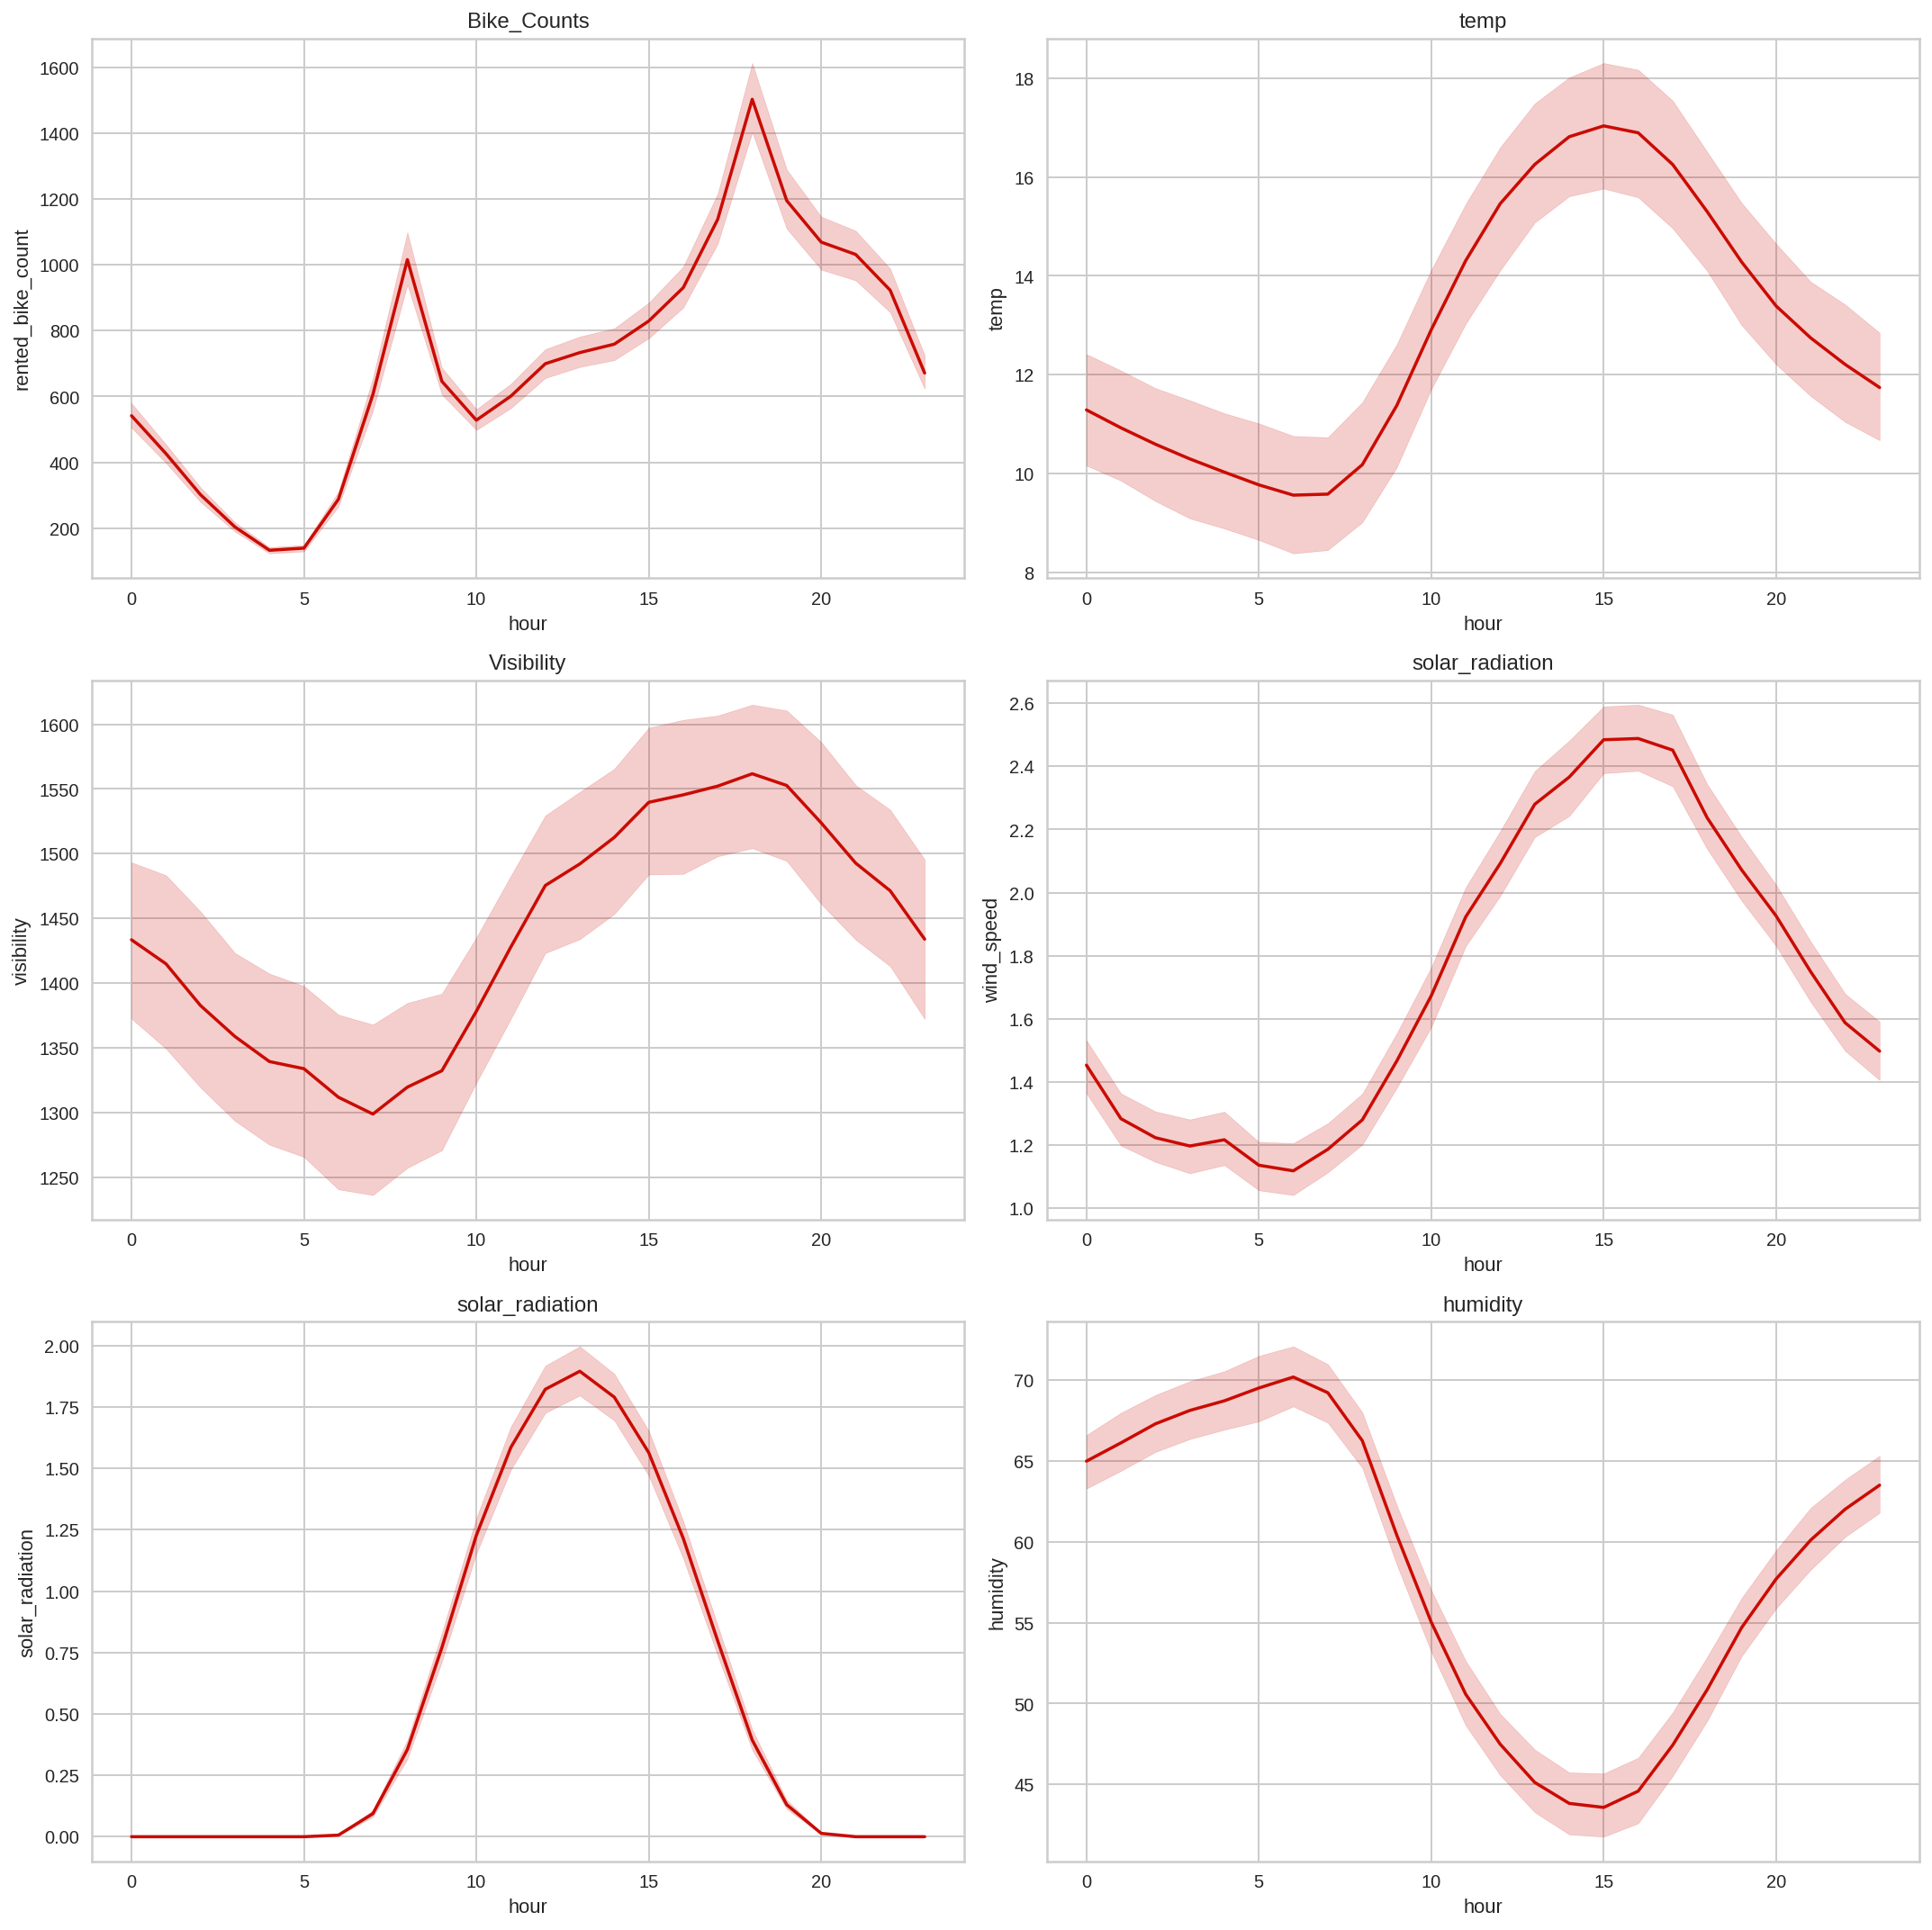

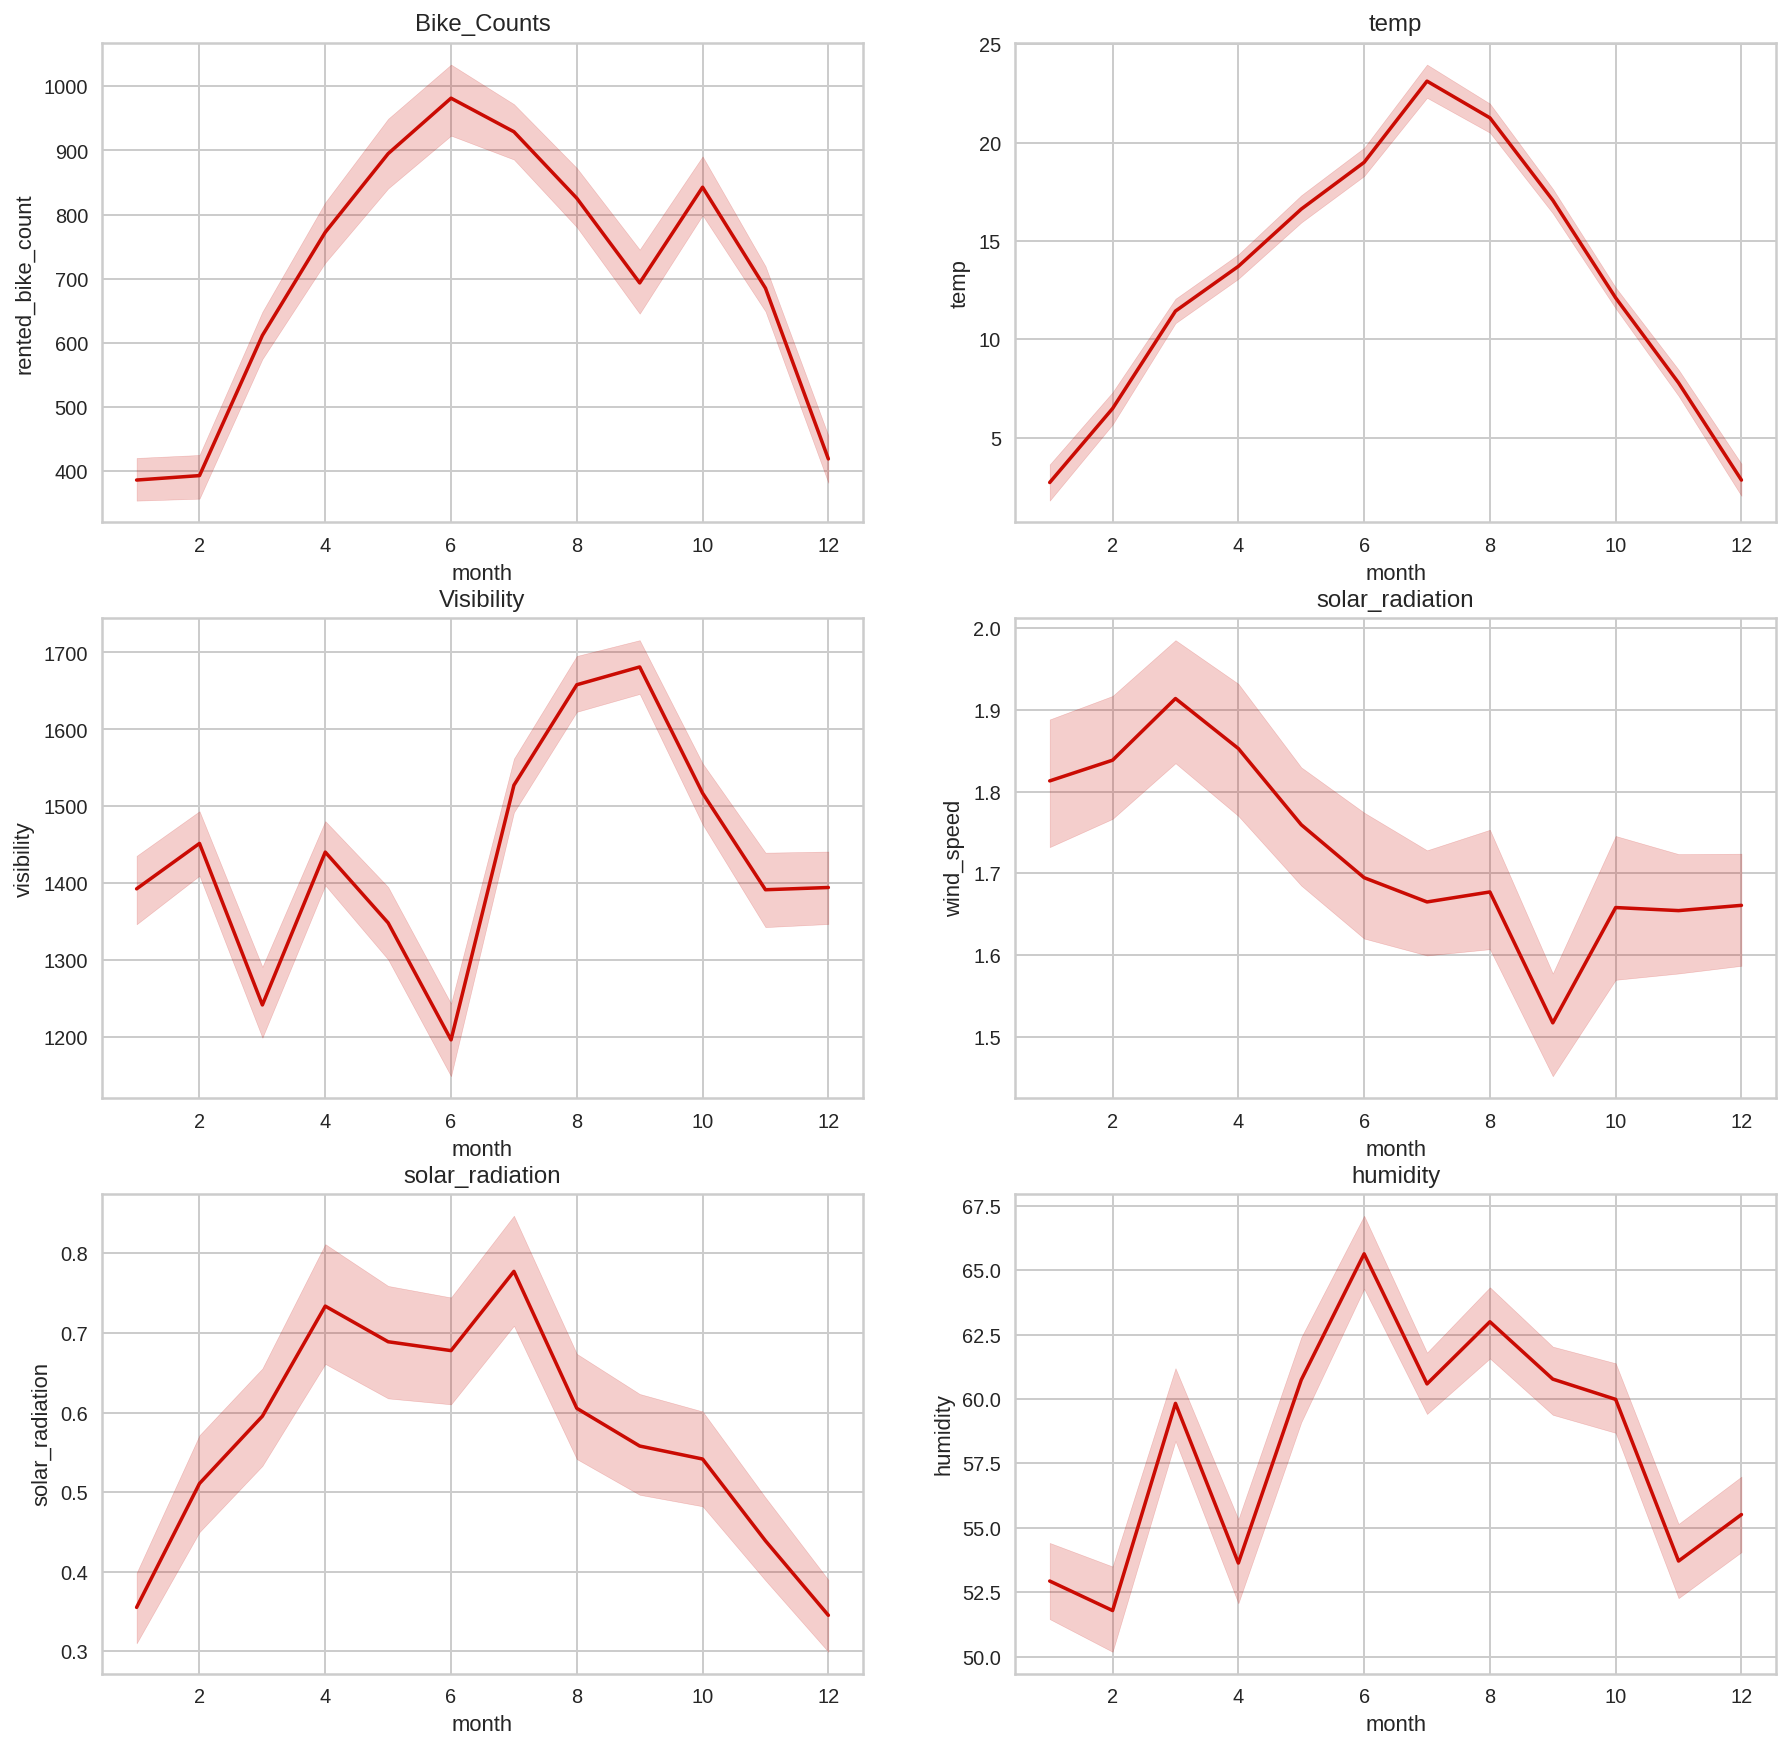

In [ ]:
# Weather conditions hourly basis 
y= [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])
        

# Weather conditions monthly basis

plt.tight_layout()

m = [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=m[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])




**1)Weather condition hourly basis**
   
In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00). There are two peak occurences, at 7.00 and at 17.00, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon.


**2)Weather condition monthly basis**

In monthly basis, there are two peaks occur in June and October.

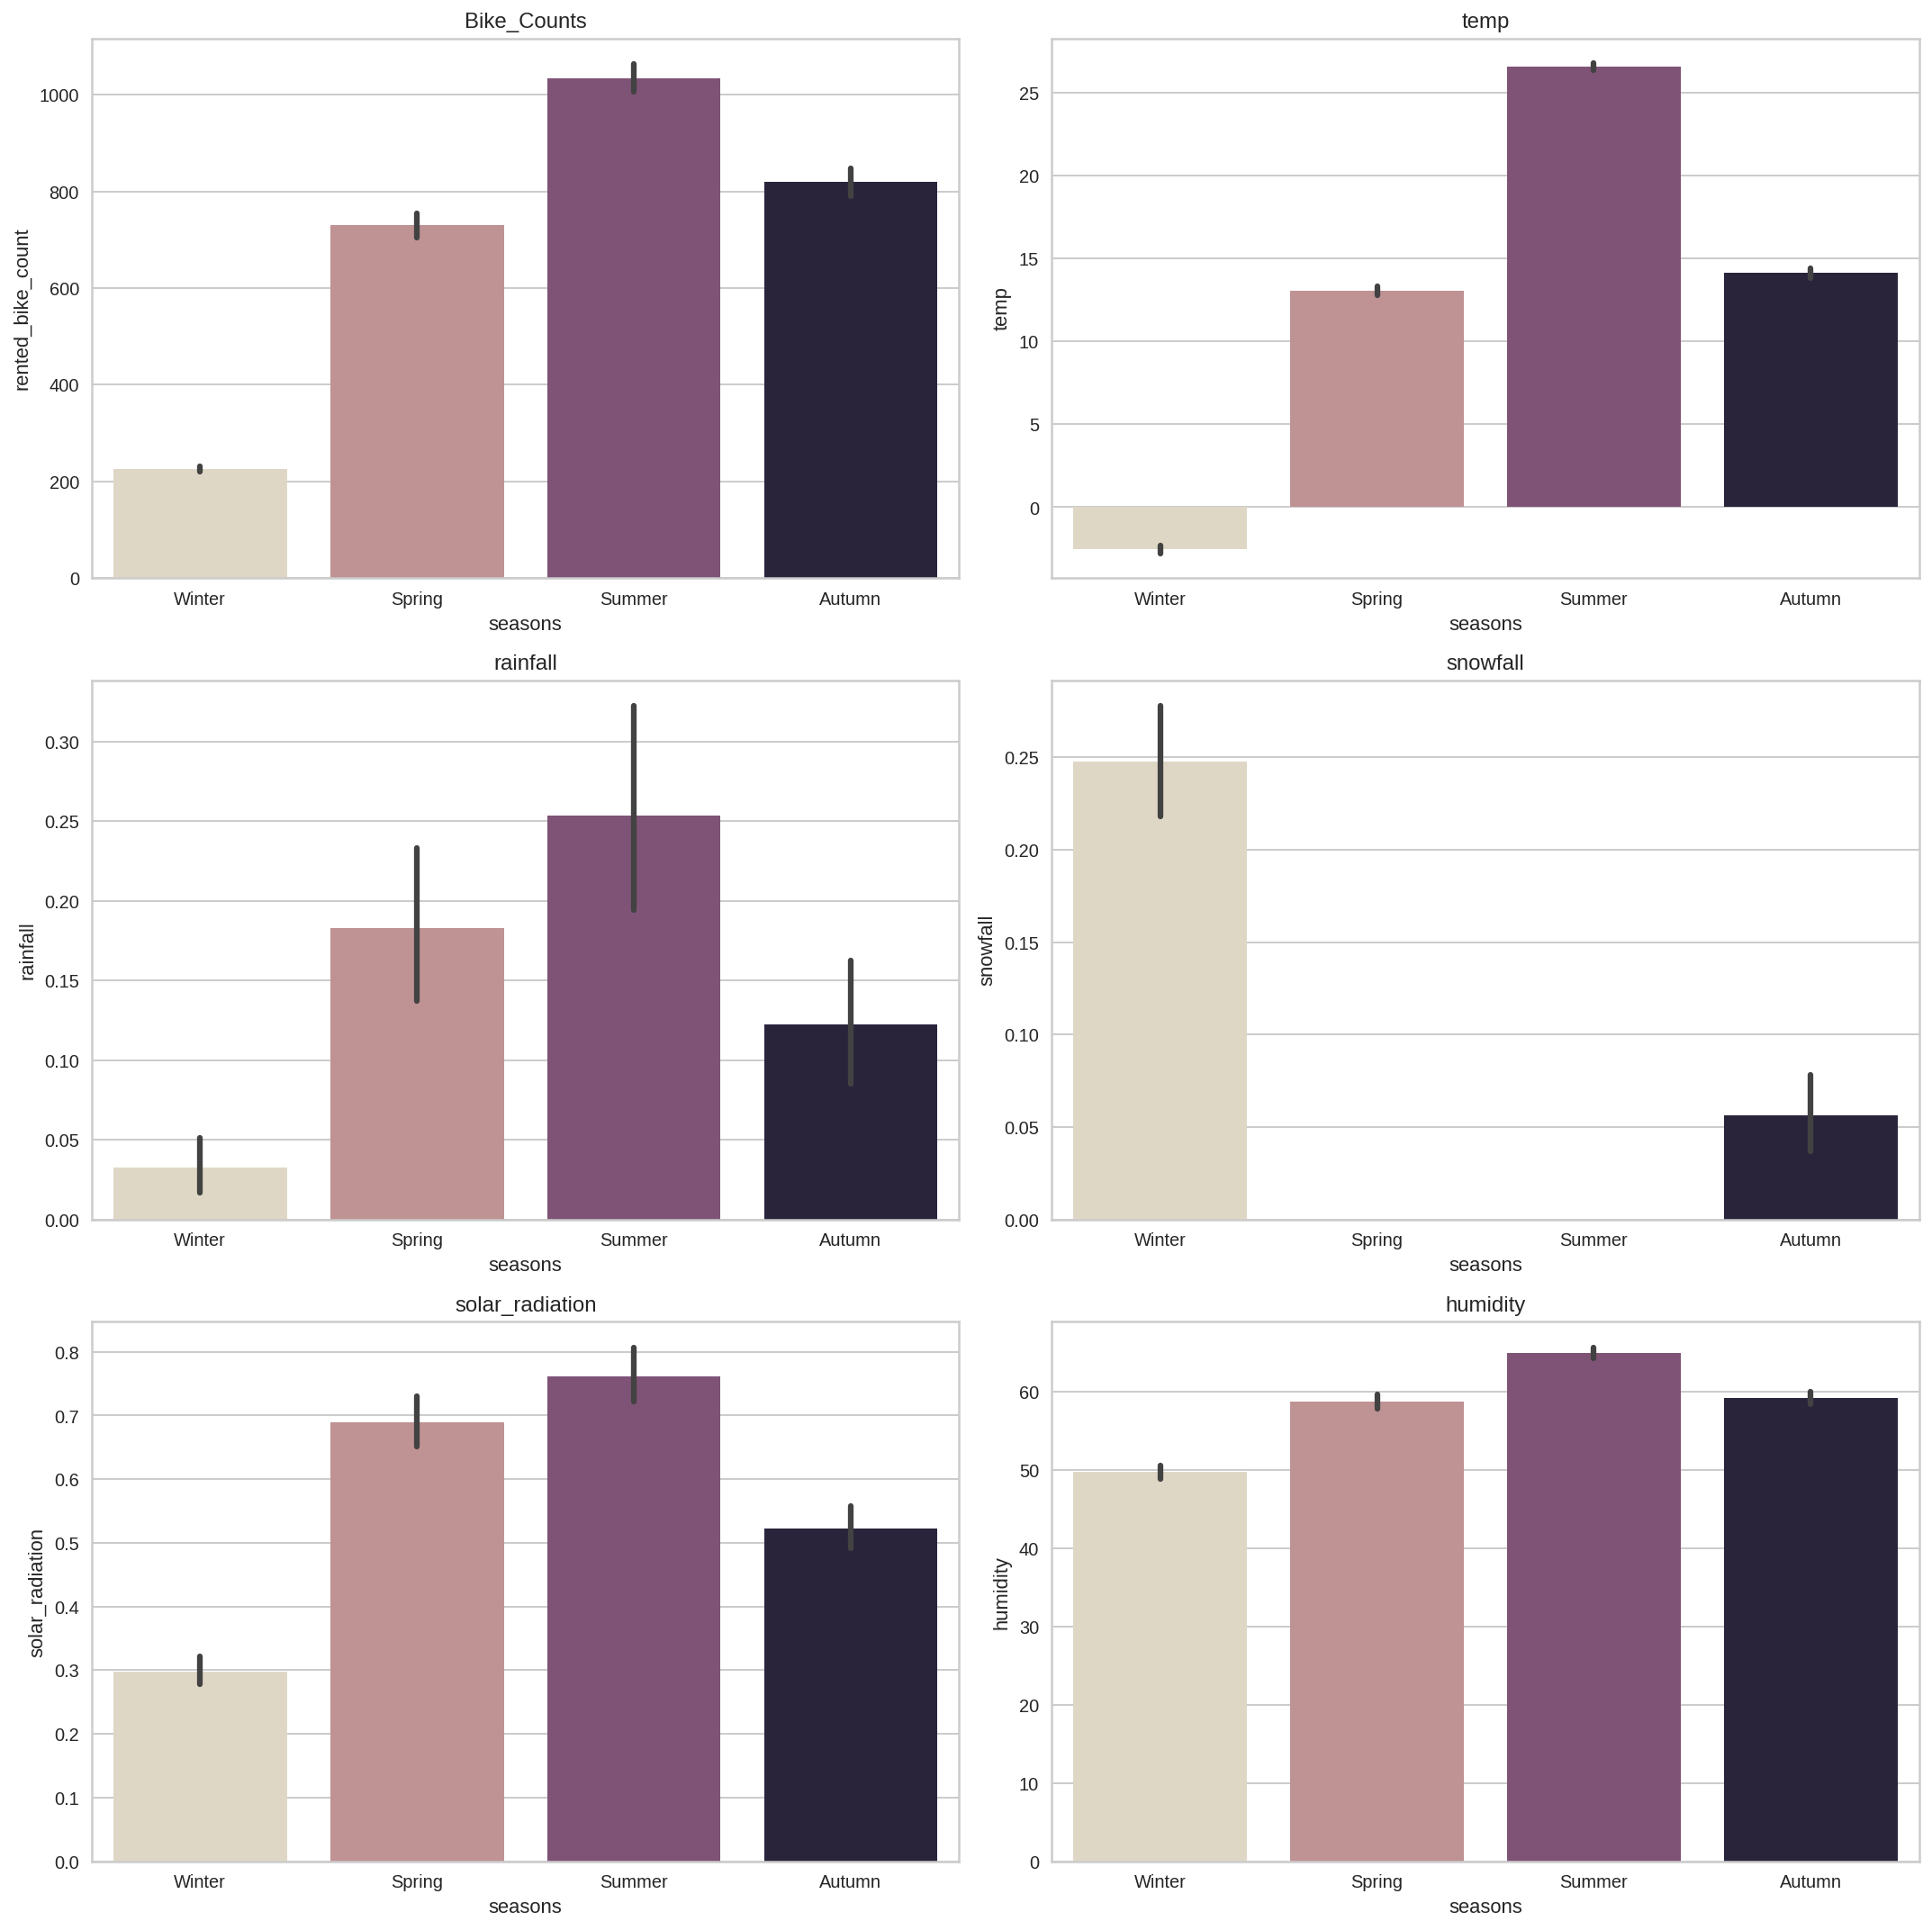

In [ ]:
#correlation of bike rented season wise with temperature ,Rainfall, SolarRadiation,Snofall and Humidity
s= [['rented_bike_count', 'temp'], ['rainfall', 'snowfall'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['rainfall', 'snowfall'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='seasons', y=s[i][j], ax=ax[i][j], color='r',palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()  


The number of bikes rented in the months of December, January, and February is very less compared to that of other months.

There are very less number of bikes being rented in winter, and it is the highest in the summer.

#**When does bike rents sharing facility not function?**



In [ ]:
#ploting Piot table for the function day or not function day with respect to holiday or not holiday
pd.pivot_table(df, index=['holiday', 'func_day'], columns='seasons', values='rented_bike_count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

seasons              Autumn  Spring  Summer  Winter  TOTAL
holiday    func_day                                       
Holiday    No          24.0     NaN     NaN     NaN     24
           Yes         96.0    72.0    48.0   192.0    408
No Holiday No         223.0    48.0     NaN     NaN    271
           Yes       1841.0  2088.0  2160.0  1968.0   8057
TOTAL                2184.0  2208.0  2208.0  2160.0   8760

In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is a work day but not functioning
In spring, there are 48 records when that day is work day but not functioning
In conclusion, the bike rents do not function on some days in autumn and spring.

# **<a>1.5 Exploratory Data Analysis (EDA)</a>**

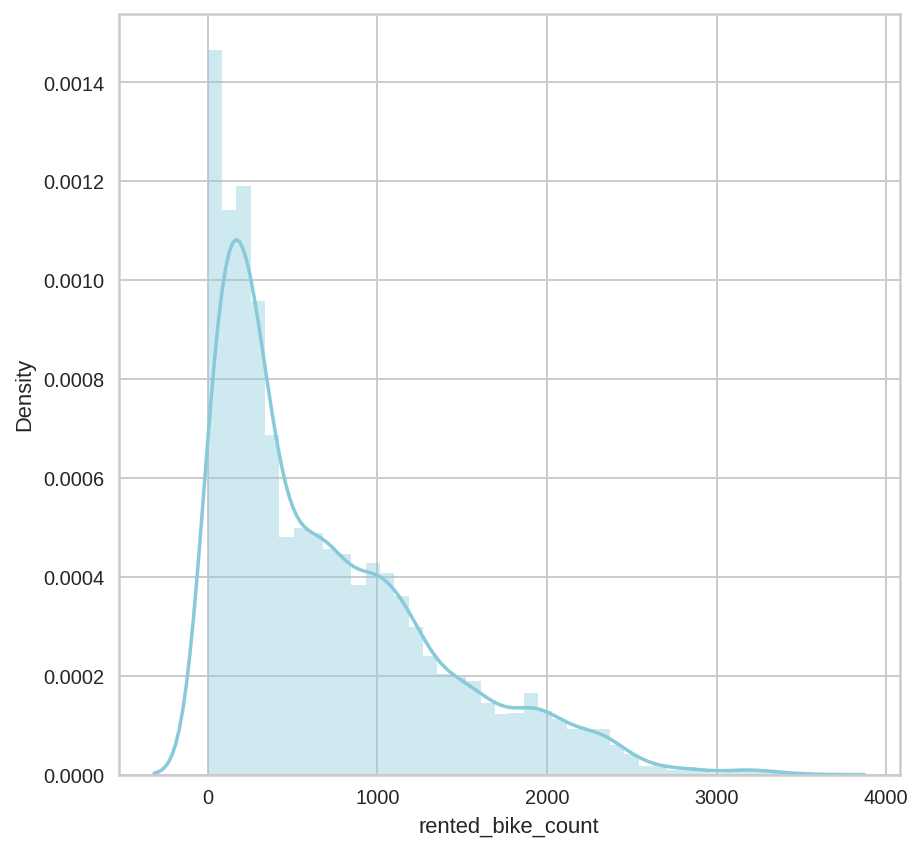

In [ ]:
# plot a bar plot for rented bike count
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'],color="c")

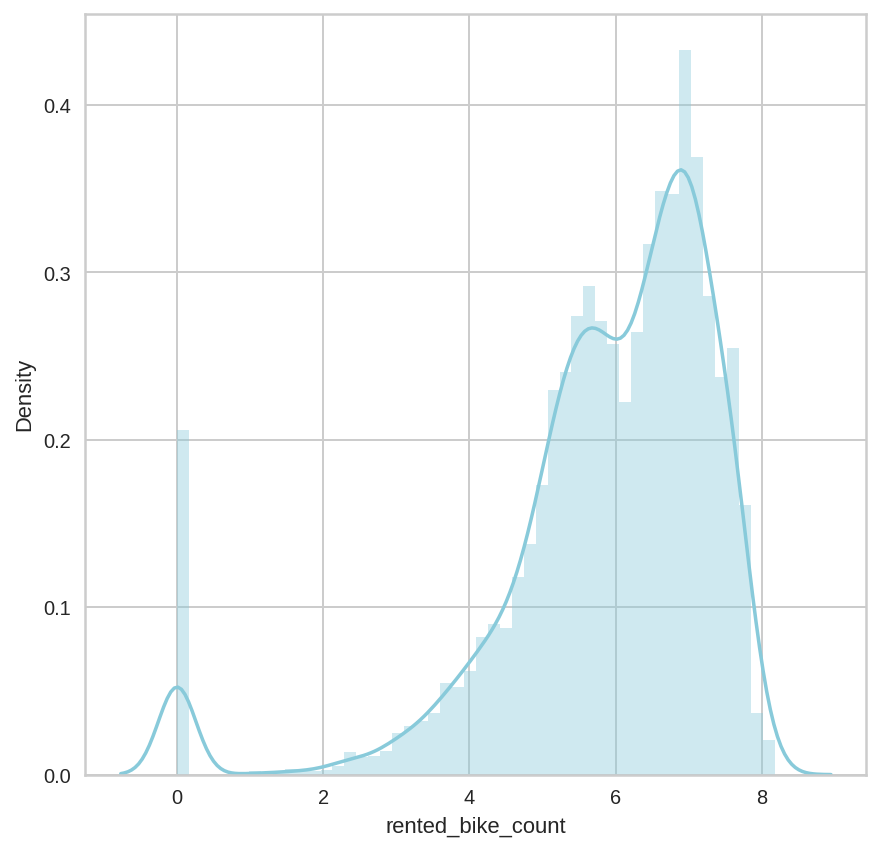

In [ ]:
# balancing the skewness using log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['rented_bike_count']+1),color="c")

The log transformation gives us a left skewed distriution.

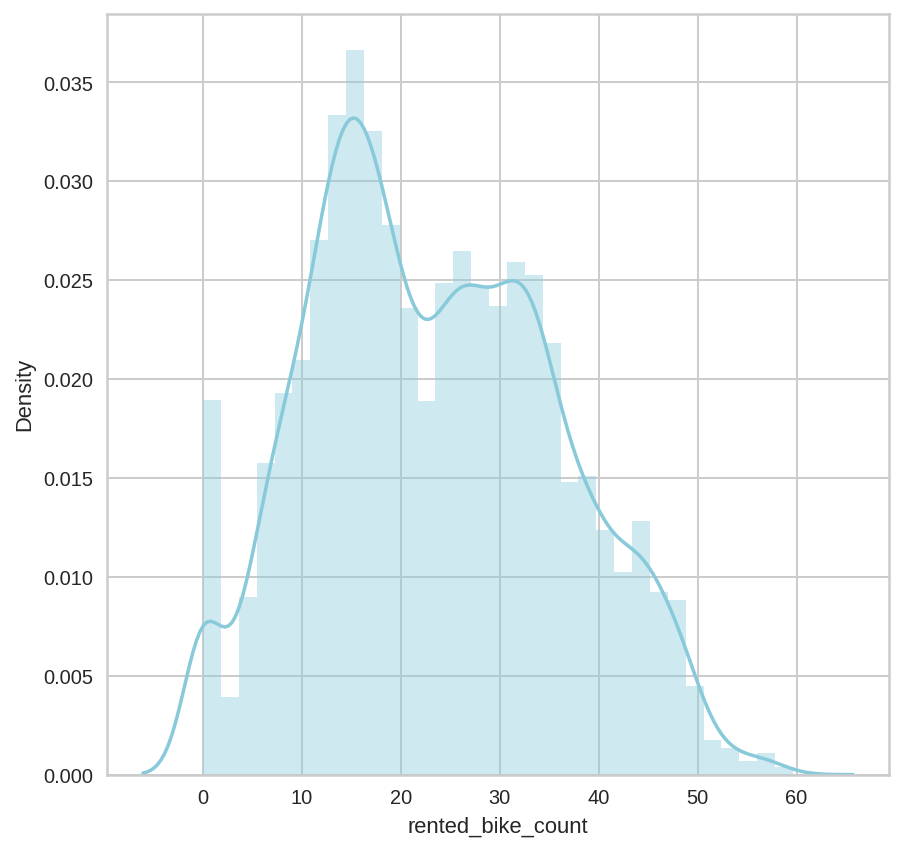

In [ ]:
# for the normalise rented bike count data use sqrt
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['rented_bike_count']),color="c")

The square root transformation on the dependent variable gives us distributio which is almost normal in nature.

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month', 'year', 'day'],
      dtype='object')

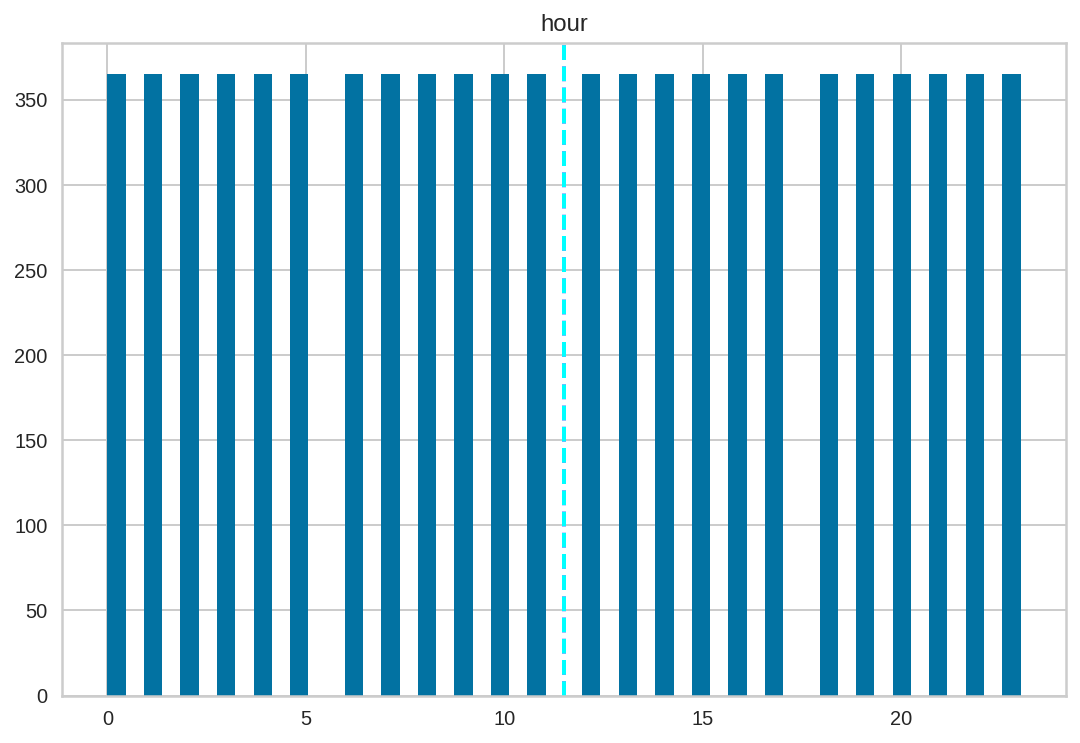

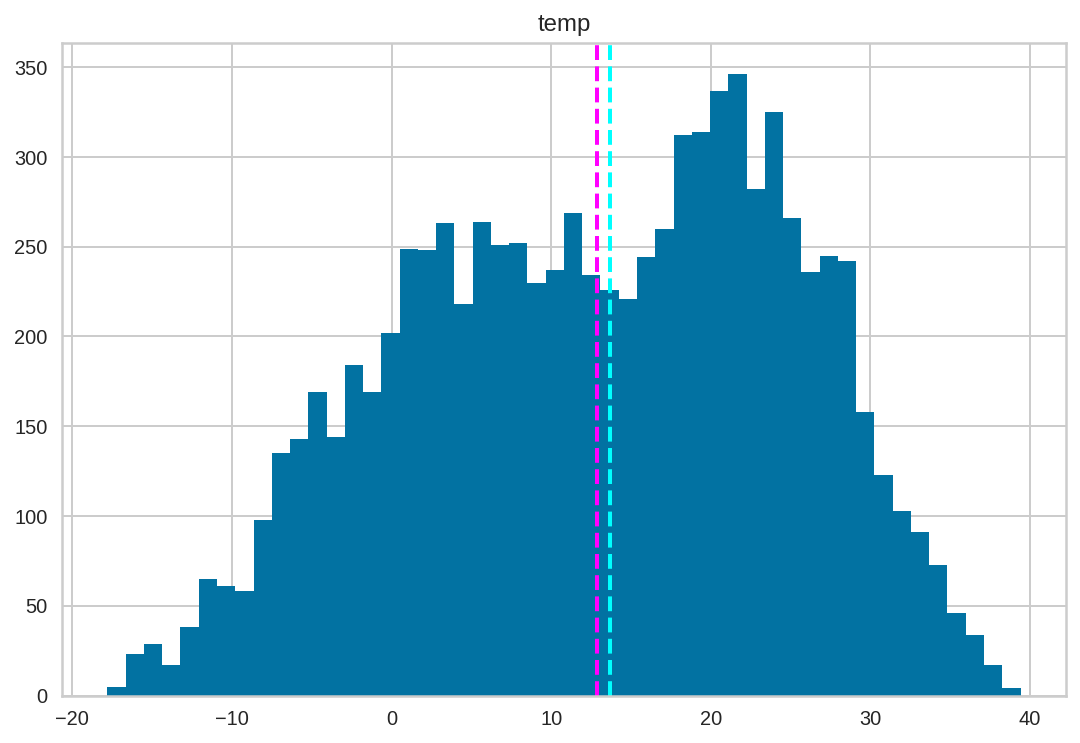

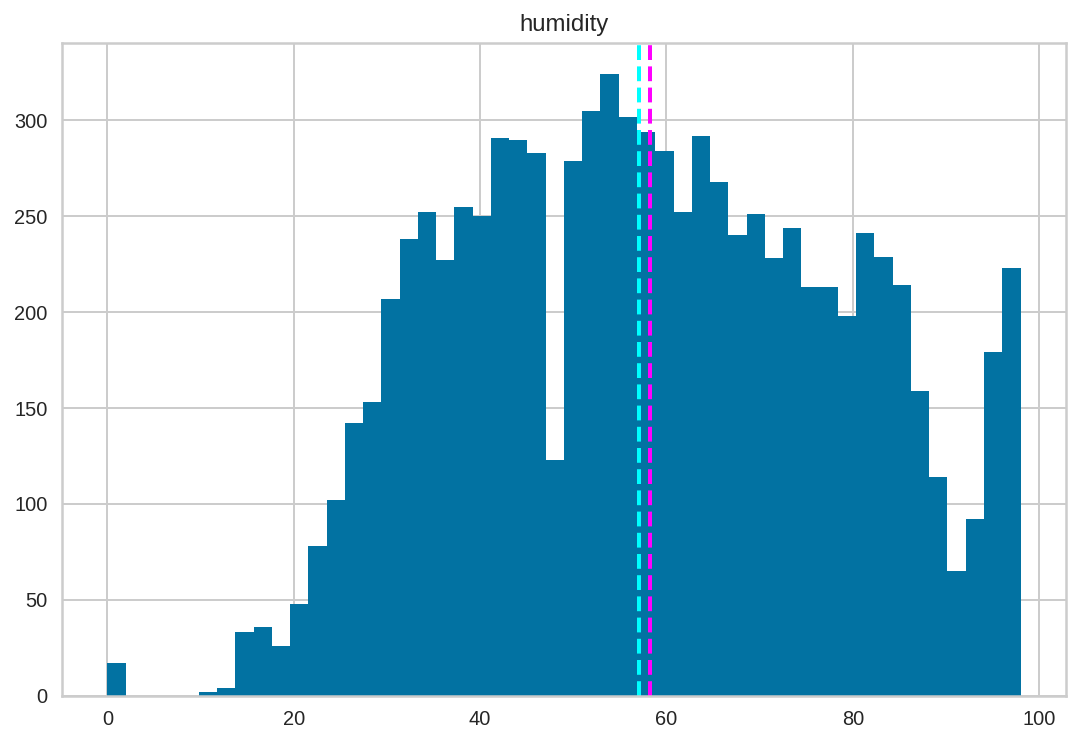

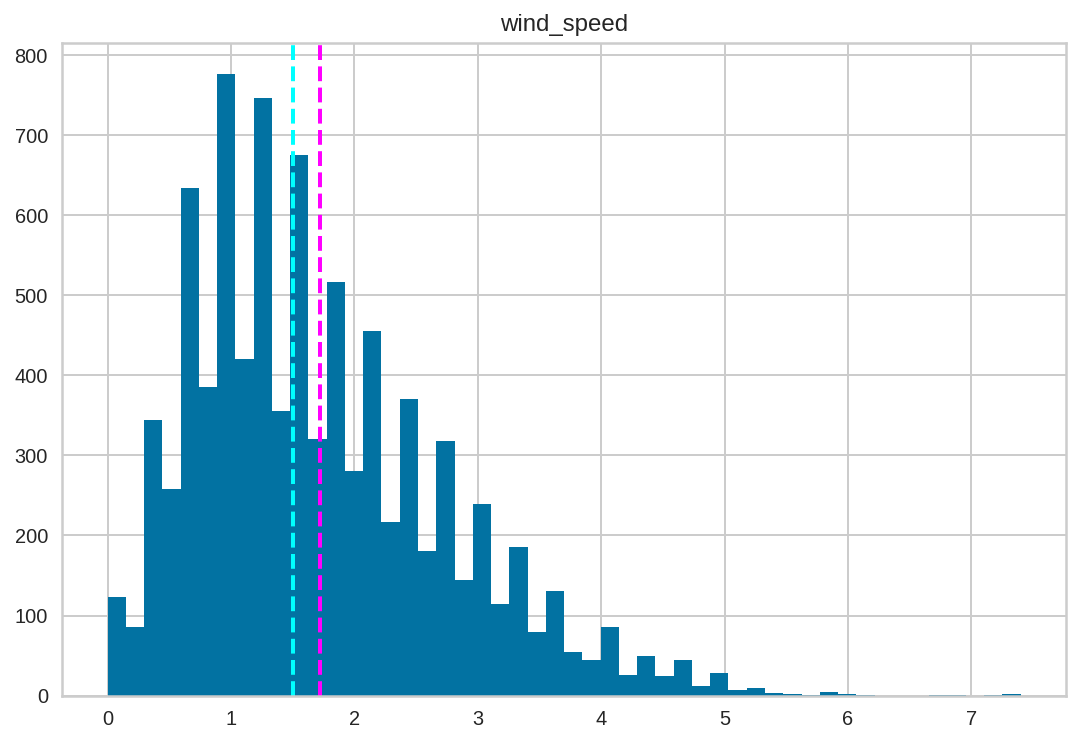

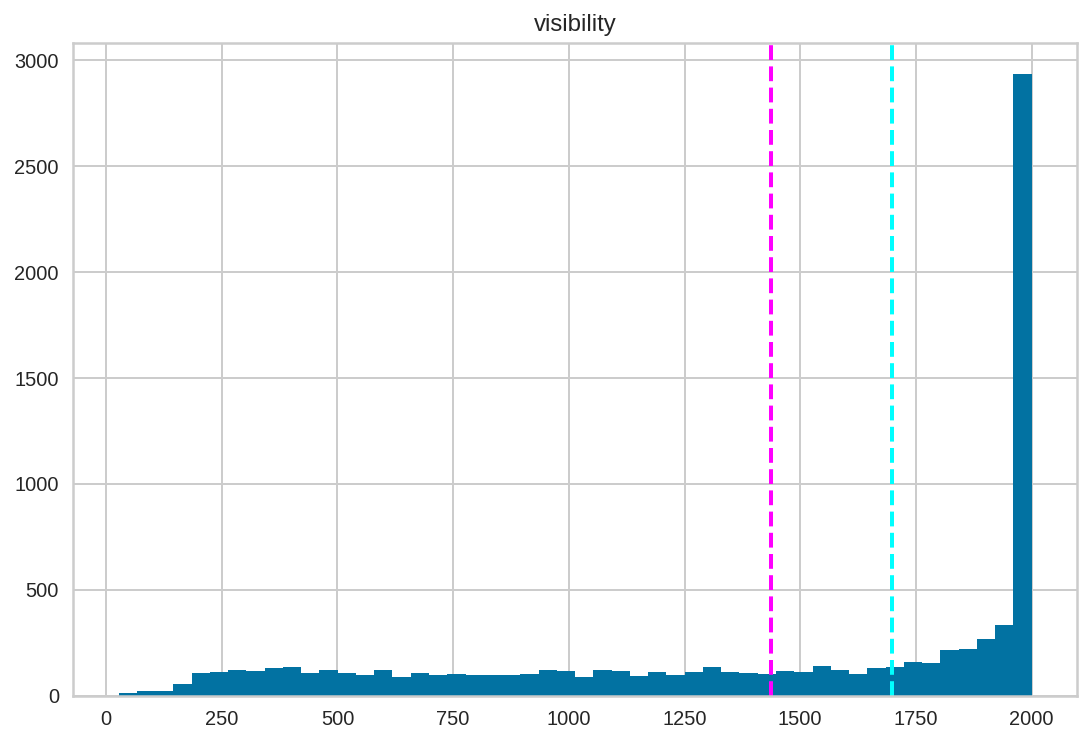

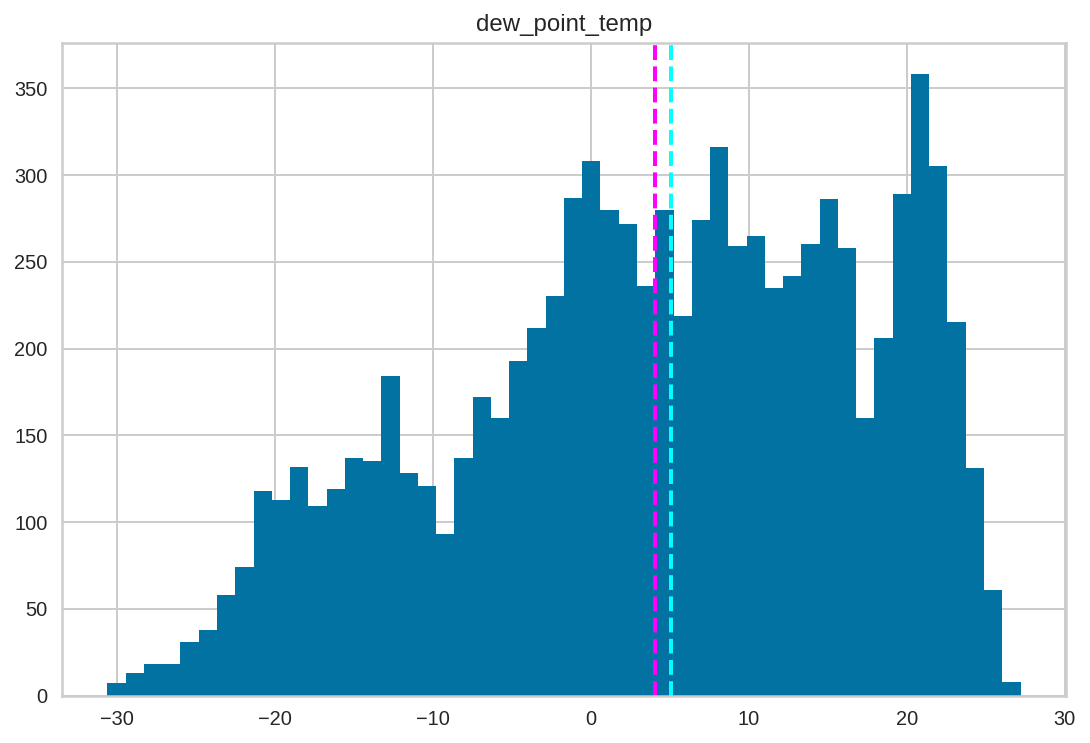

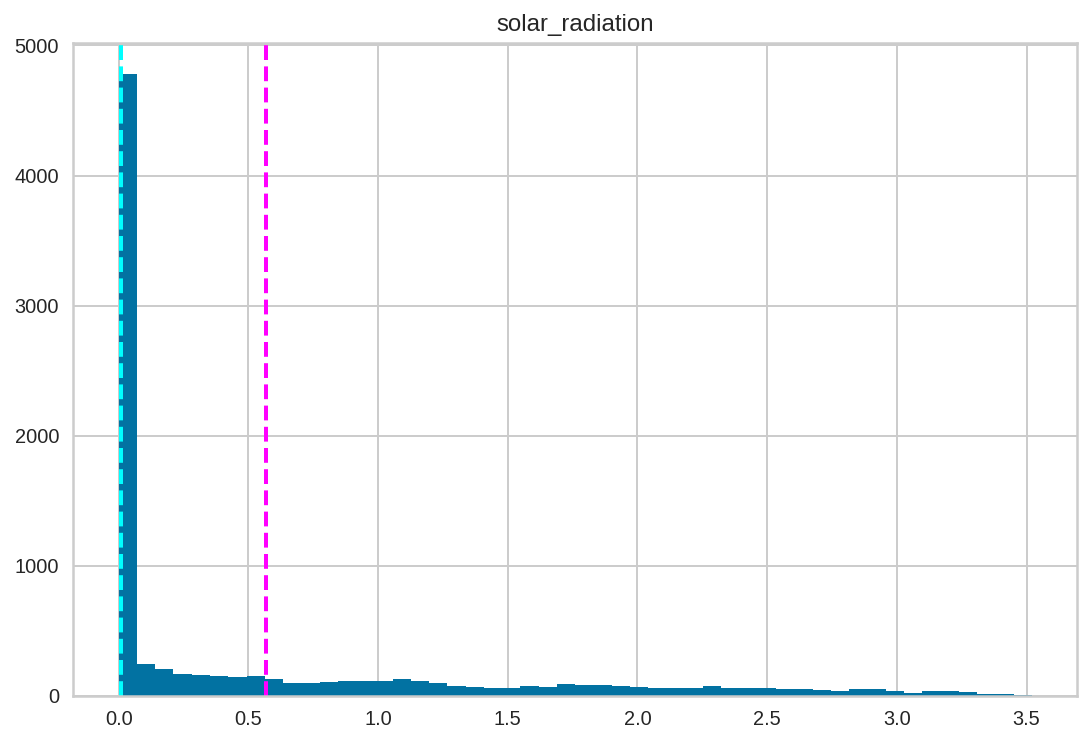

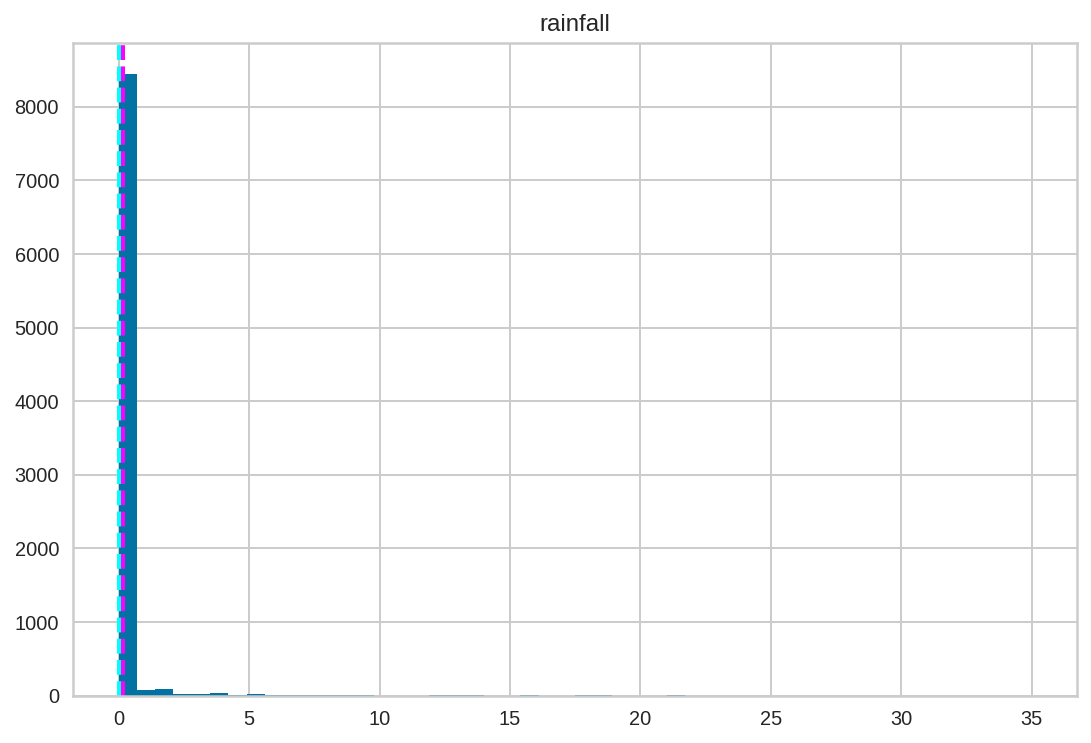

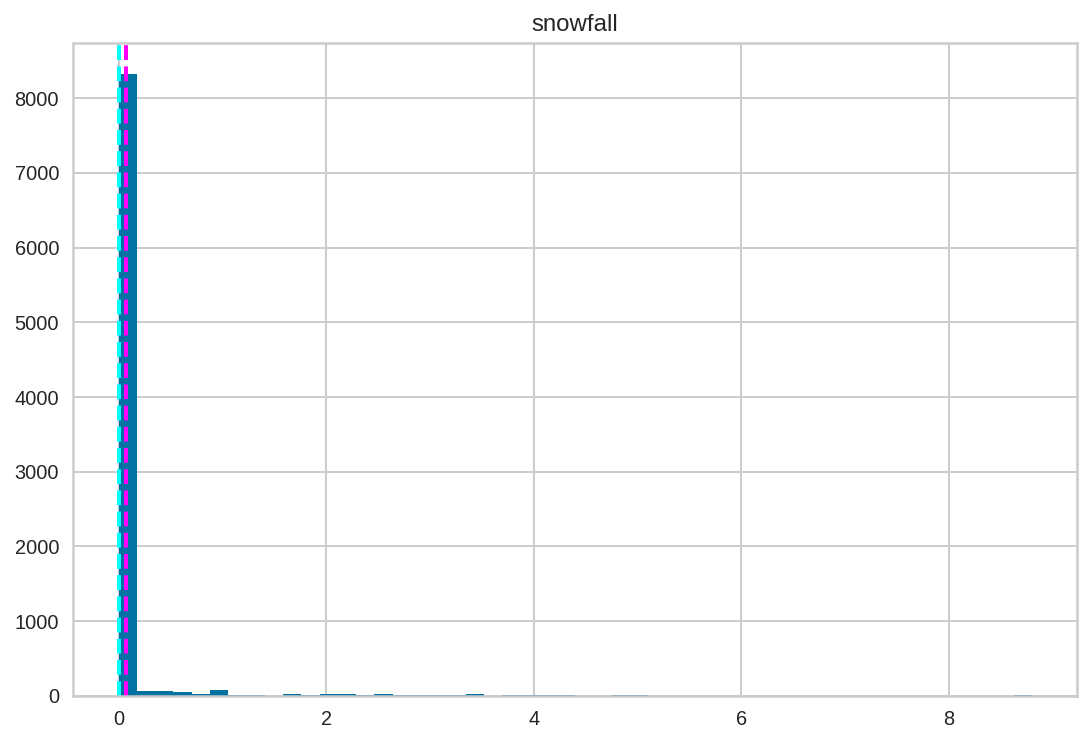

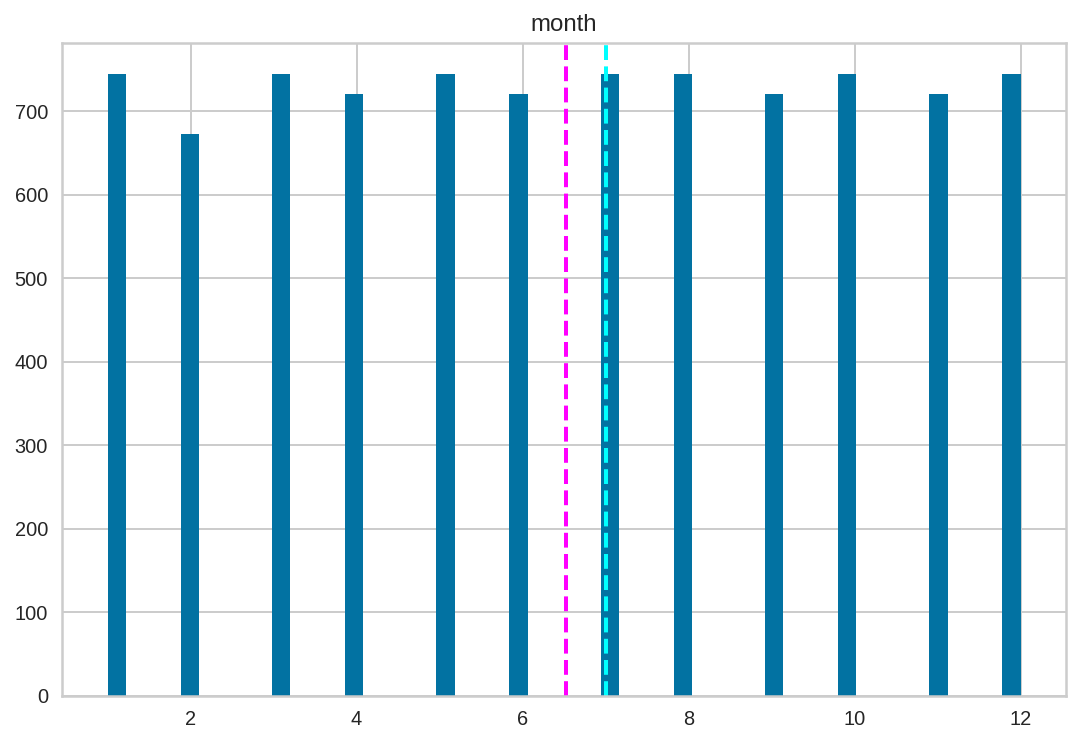

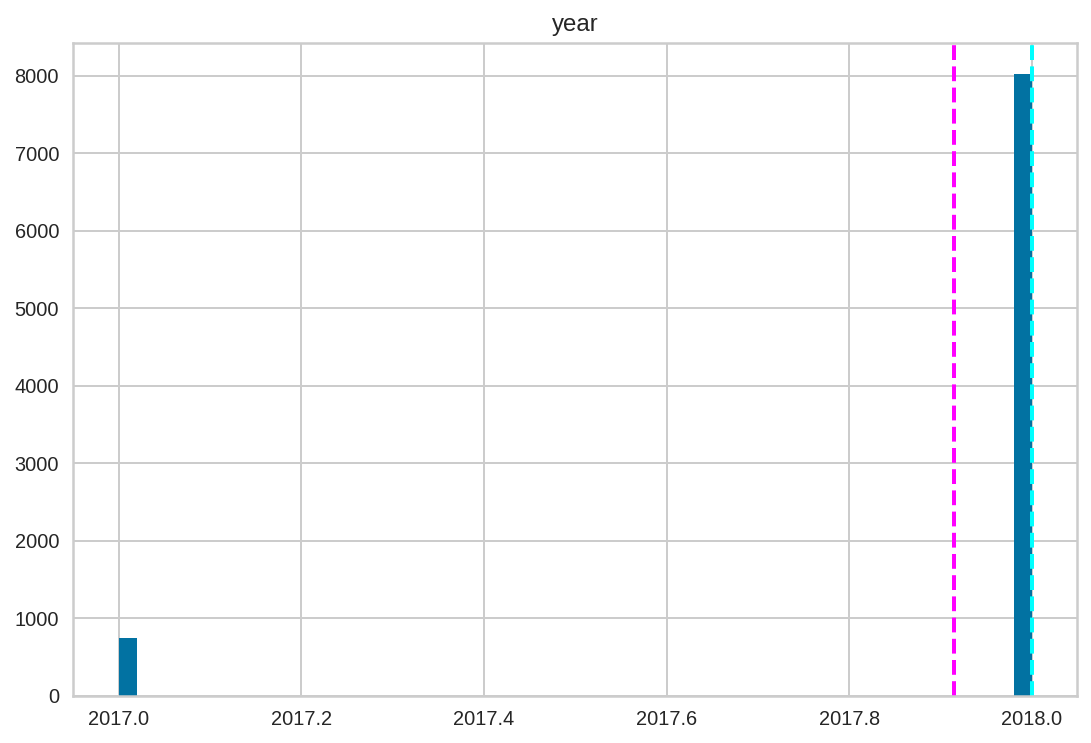

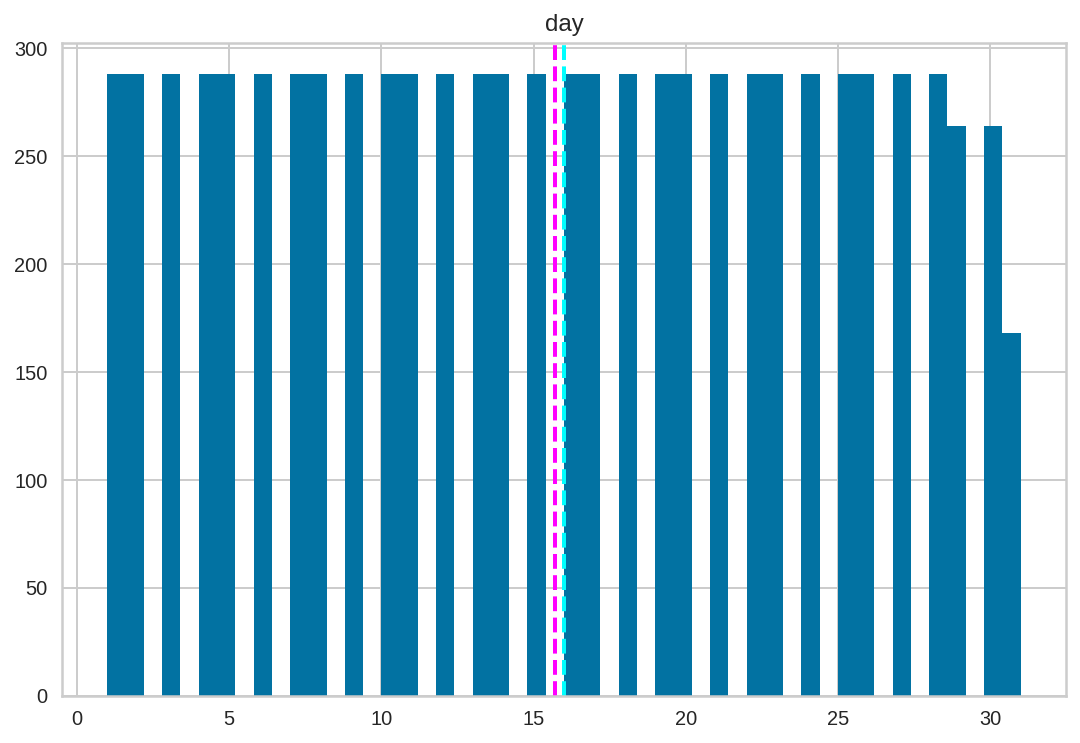

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

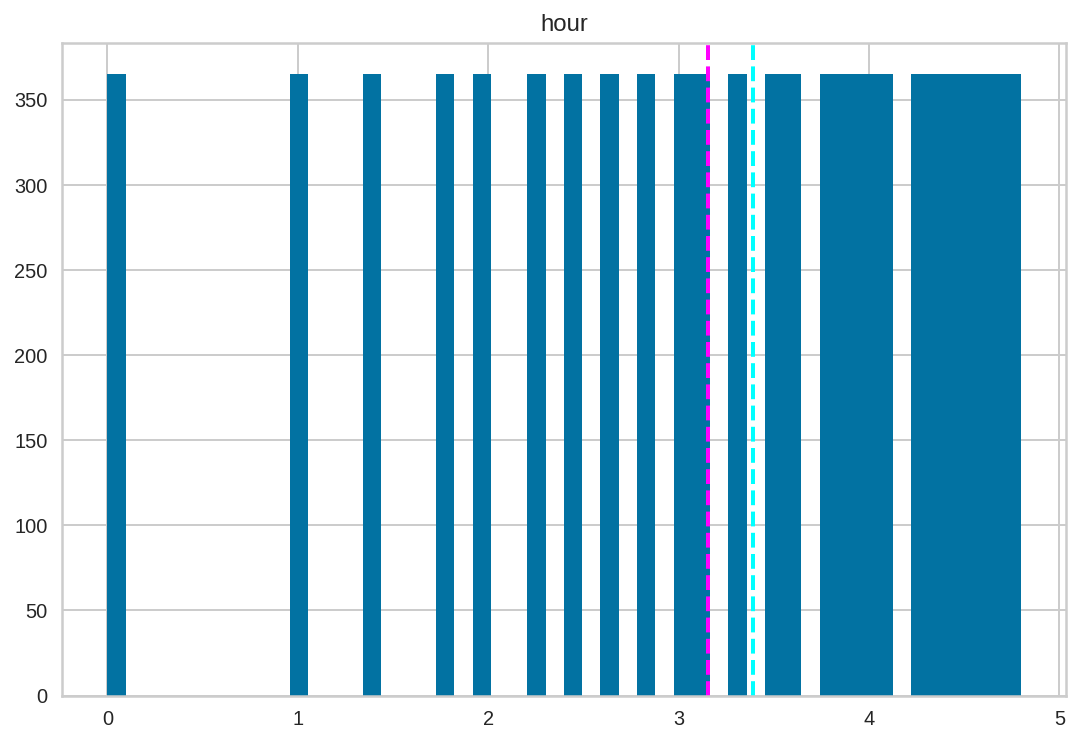

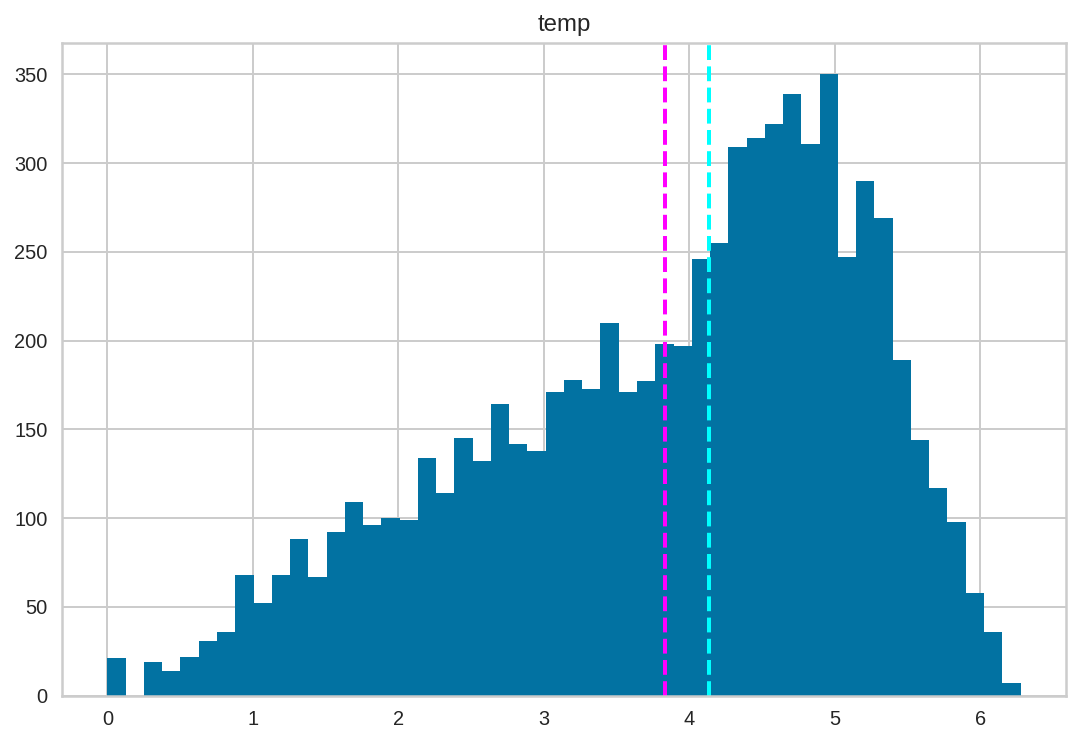

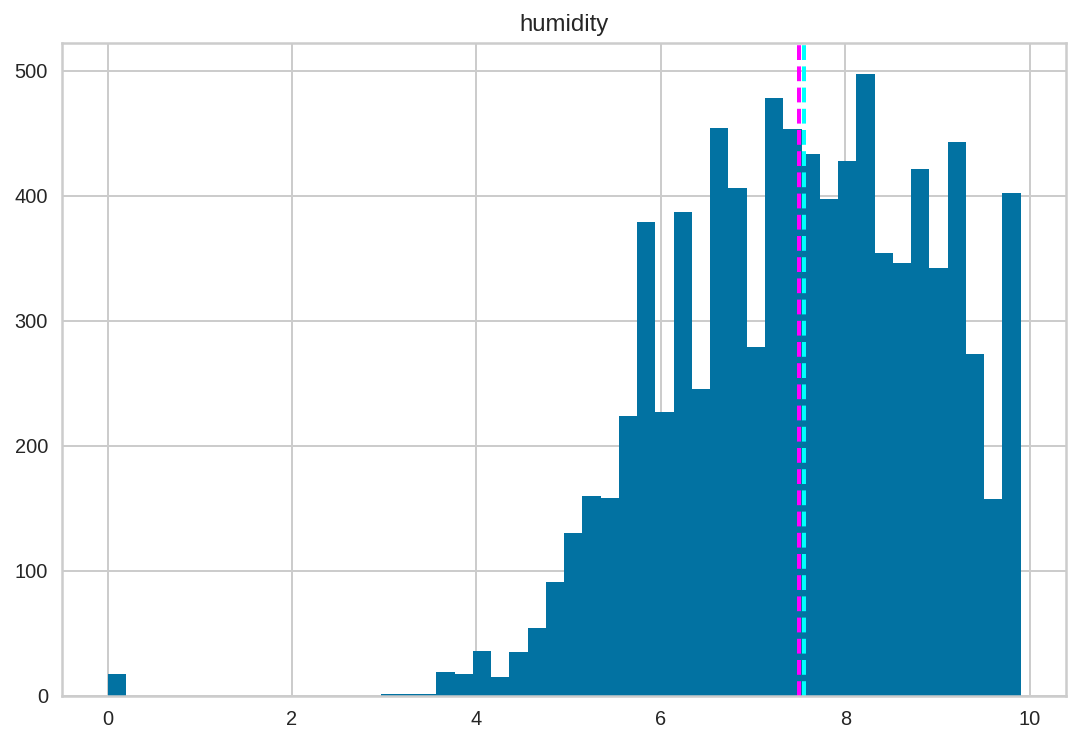

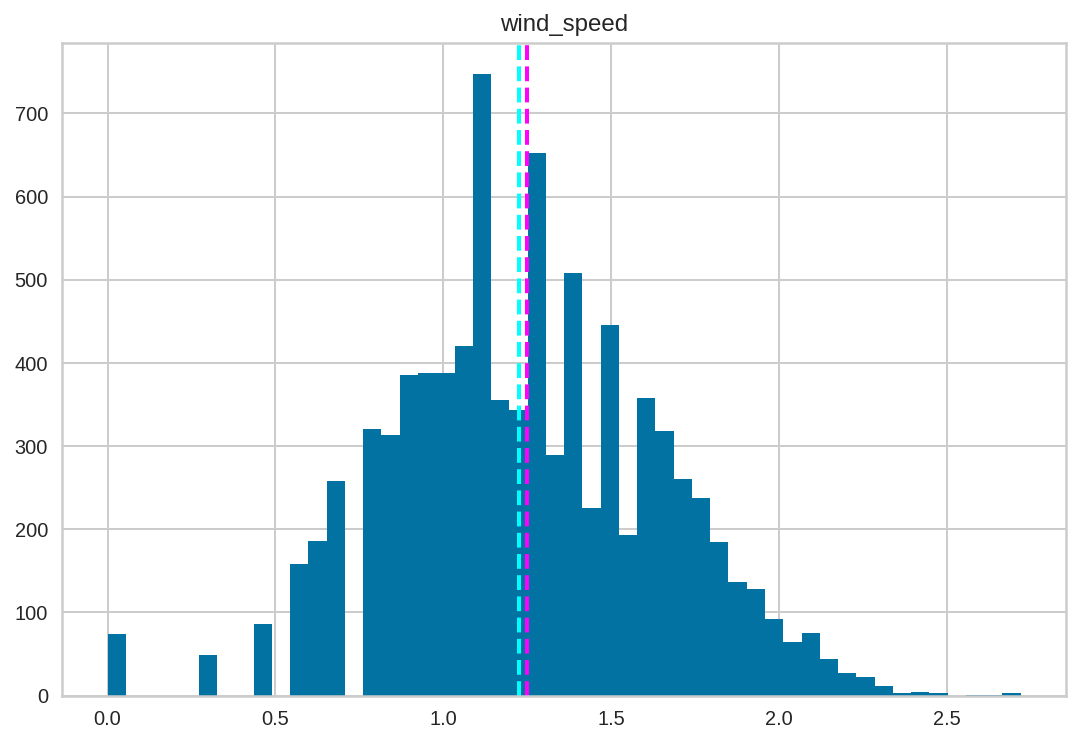

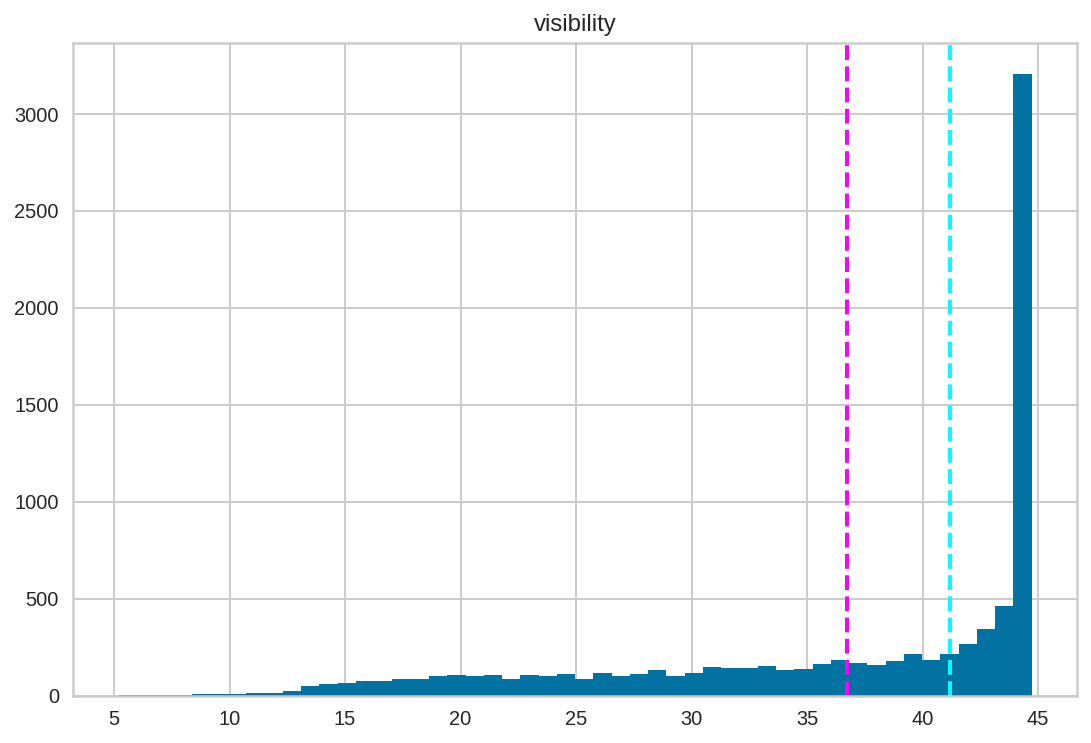

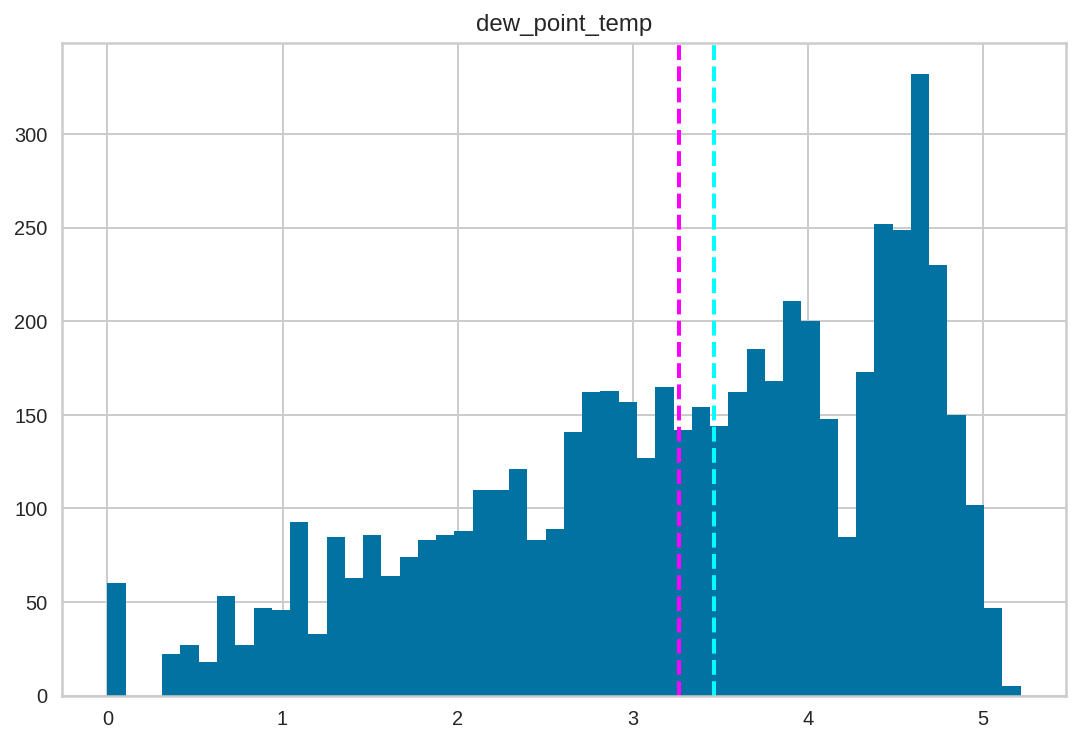

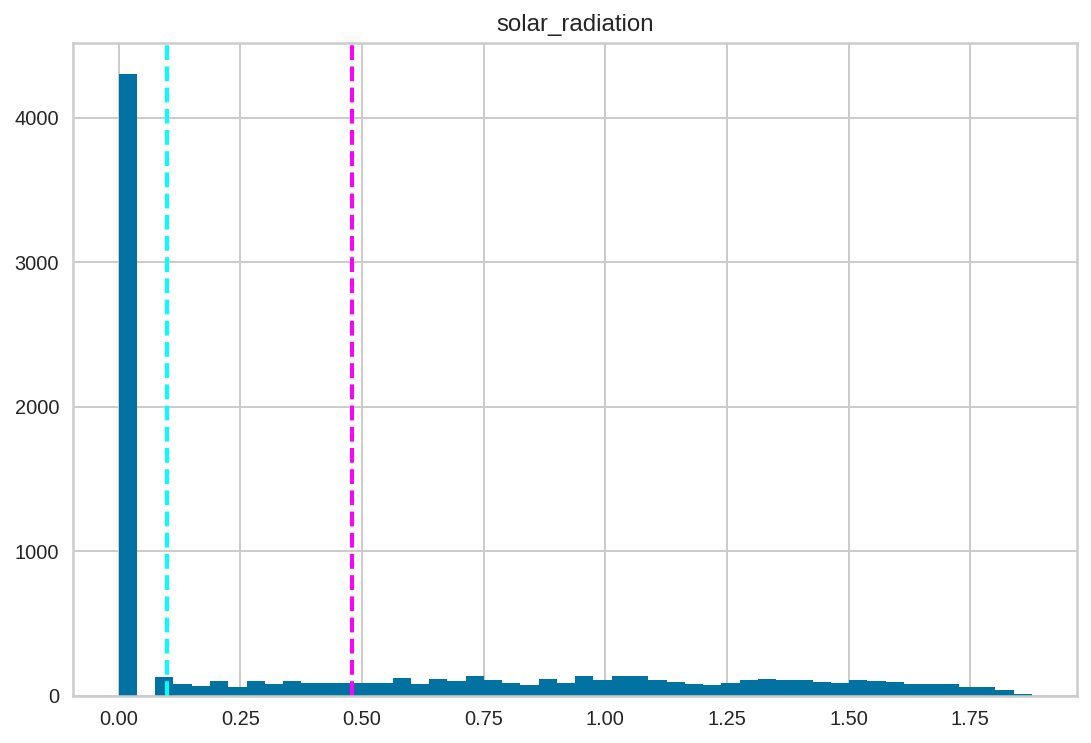

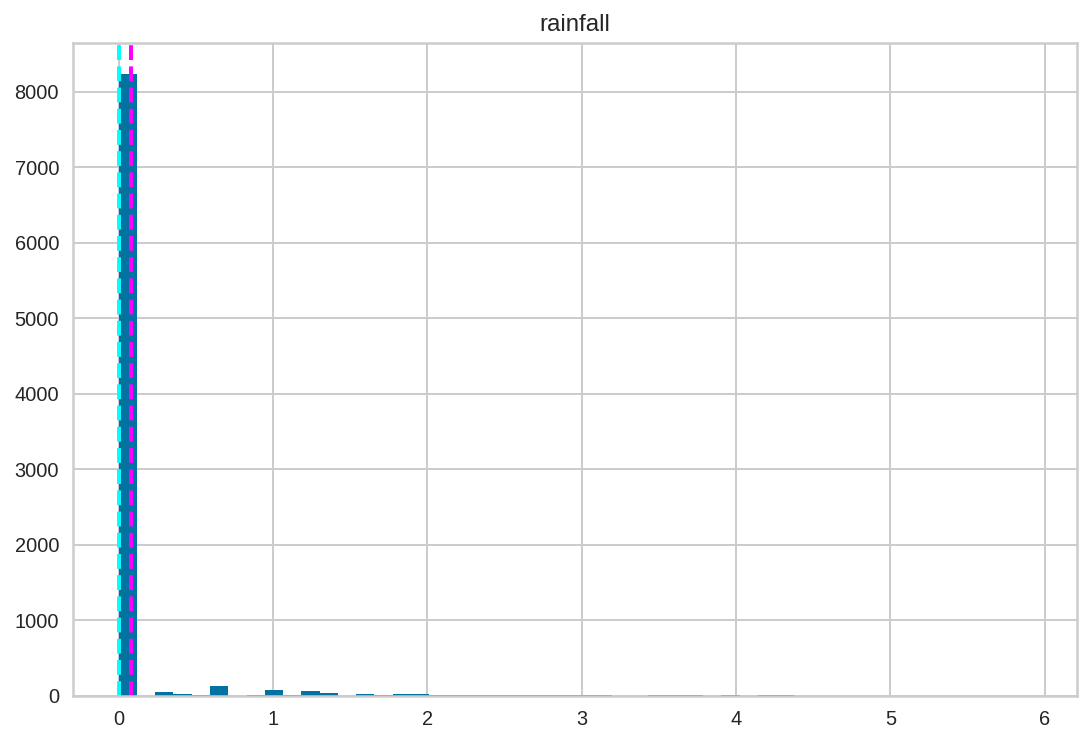

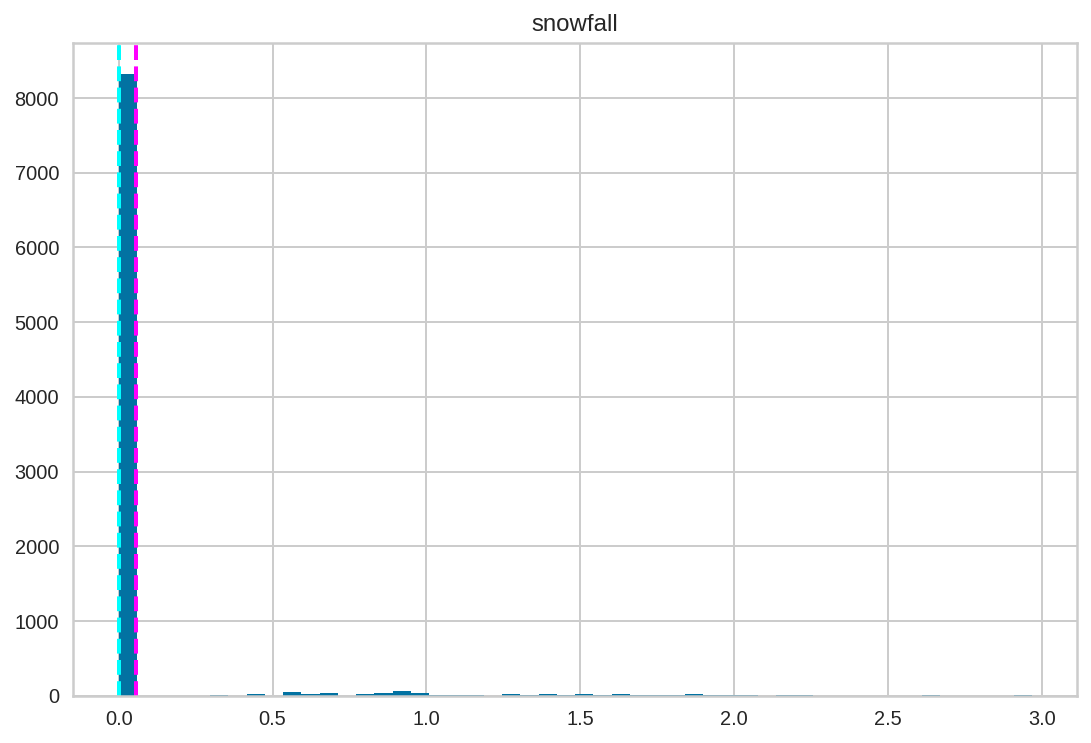

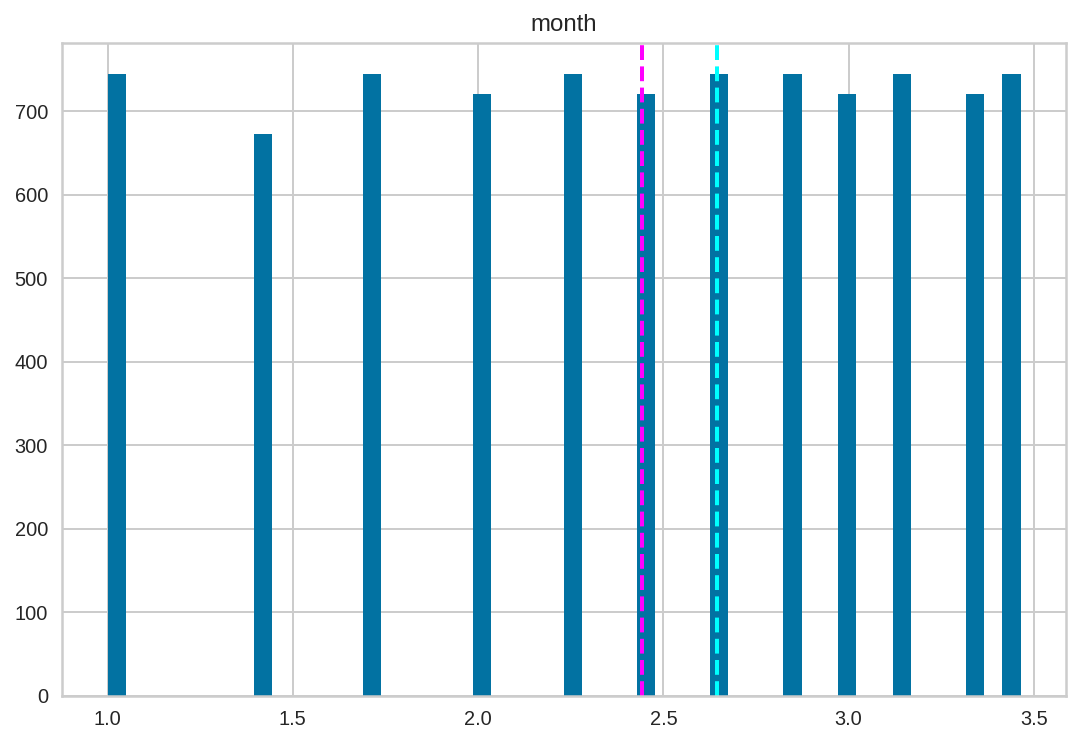

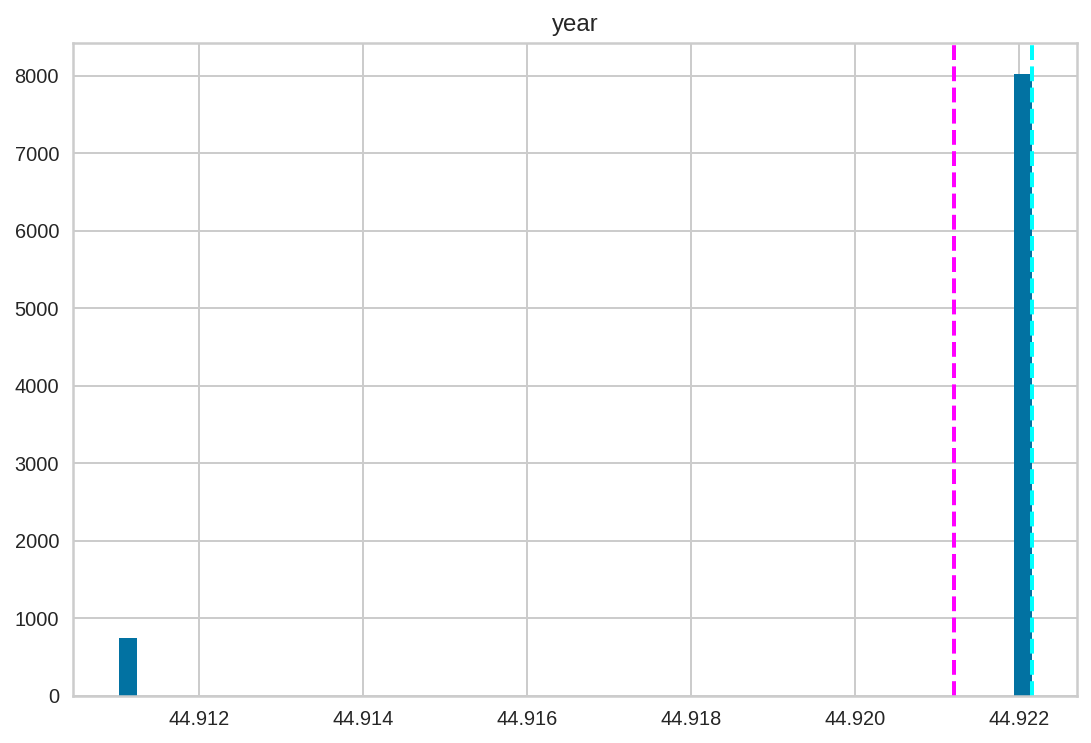

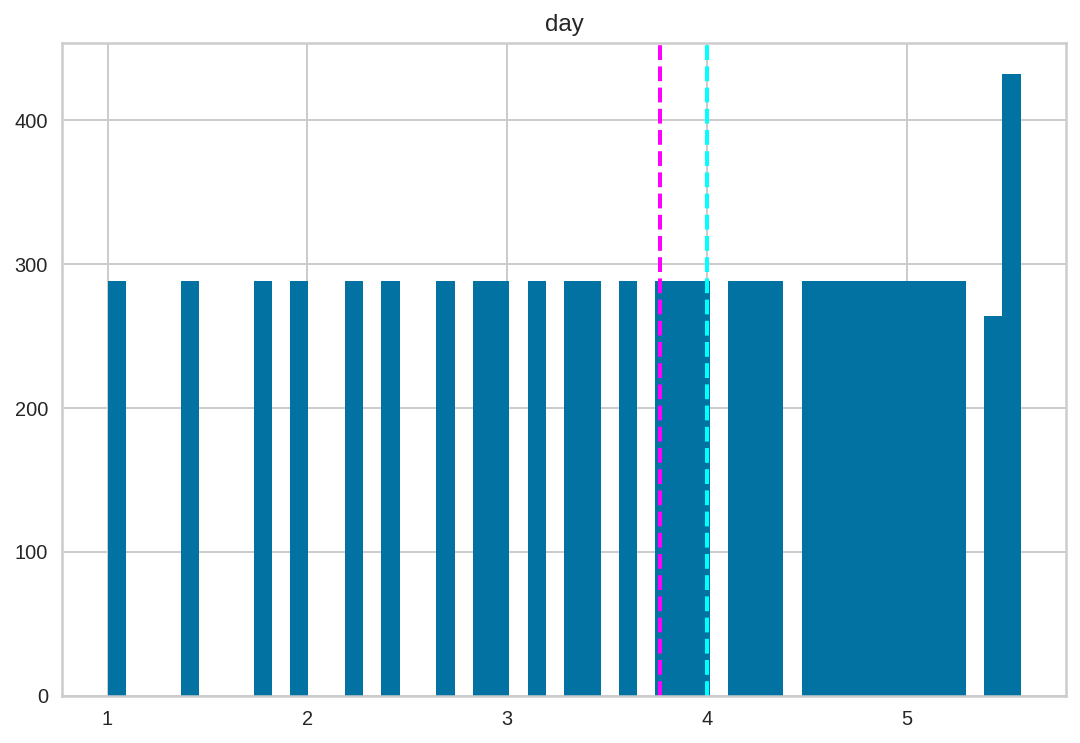

In [ ]:
# All numerical data Normalize by using sqrt transformation
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

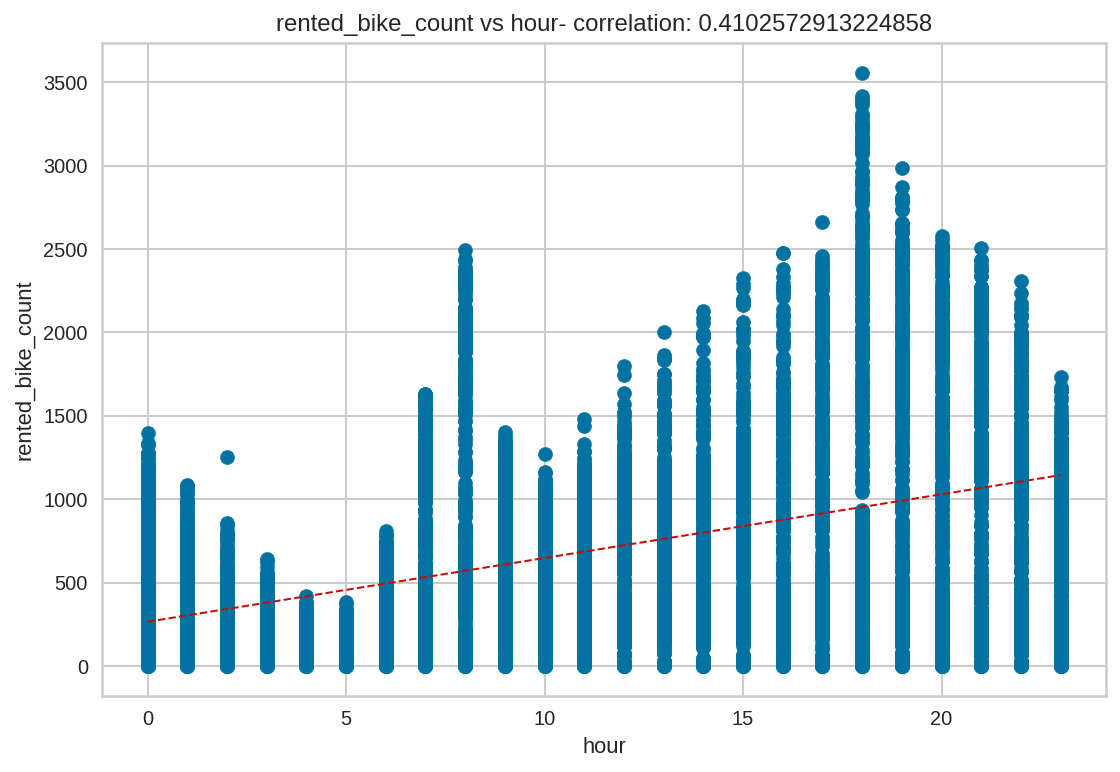

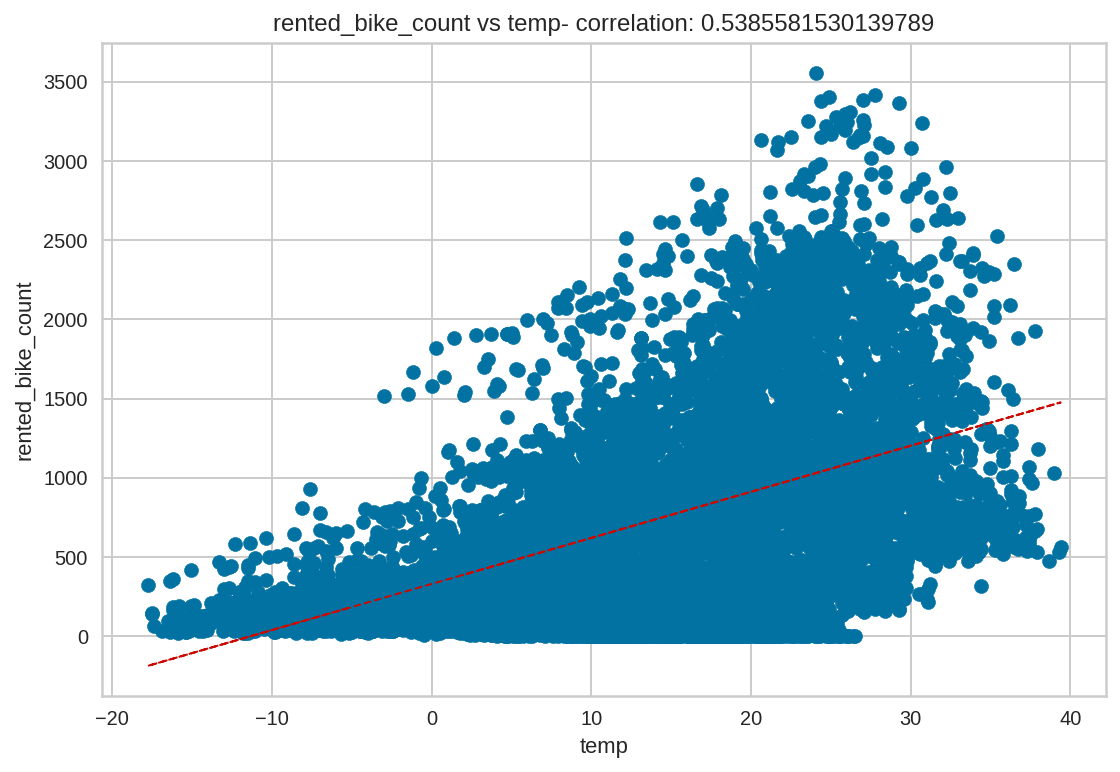

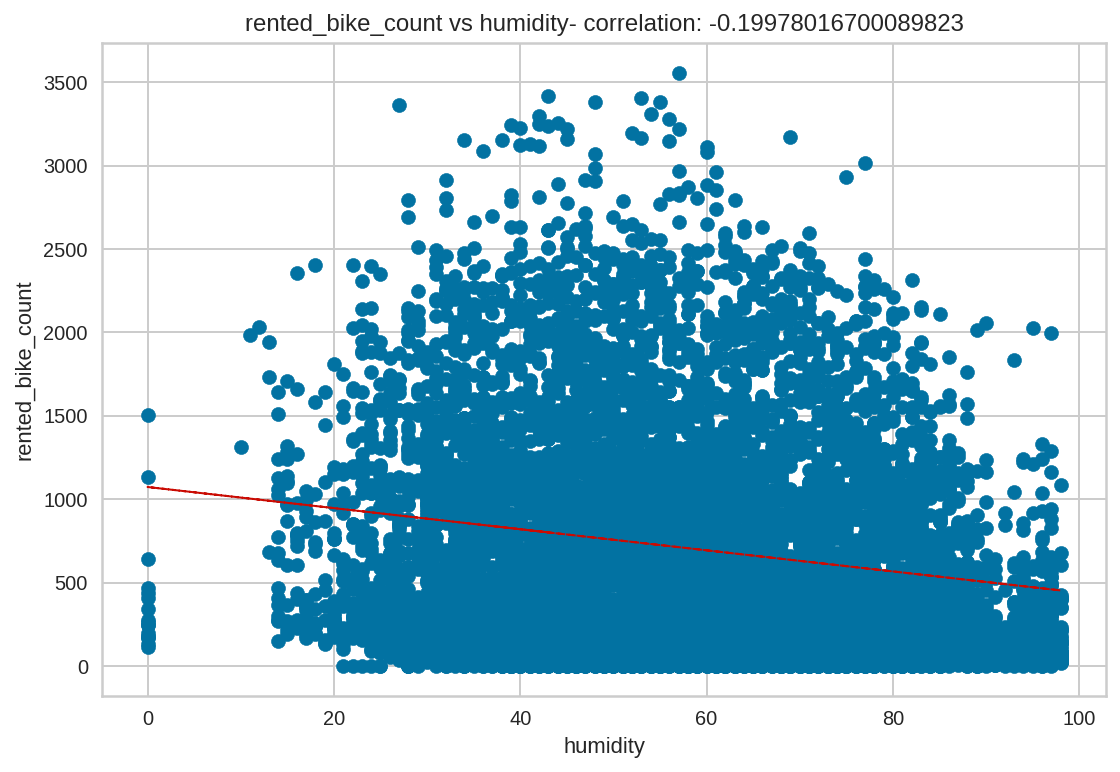

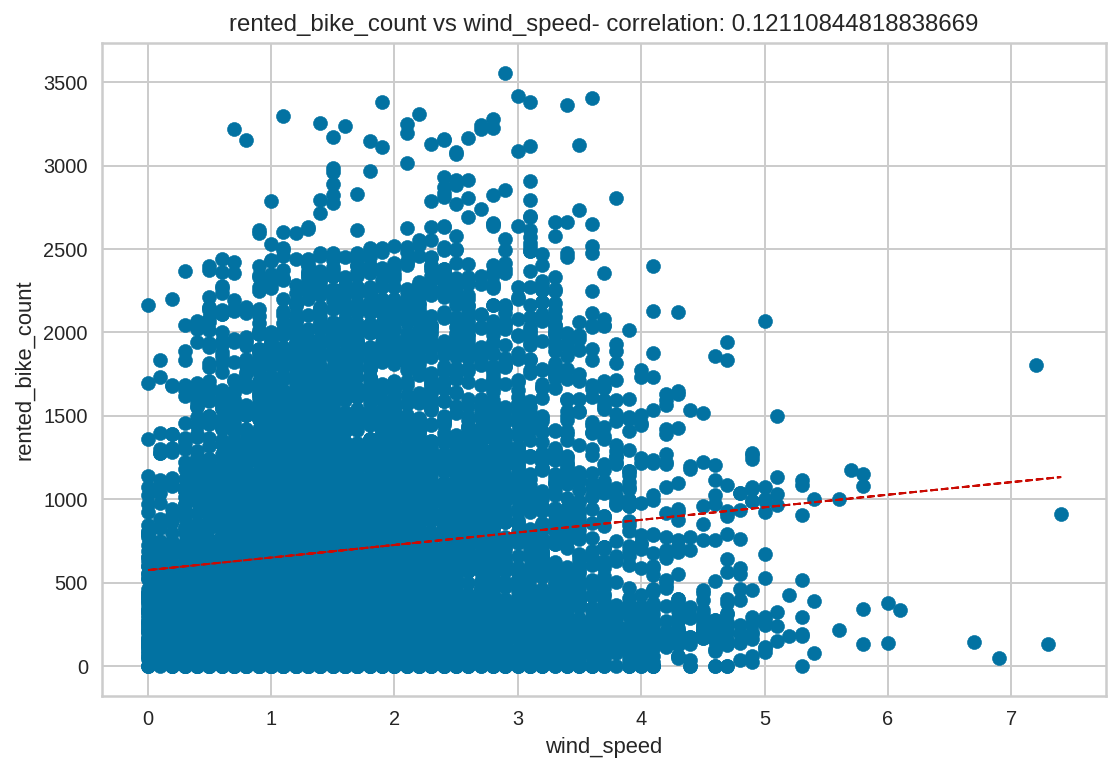

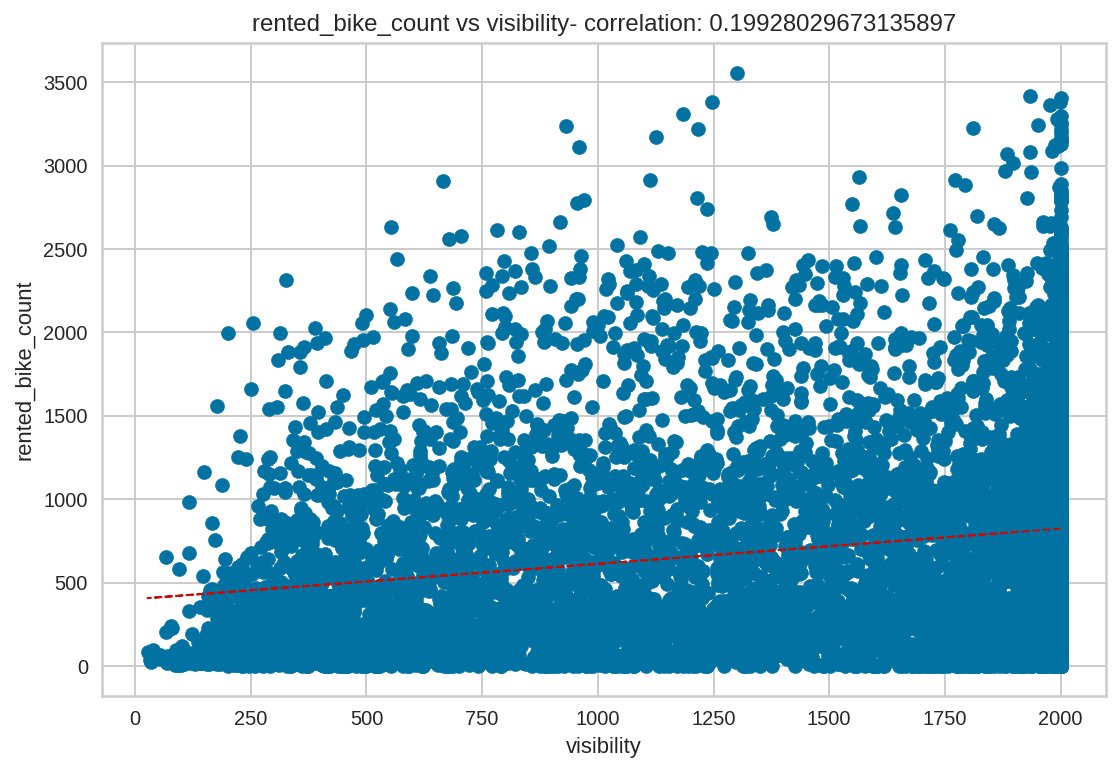

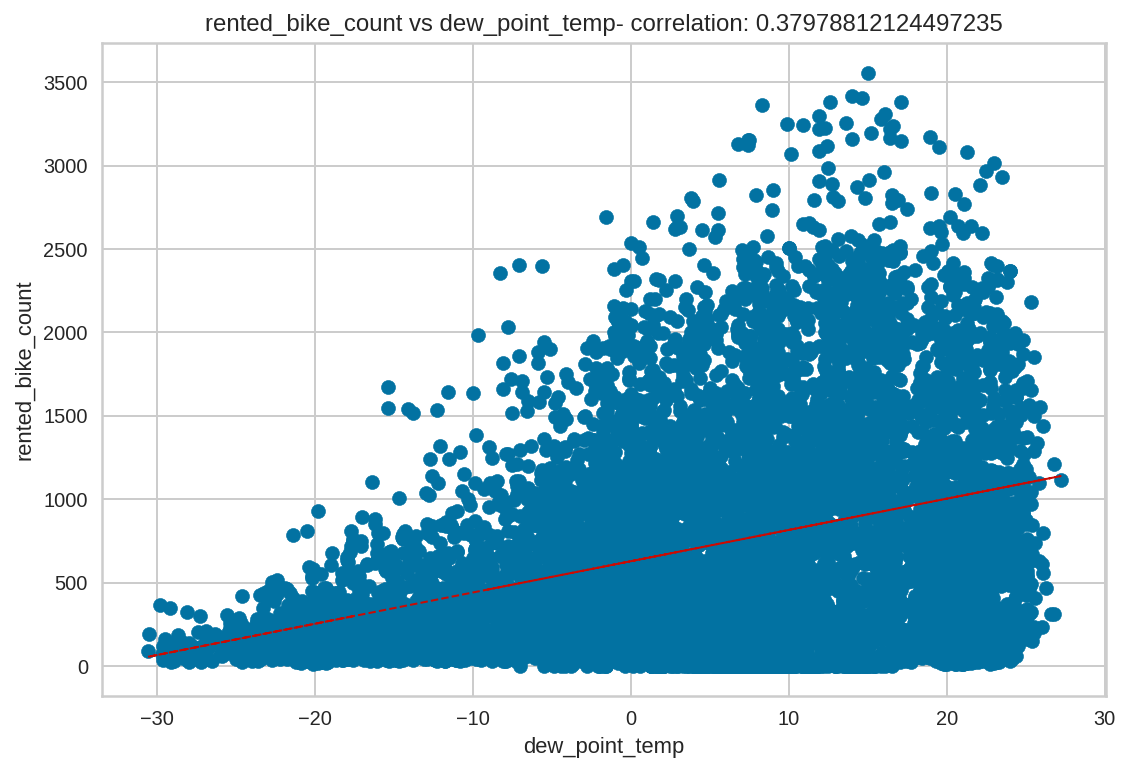

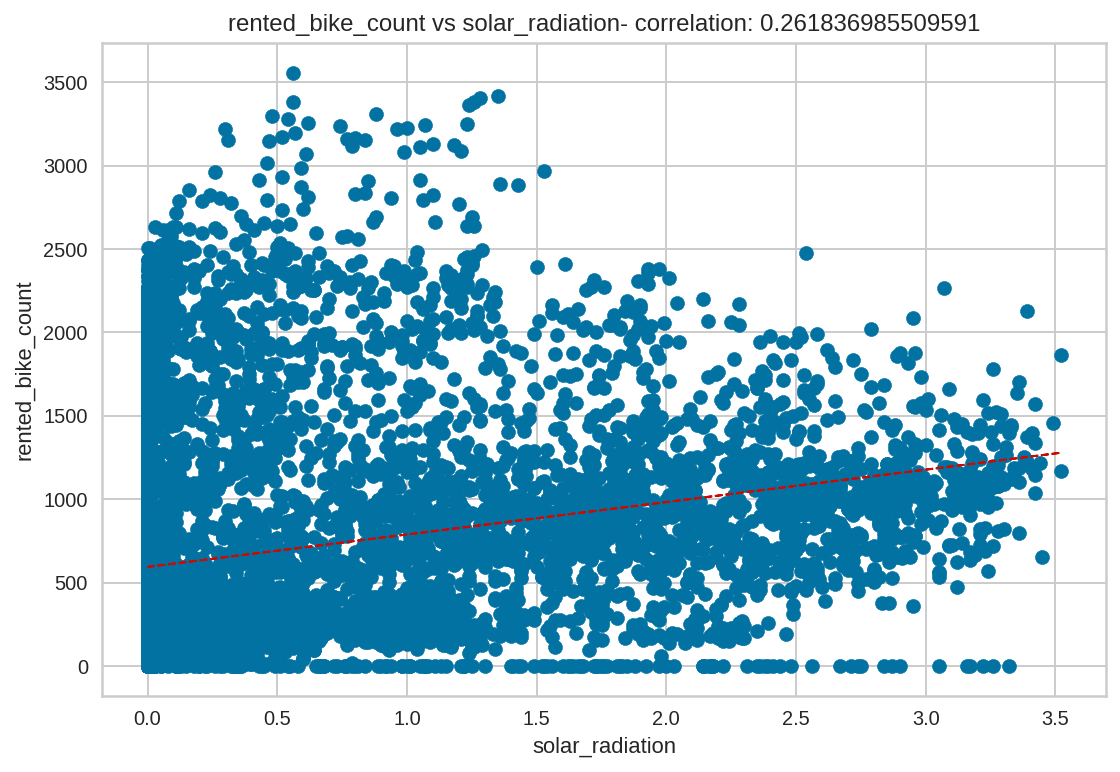

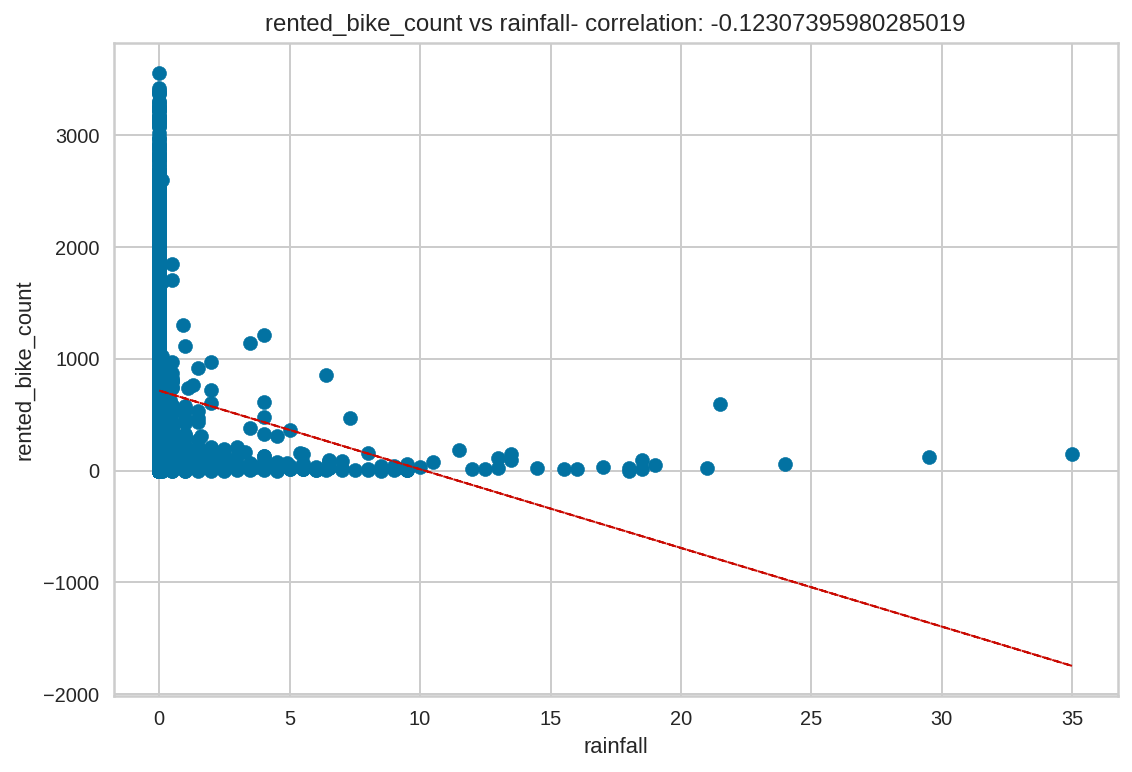

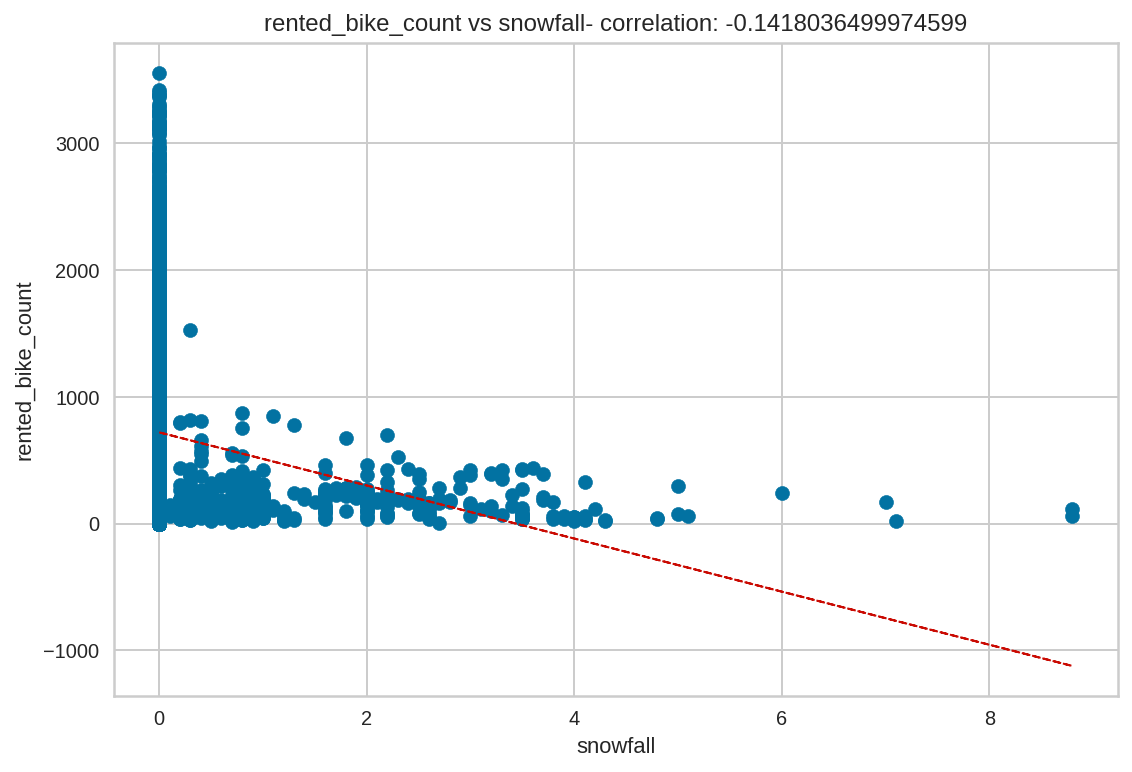

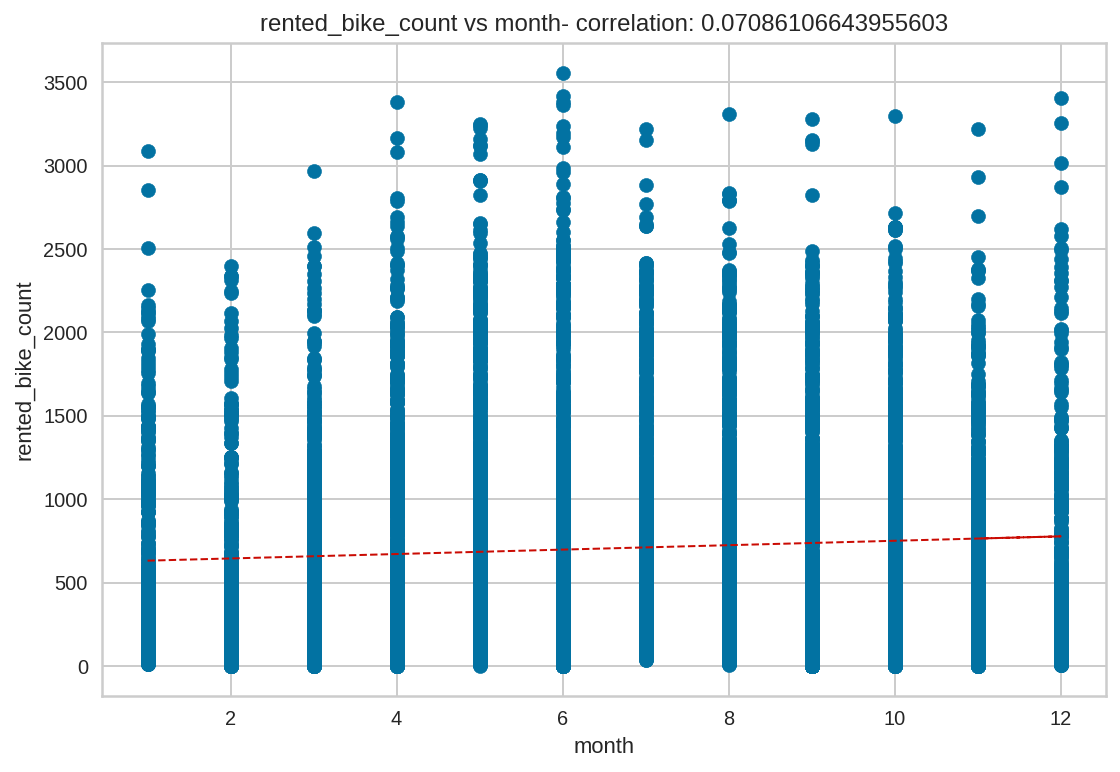

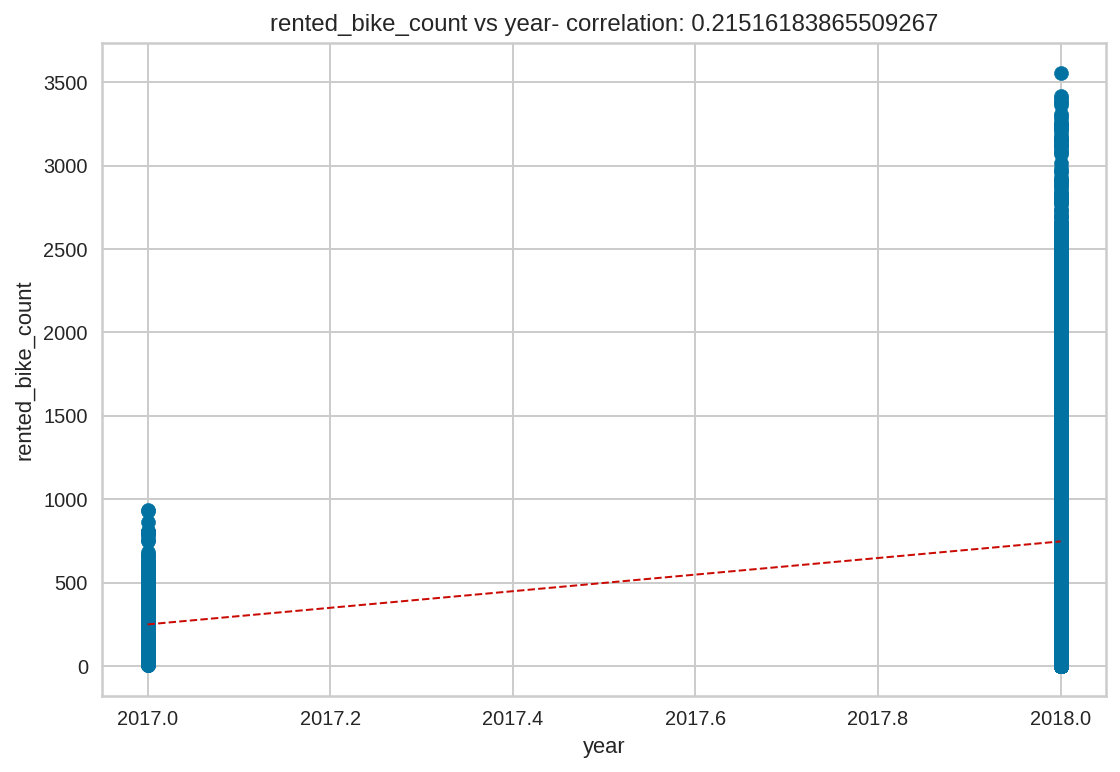

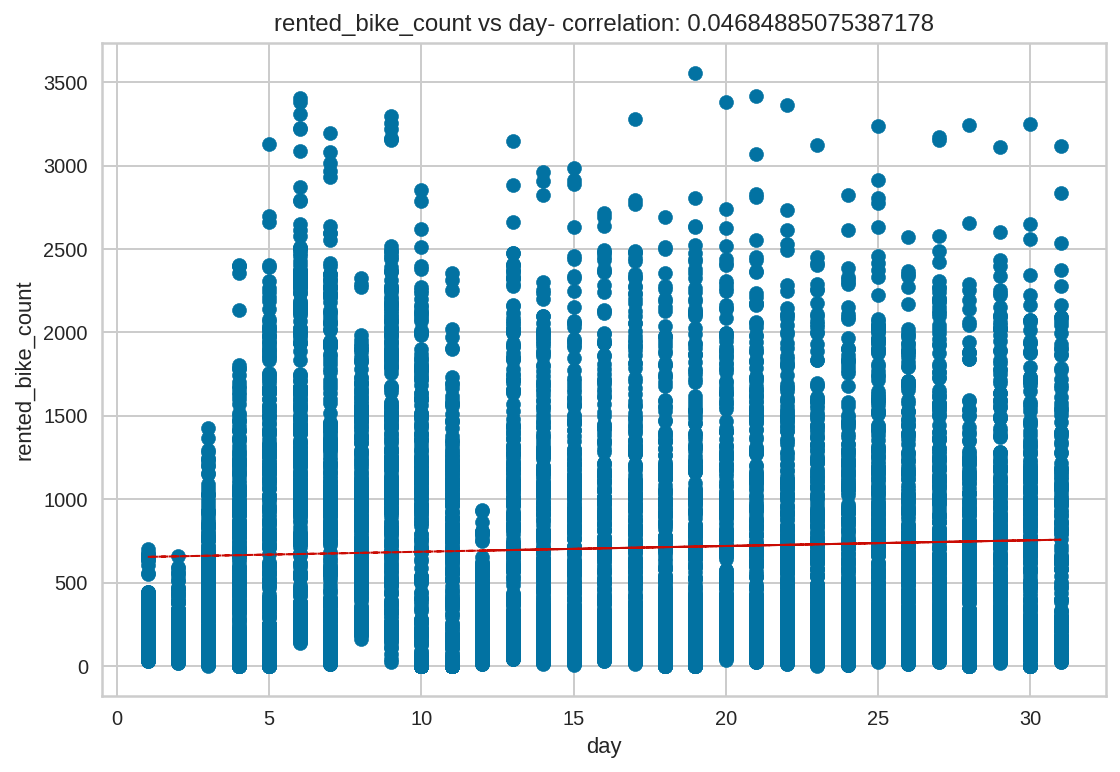

In [ ]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bike_count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# **<a> 1.6 Feature engineering and selection</a>**

In [ ]:
def handle_outliers(df, col, min_, max_):

    # Quantile will return a tuple
    min_threshold, max_threshold = df[col].quantile([min_ ,max_])
    col_mean = df[col].mean()
    new_col = []
    
    for v in df[col]:
        if(v <= max_threshold) and (v >= min_threshold):
            new_col.append(v)
        else:
            new_col.append(col_mean)
            
    df[col] = new_col
    return df

In [ ]:
def min_max_scaling(df, lst_cols):
    transformer = MinMaxScaler().fit(df[lst_cols])
    df[lst_cols] = transformer.transform(df[lst_cols])
    return df

In [ ]:
def standard_scaling(df, lst_cols):
    transformer = StandardScaler().fit(df[lst_cols])
    df[lst_cols] = transformer.transform(df[lst_cols])
    return df

In [ ]:
def one_hot_encoding(df, lst_cols):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[lst_cols])
    encoded_cols = list(encoder.get_feature_names(lst_cols))
    df[encoded_cols] = encoder.transform(df[lst_cols])
    return df

In [ ]:
df.head()

date  rented_bike_count  hour  temp  ...  func_day  month  year  day
0 2017-01-12                254     0  -5.2  ...       Yes      1  2017   12
1 2017-01-12                204     1  -5.5  ...       Yes      1  2017   12
2 2017-01-12                173     2  -6.0  ...       Yes      1  2017   12
3 2017-01-12                107     3  -6.2  ...       Yes      1  2017   12
4 2017-01-12                 78     4  -6.0  ...       Yes      1  2017   12

[5 rows x 17 columns]

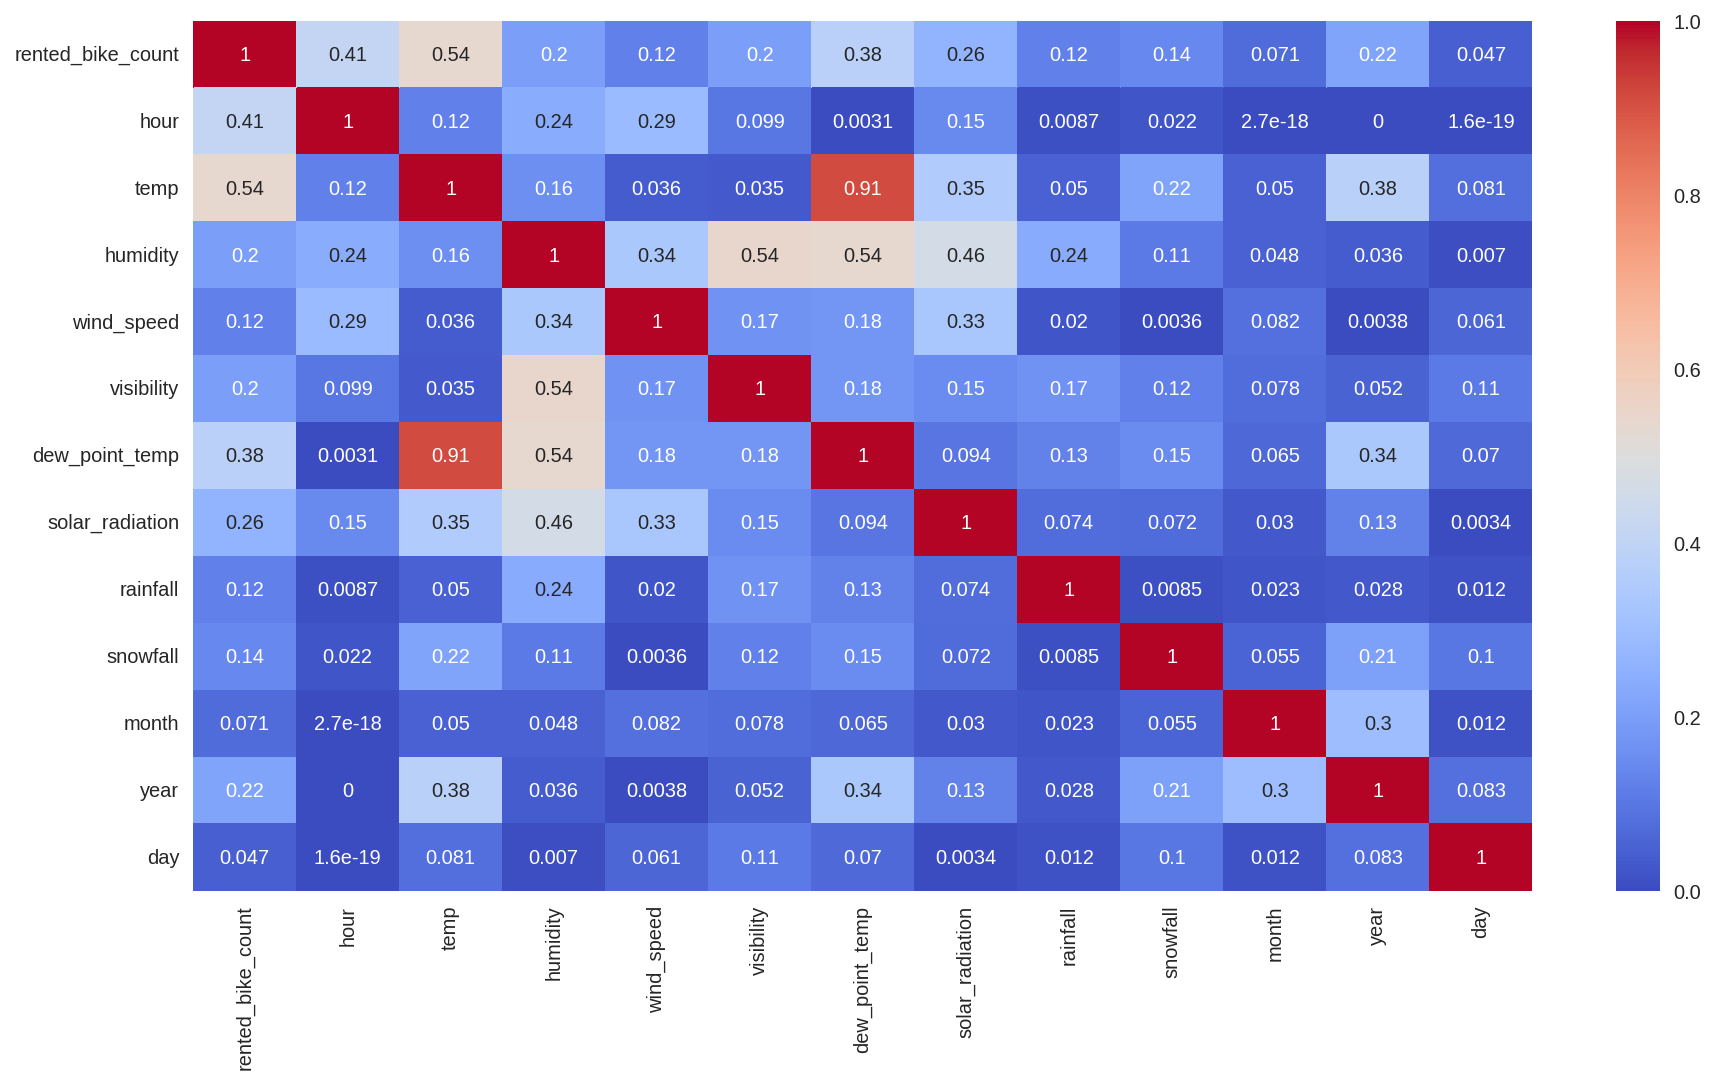

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The dew_point_temp, season_Summer, and season_Winter attributes show high correlation. Hence it can be dropped.

In [ ]:
# Removing Multicollinearity
df = df.drop(['dew_point_temp'], axis=1)

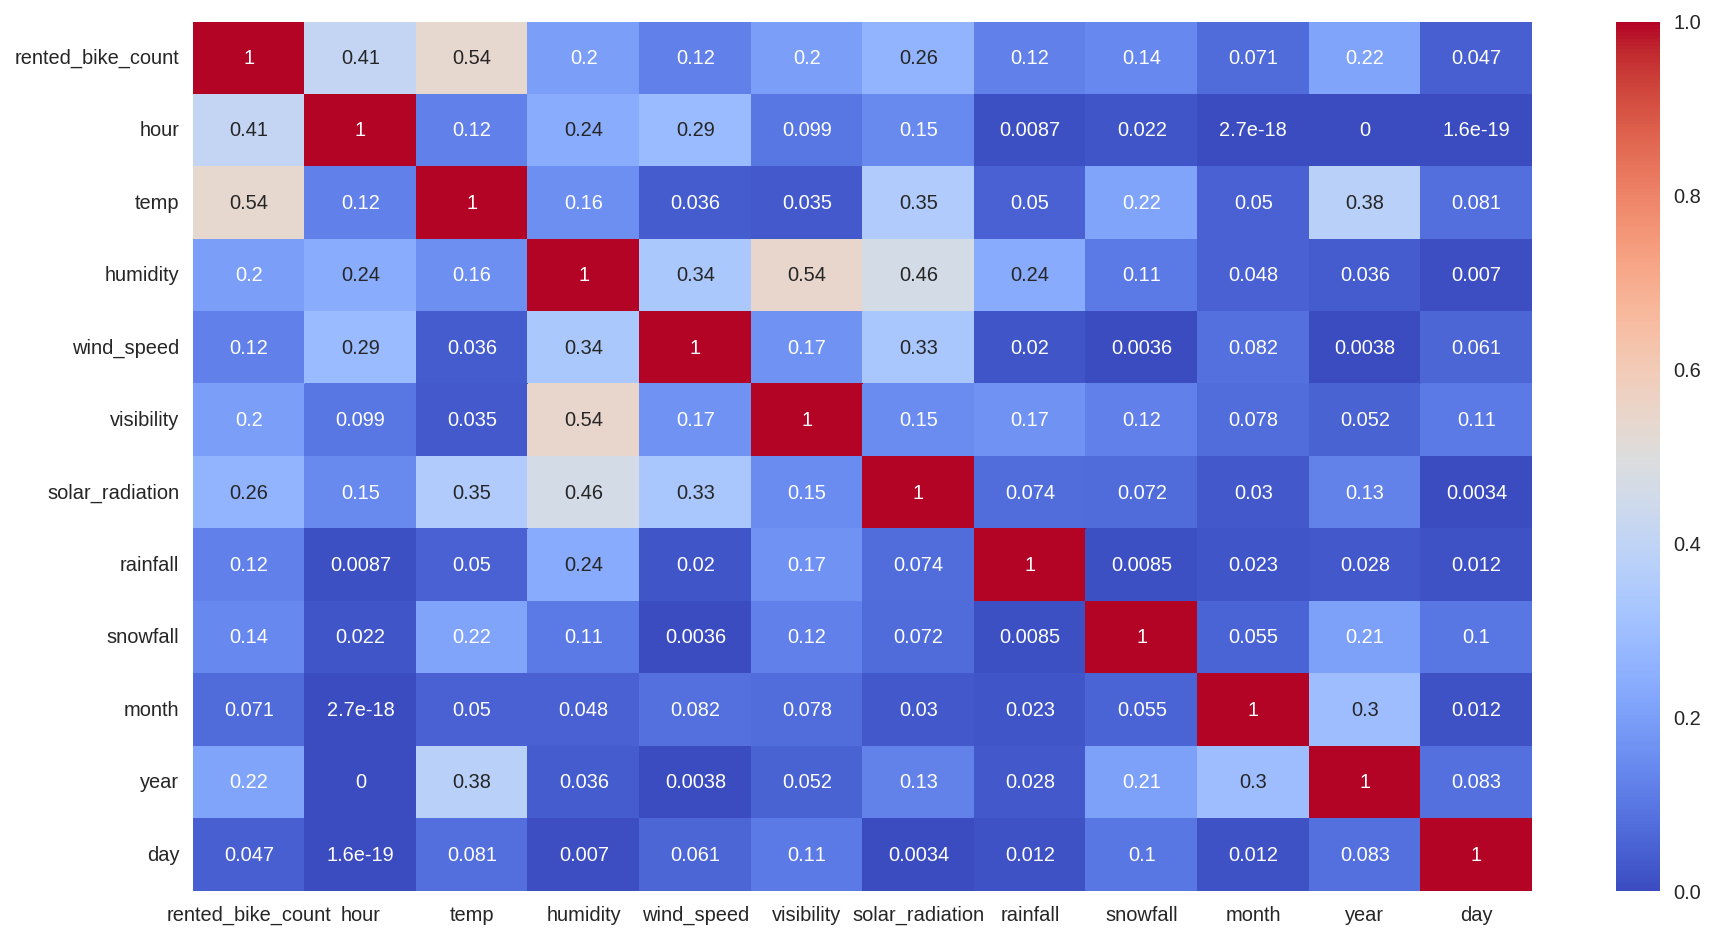

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.head()

date  rented_bike_count  hour  temp  ...  func_day  month  year  day
0 2017-01-12                254     0  -5.2  ...       Yes      1  2017   12
1 2017-01-12                204     1  -5.5  ...       Yes      1  2017   12
2 2017-01-12                173     2  -6.0  ...       Yes      1  2017   12
3 2017-01-12                107     3  -6.2  ...       Yes      1  2017   12
4 2017-01-12                 78     4  -6.0  ...       Yes      1  2017   12

[5 rows x 16 columns]

In [ ]:
# By using vif remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['date','rented_bike_count','hour','month','year','day']]])

variables       VIF
0             temp  3.166007
1         humidity  4.758651
2       wind_speed  4.079926
3       visibility  4.409448
4  solar_radiation  2.246238
5         rainfall  1.078501
6         snowfall  1.118901

In [ ]:
df = df.drop(['humidity',], axis=1)

In [ ]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temp               8760 non-null   float64       
 4   wind_speed         8760 non-null   float64       
 5   visibility         8760 non-null   int64         
 6   solar_radiation    8760 non-null   float64       
 7   rainfall           8760 non-null   float64       
 8   snowfall           8760 non-null   float64       
 9   seasons            8760 non-null   object        
 10  holiday            8760 non-null   object        
 11  func_day           8760 non-null   object        
 12  month              8760 non-null   int64         
 13  year               8760 non-null   int64         
 14  day     

date,month, year day is date time feature

In [ ]:
numeric_features = ['temp','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday',
       'func_day', 'month', 'year', 'day'],
      dtype='object')

In [ ]:
categorical_features = ['date','month','hour','seasons','holiday','func_day','year','day']

In [ ]:
categorical_features = ['date','month','hour','seasons','holiday','func_day','year','day']

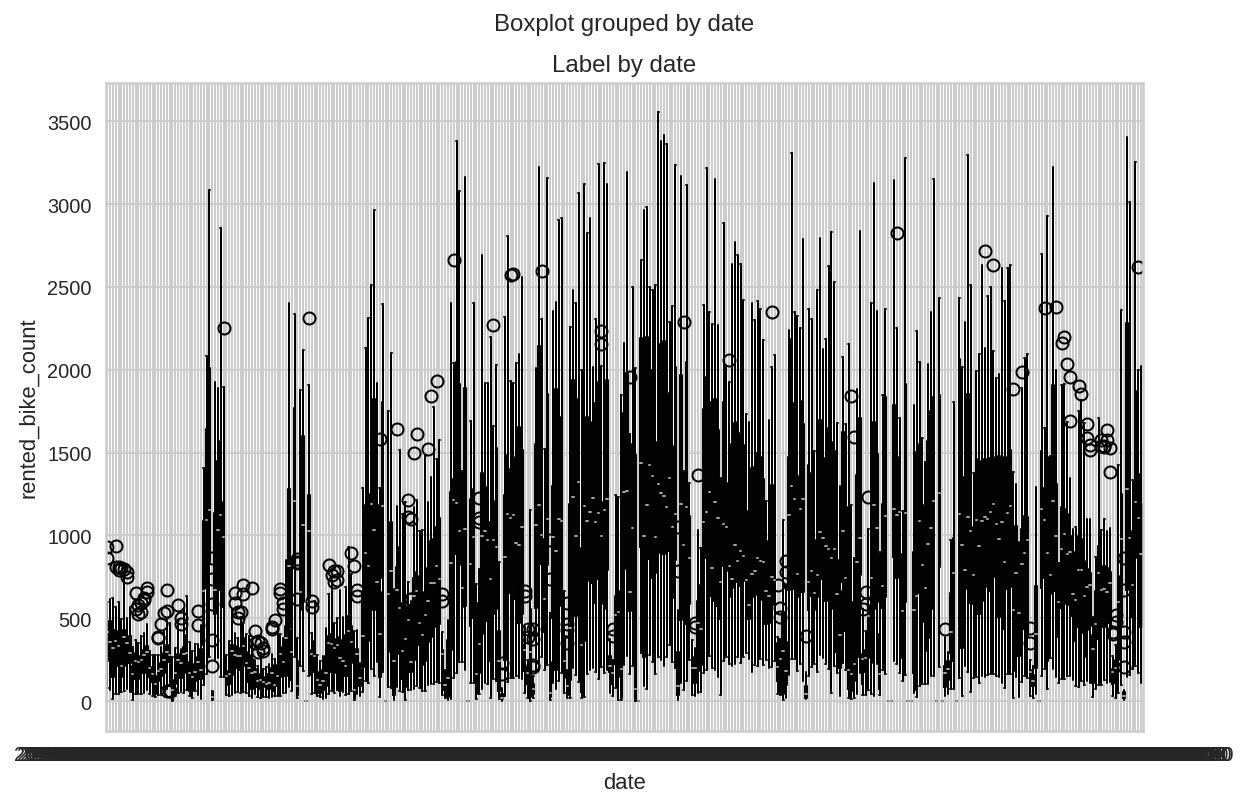

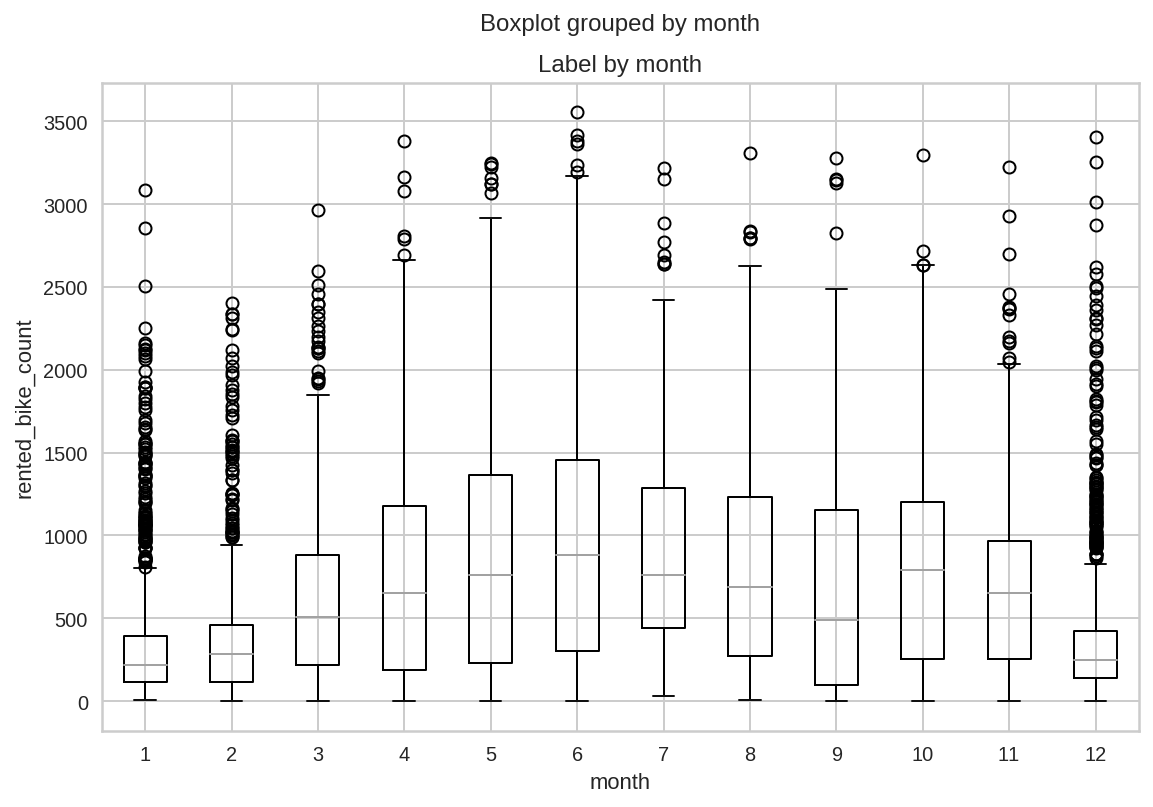

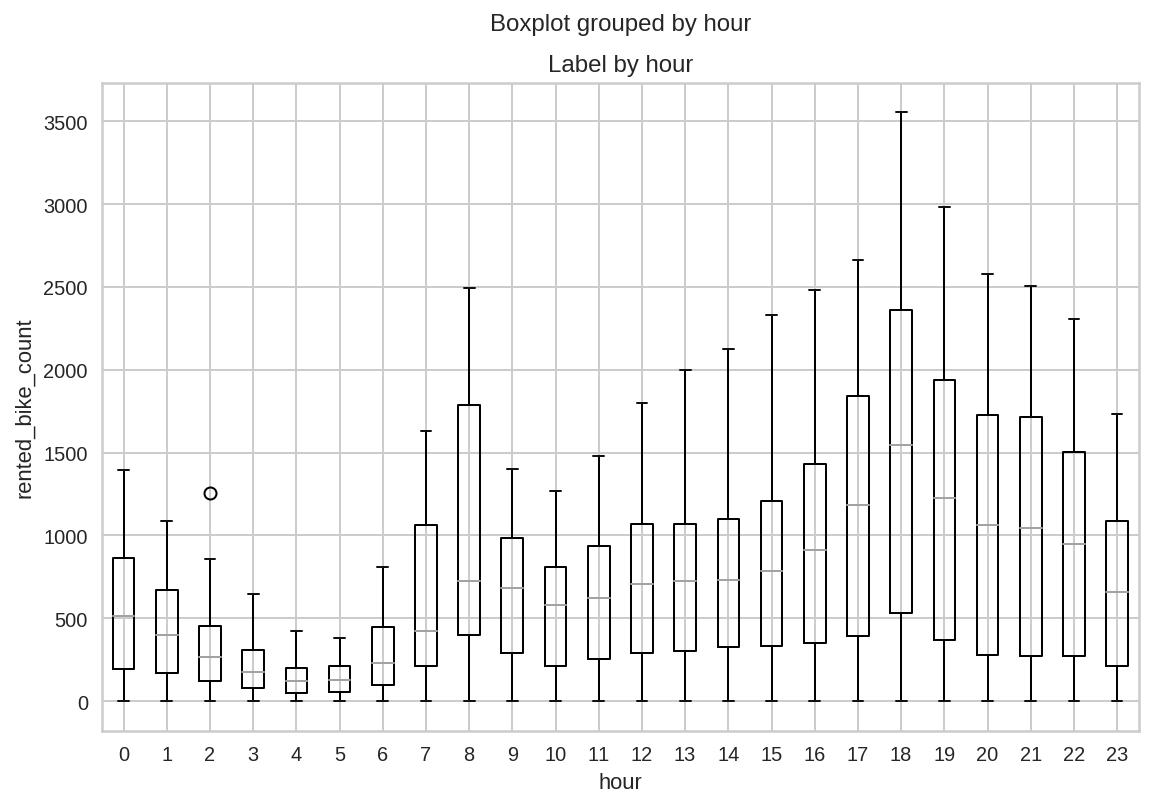

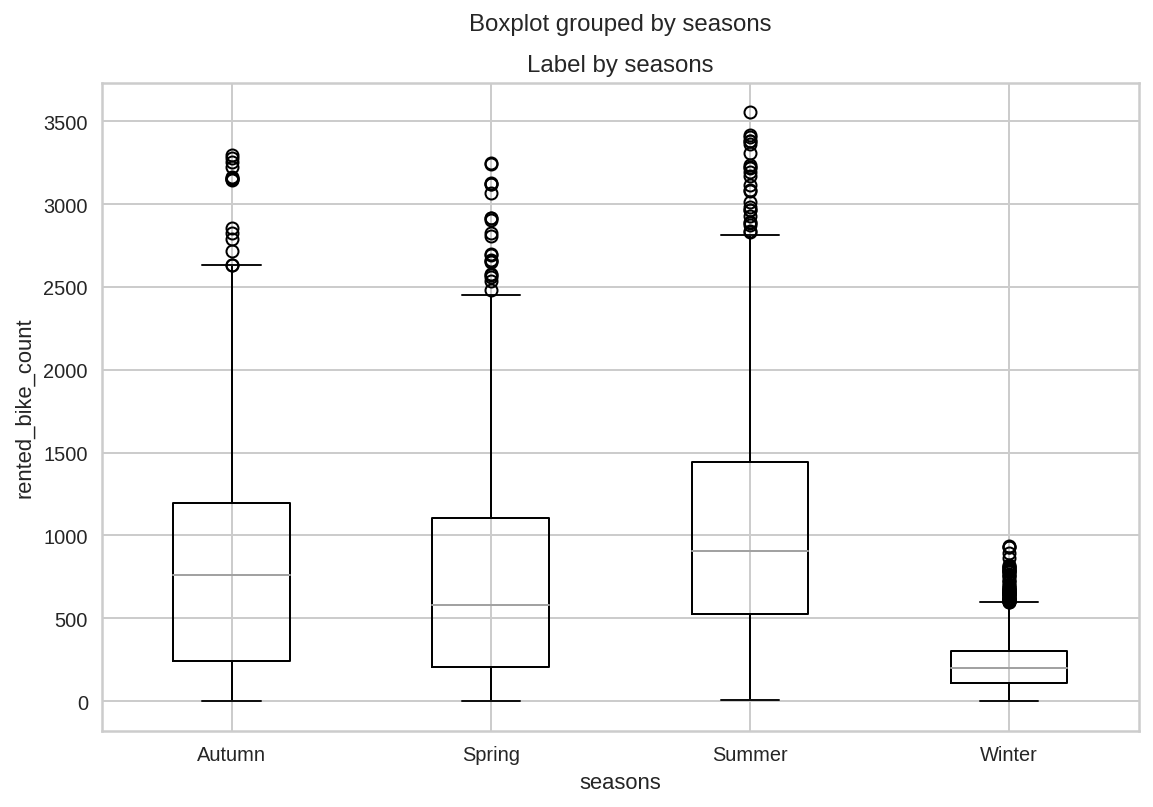

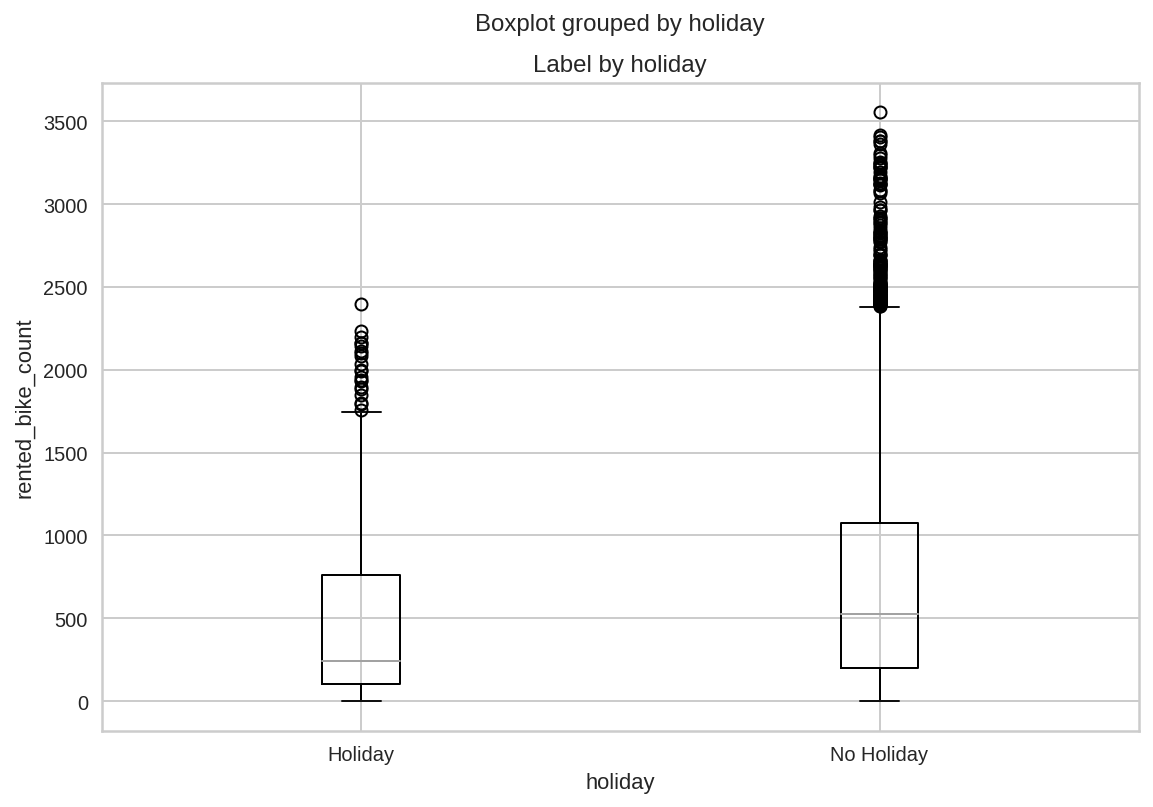

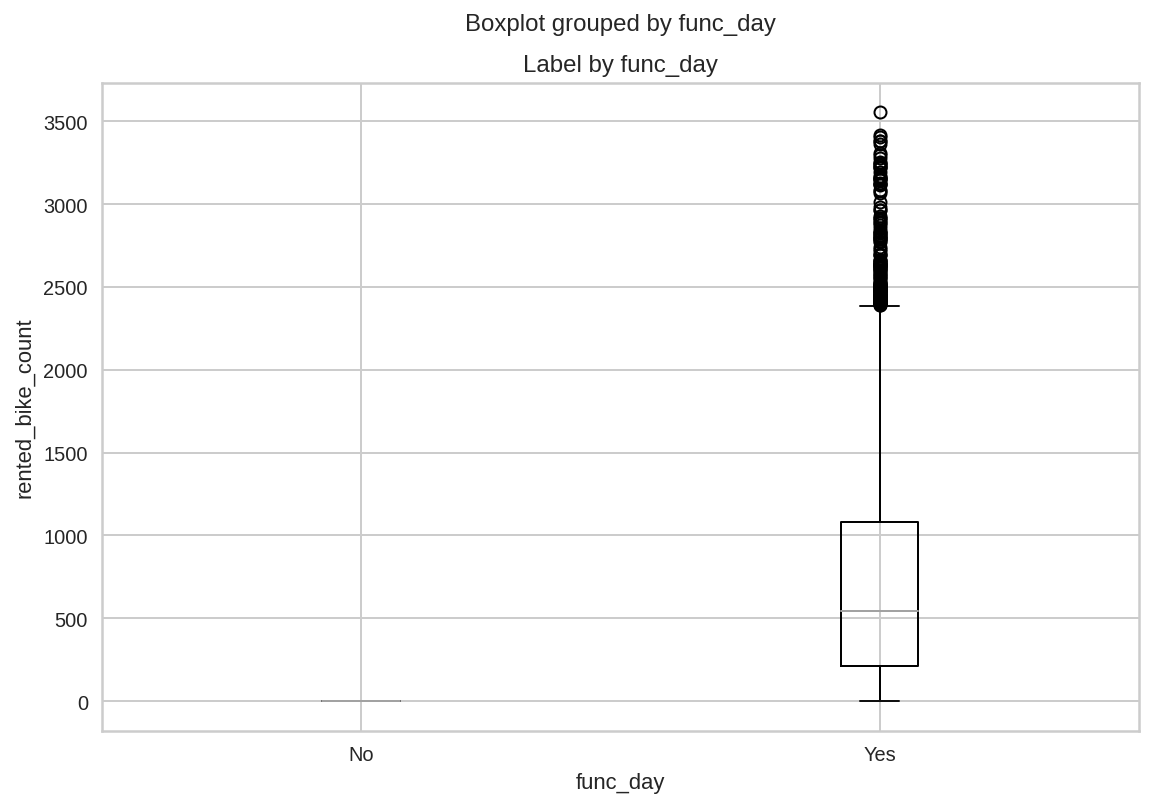

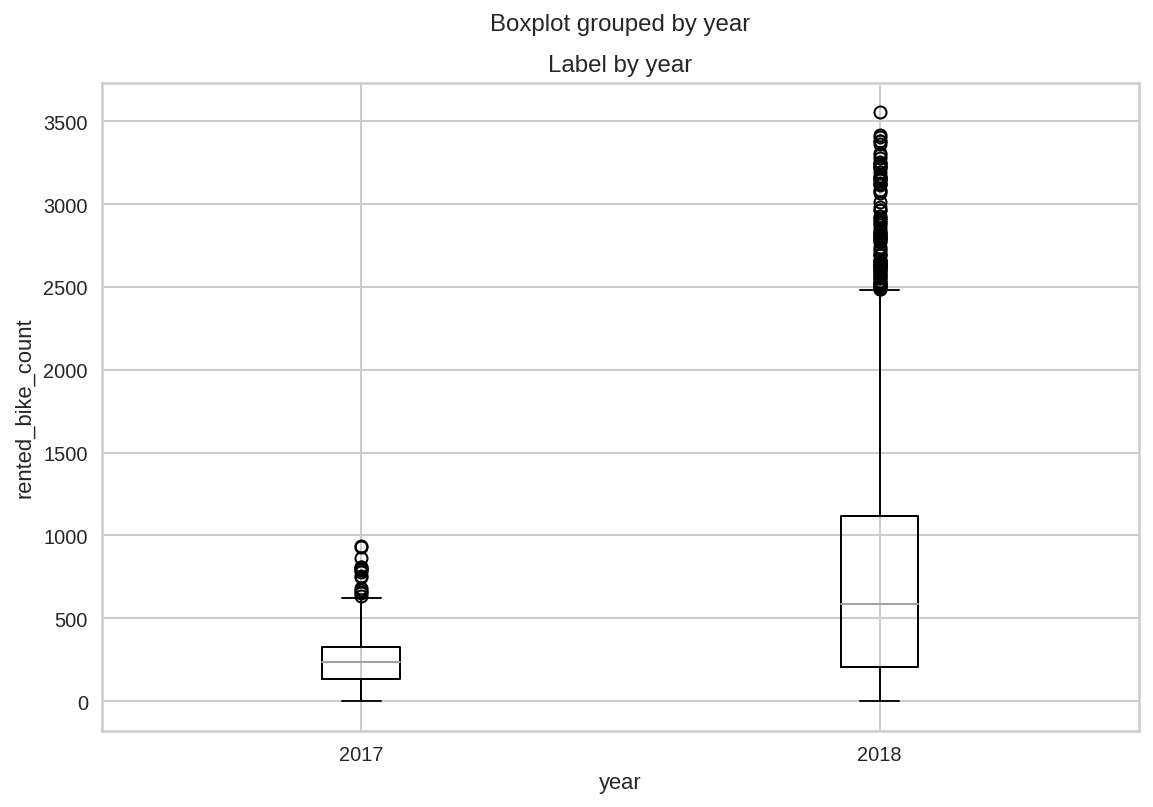

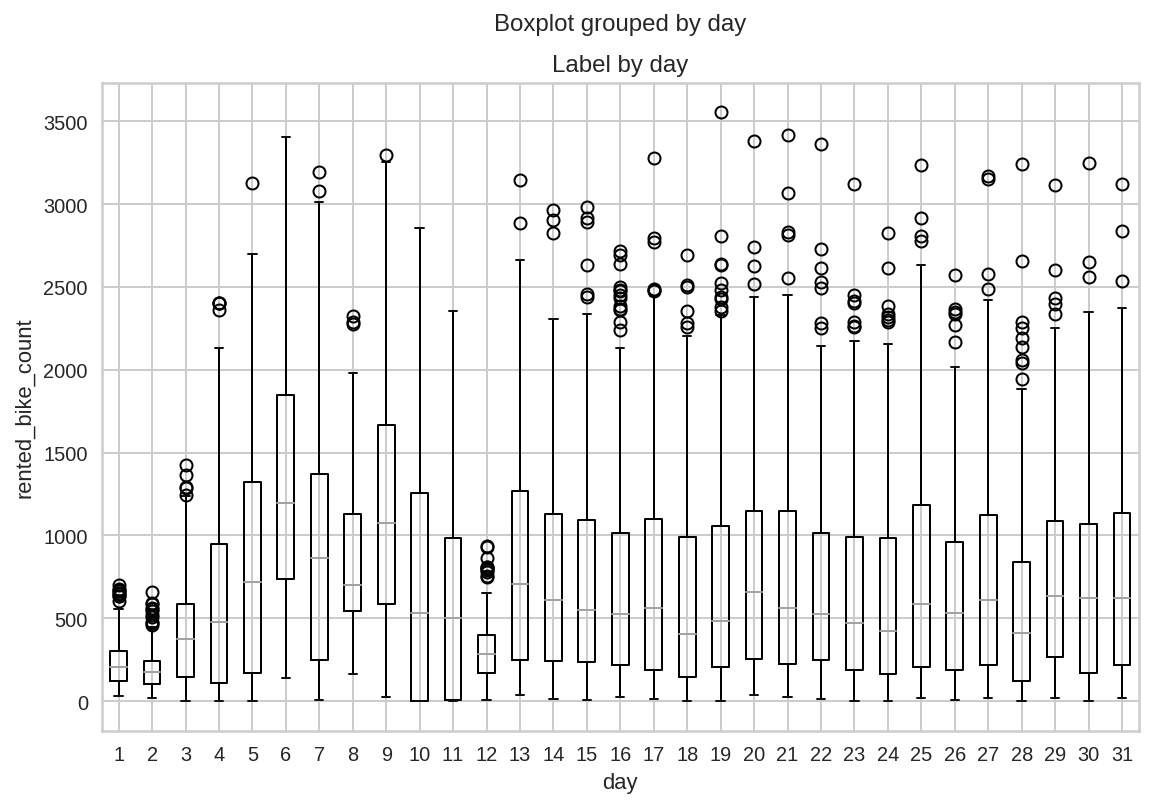

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'rented_bike_count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented_bike_count")
plt.show()

In [ ]:
df.head()

date  rented_bike_count  hour  temp  ...  func_day  month  year  day
0 2017-01-12                254     0  -5.2  ...       Yes      1  2017   12
1 2017-01-12                204     1  -5.5  ...       Yes      1  2017   12
2 2017-01-12                173     2  -6.0  ...       Yes      1  2017   12
3 2017-01-12                107     3  -6.2  ...       Yes      1  2017   12
4 2017-01-12                 78     4  -6.0  ...       Yes      1  2017   12

[5 rows x 15 columns]

#


In [ ]:
#Converting Contionus variable to categorical variable for ease in prediction
df['Isvisibility']=df['visibility'].apply(lambda x: 1 if x>=2000 else 0)
df['Israinfall']=df['rainfall'].apply(lambda x:1 if x>=0.148687 else 0)
df['Issnowfall']=df['snowfall'].apply(lambda x:1 if x>=0.075068 else 0)
df['Issolar_radiation']=df['solar_radiation'].apply(lambda x:1 if x>=0.56911 else 0)

In [ ]:
#Mapping the Variables
df['funct_day']=df['func_day'].map({'Yes':1,'No':0})
df['Isholiday']=df['holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
df.drop(['date','visibility','rainfall','snowfall','solar_radiation','holiday','func_day'],axis=1,inplace=True)

In [ ]:
seasons=pd.get_dummies(df['seasons'],drop_first=True)

In [ ]:
final_df=df.append(seasons)

In [ ]:
final_df.fillna(0,inplace=True)
final_df.drop('seasons',axis=1,inplace=True)

In [ ]:
final_df.isnull().sum()

rented_bike_count    0
hour                 0
temp                 0
wind_speed           0
month                0
year                 0
day                  0
Isvisibility         0
Israinfall           0
Issnowfall           0
Issolar_radiation    0
funct_day            0
Isholiday            0
Spring               0
Summer               0
Winter               0
dtype: int64

In [ ]:
# #Since there was no bike rented in Non Functioning Day we gonna drop the rows 
# df=df[df['funct_day']!=0]

In [ ]:
# # Data encoding
# #label encoding
# encoders_nums = {"func_day":{"Yes":1,"No":0}
#                  }

# final_df = final_df.replace(encoders_nums)

In [ ]:
final_df.head()

rented_bike_count  hour  temp  wind_speed  ...  Isholiday  Spring  Summer  Winter
0              254.0   0.0  -5.2         2.2  ...        0.0     0.0     0.0     0.0
1              204.0   1.0  -5.5         0.8  ...        0.0     0.0     0.0     0.0
2              173.0   2.0  -6.0         1.0  ...        0.0     0.0     0.0     0.0
3              107.0   3.0  -6.2         0.9  ...        0.0     0.0     0.0     0.0
4               78.0   4.0  -6.0         2.3  ...        0.0     0.0     0.0     0.0

[5 rows x 16 columns]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  17520 non-null  float64
 1   hour               17520 non-null  float64
 2   temp               17520 non-null  float64
 3   wind_speed         17520 non-null  float64
 4   month              17520 non-null  float64
 5   year               17520 non-null  float64
 6   day                17520 non-null  float64
 7   Isvisibility       17520 non-null  float64
 8   Israinfall         17520 non-null  float64
 9   Issnowfall         17520 non-null  float64
 10  Issolar_radiation  17520 non-null  float64
 11  funct_day          17520 non-null  float64
 12  Isholiday          17520 non-null  float64
 13  Spring             17520 non-null  float64
 14  Summer             17520 non-null  float64
 15  Winter             17520 non-null  float64
dtypes: float64(16)
memory u

##**Modeling**

# **<a>1.7 Linear regression</a>**

In [ ]:
X=final_df.drop('rented_bike_count',axis=1)
y=final_df['rented_bike_count']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.69864617, 0.75882725, 0.59515362, 0.6880956 , 0.61660564,
       0.70322981, 0.0816897 , 0.05622475, 0.03641255, 0.1596454 ,
       0.69068582, 0.01292322, 0.09250311, 0.0797395 , 0.09255397])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

temp                 0.758827
day                  0.703230
hour                 0.698646
funct_day            0.690686
month                0.688096
year                 0.616606
wind_speed           0.595154
Issolar_radiation    0.159645
Winter               0.092554
Spring               0.092503
Isvisibility         0.081690
Summer               0.079740
Israinfall           0.056225
Issnowfall           0.036413
Isholiday            0.012923
dtype: float64

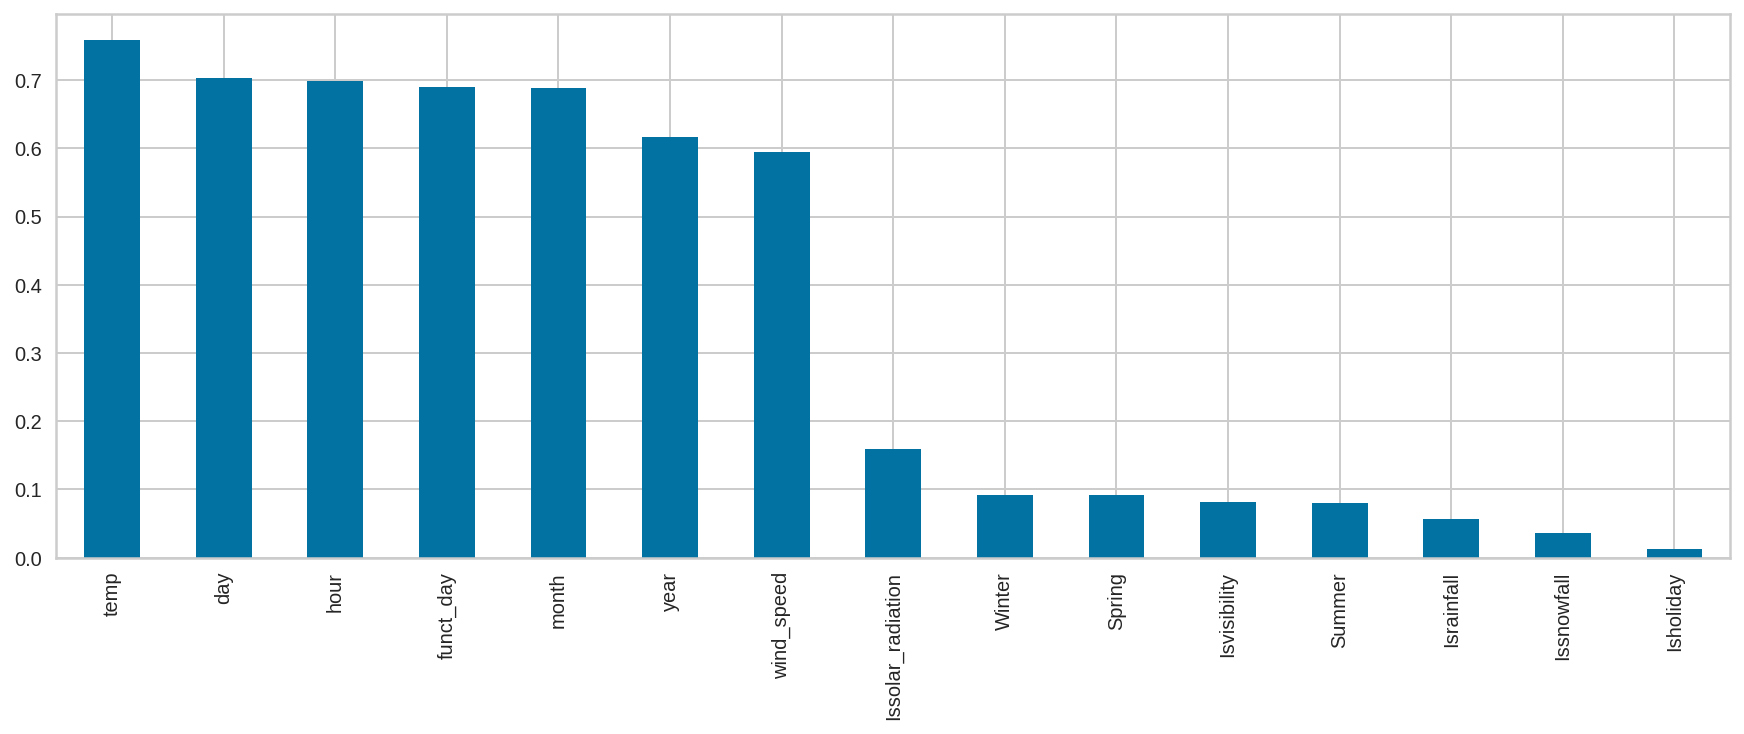

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7035570650074803

Since the score is less, we need to go back to the EDA section and handle the outliers and/or errors in the data.

#Improving Accuracy of model by using various Machine Algorithms 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_
regressor.coef_

array([ 6.82424269e+02,  1.55313599e+03,  1.85152338e+02,  1.06403627e+02,
       -9.00082311e+02, -1.12776175e+01,  7.91632226e+01, -6.40409540e+02,
       -4.29958281e+01,  4.63852588e+01,  8.45709703e+02, -1.23030767e+02,
        1.79364941e-02,  1.79364941e-02,  1.79364941e-02])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([ 1.44392269e+03,  9.35869249e+02, -6.87936530e+02, ...,
        5.37428799e+02, -6.17202106e-01,  1.47792889e-12])

In [ ]:
y_train

6108    670.0
1101      0.0
3849      0.0
4144      0.0
5719      0.0
        ...  
2524      0.0
3204      0.0
5390    999.0
860     322.0
7035      0.0
Name: rented_bike_count, Length: 12264, dtype: float64

In [ ]:
# Actual profits on test data
y_test

6621    1759.0
3394     702.0
123       78.0
3314       0.0
6286       0.0
         ...  
3116    1362.0
5991       0.0
613      262.0
1282     132.0
965        0.0
Name: rented_bike_count, Length: 5256, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)

98244.03887297369

In [ ]:
from numpy import math

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

312.3686497968151

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

313.4390512890404

In [ ]:
r2_score(y_train, y_pred_train)

0.7035570650074803

In [ ]:
r2_score(y_test, y_pred)

0.7101645469287519

##**<a>1.8 Lasso</a>**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7035570649850535

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

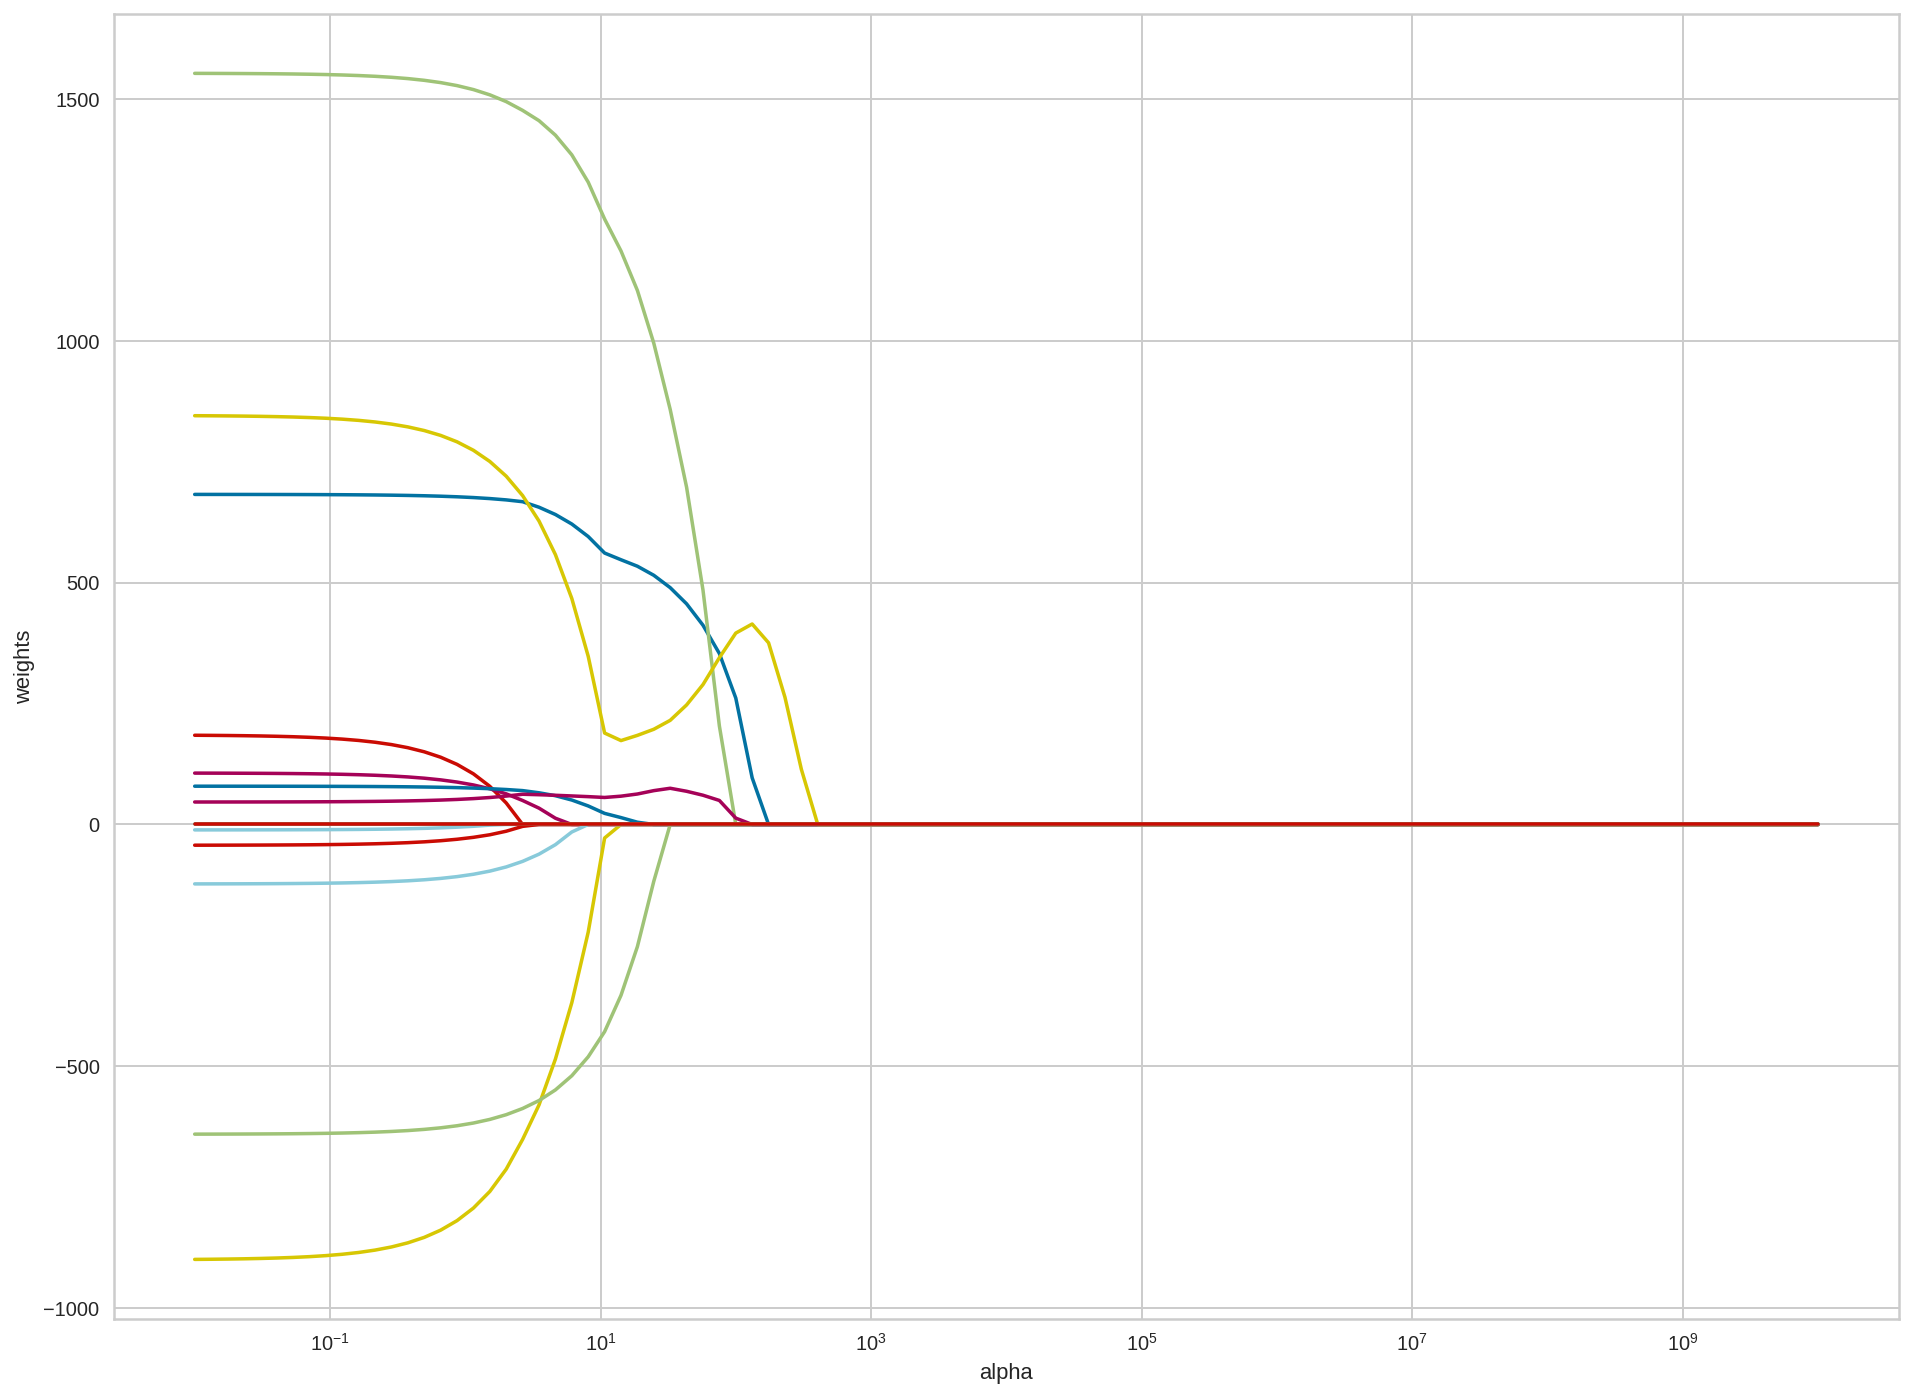

In [ ]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(16, 12))    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, random_state=0)
lassocv.fit(X, y)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, max_iter=100000, random_state=0)

In [ ]:
print("Alpha: %.3f" % lassocv.alpha_)
print('R^2: %.3f' % r2_score(y, lassocv.predict(X)))
print('Mean Squared Error: %.3f' % mean_squared_error(y, lassocv.predict(X)))

Alpha: 1.005
R^2: 0.705
Mean Squared Error: 97906.137


In [ ]:
pd.Series(lassocv.coef_, index=X.columns)

hour                  30.394748
temp                  27.736504
wind_speed            16.442632
month                  9.047034
year                  -0.411959
day                   -0.309495
Isvisibility          80.852077
Israinfall          -614.893838
Issnowfall            -0.000000
Issolar_radiation     35.812297
funct_day            779.044755
Isholiday            -90.151062
Spring                 0.000000
Summer                 0.000000
Winter                 0.000000
dtype: float64

In [ ]:
from yellowbrick.regressor import AlphaSelection

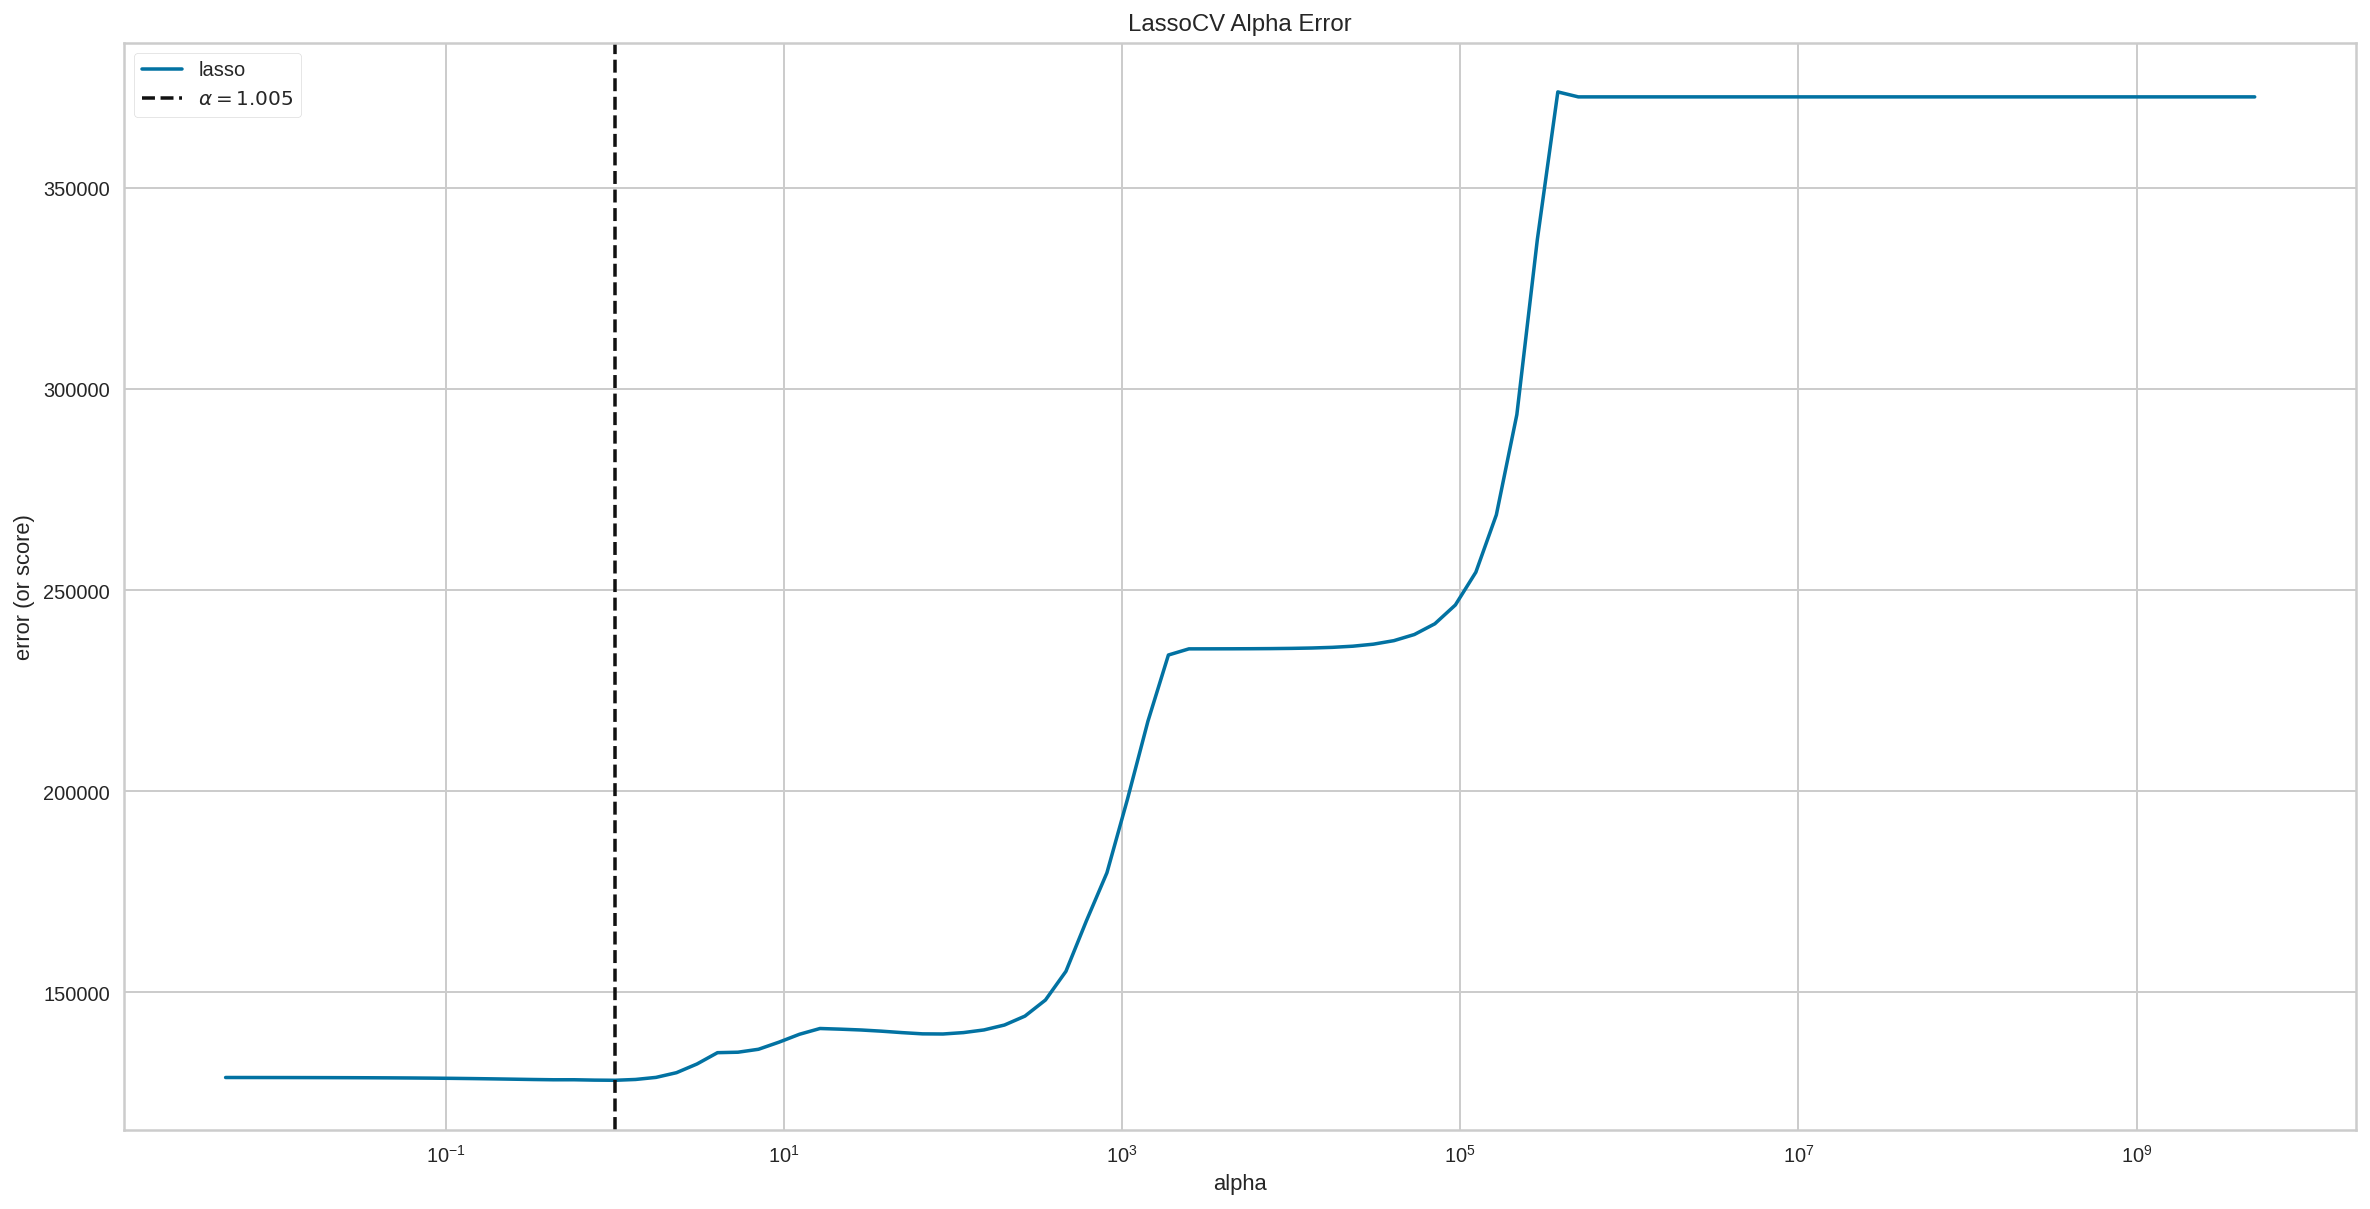

In [ ]:
# Instantiate the linear model and visualizer
model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, random_state=0)
visualizer = AlphaSelection(model)
plt.figure(figsize=(20, 10)) 
visualizer.ax.set_xscale('log')
visualizer.fit(X, y)
visualizer.show()

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, lasso.predict(X_test)))
print('R^2: %.3f' % r2_score(y_test,lasso.predict(X_test)))

Mean Squared Error: 98651.710
R^2: 0.709


In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, lasso.predict(X_test)))
print('R^2: %.3f' % r2_score(y_test,lasso.predict(X_test)))

Mean Squared Error: 98651.710
R^2: 0.709


In [ ]:
pd.Series(lasso.coef_, index=X.columns)

hour                  671.022922
temp                 1494.418303
wind_speed             44.433525
month                  63.324891
year                 -712.560814
day                    -0.000000
Isvisibility           72.280527
Israinfall           -599.982066
Issnowfall            -13.929756
Issolar_radiation      58.708699
funct_day             720.015158
Isholiday             -87.777561
Spring                  0.000000
Summer                  0.000000
Winter                  0.000000
dtype: float64

#**<a>1.9 Ridge Regression</a>**

In [ ]:
pd.Series(lasso.coef_, index=X.columns)

hour                  671.022922
temp                 1494.418303
wind_speed             44.433525
month                  63.324891
year                 -712.560814
day                    -0.000000
Isvisibility           72.280527
Israinfall           -599.982066
Issnowfall            -13.929756
Issolar_radiation      58.708699
funct_day             720.015158
Isholiday             -87.777561
Spring                  0.000000
Summer                  0.000000
Winter                  0.000000
dtype: float64

In [ ]:
ridge = Ridge()
coefs = []

for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X, y)
  coefs.append(ridge.coef_)

Text(0, 0.5, 'weights')

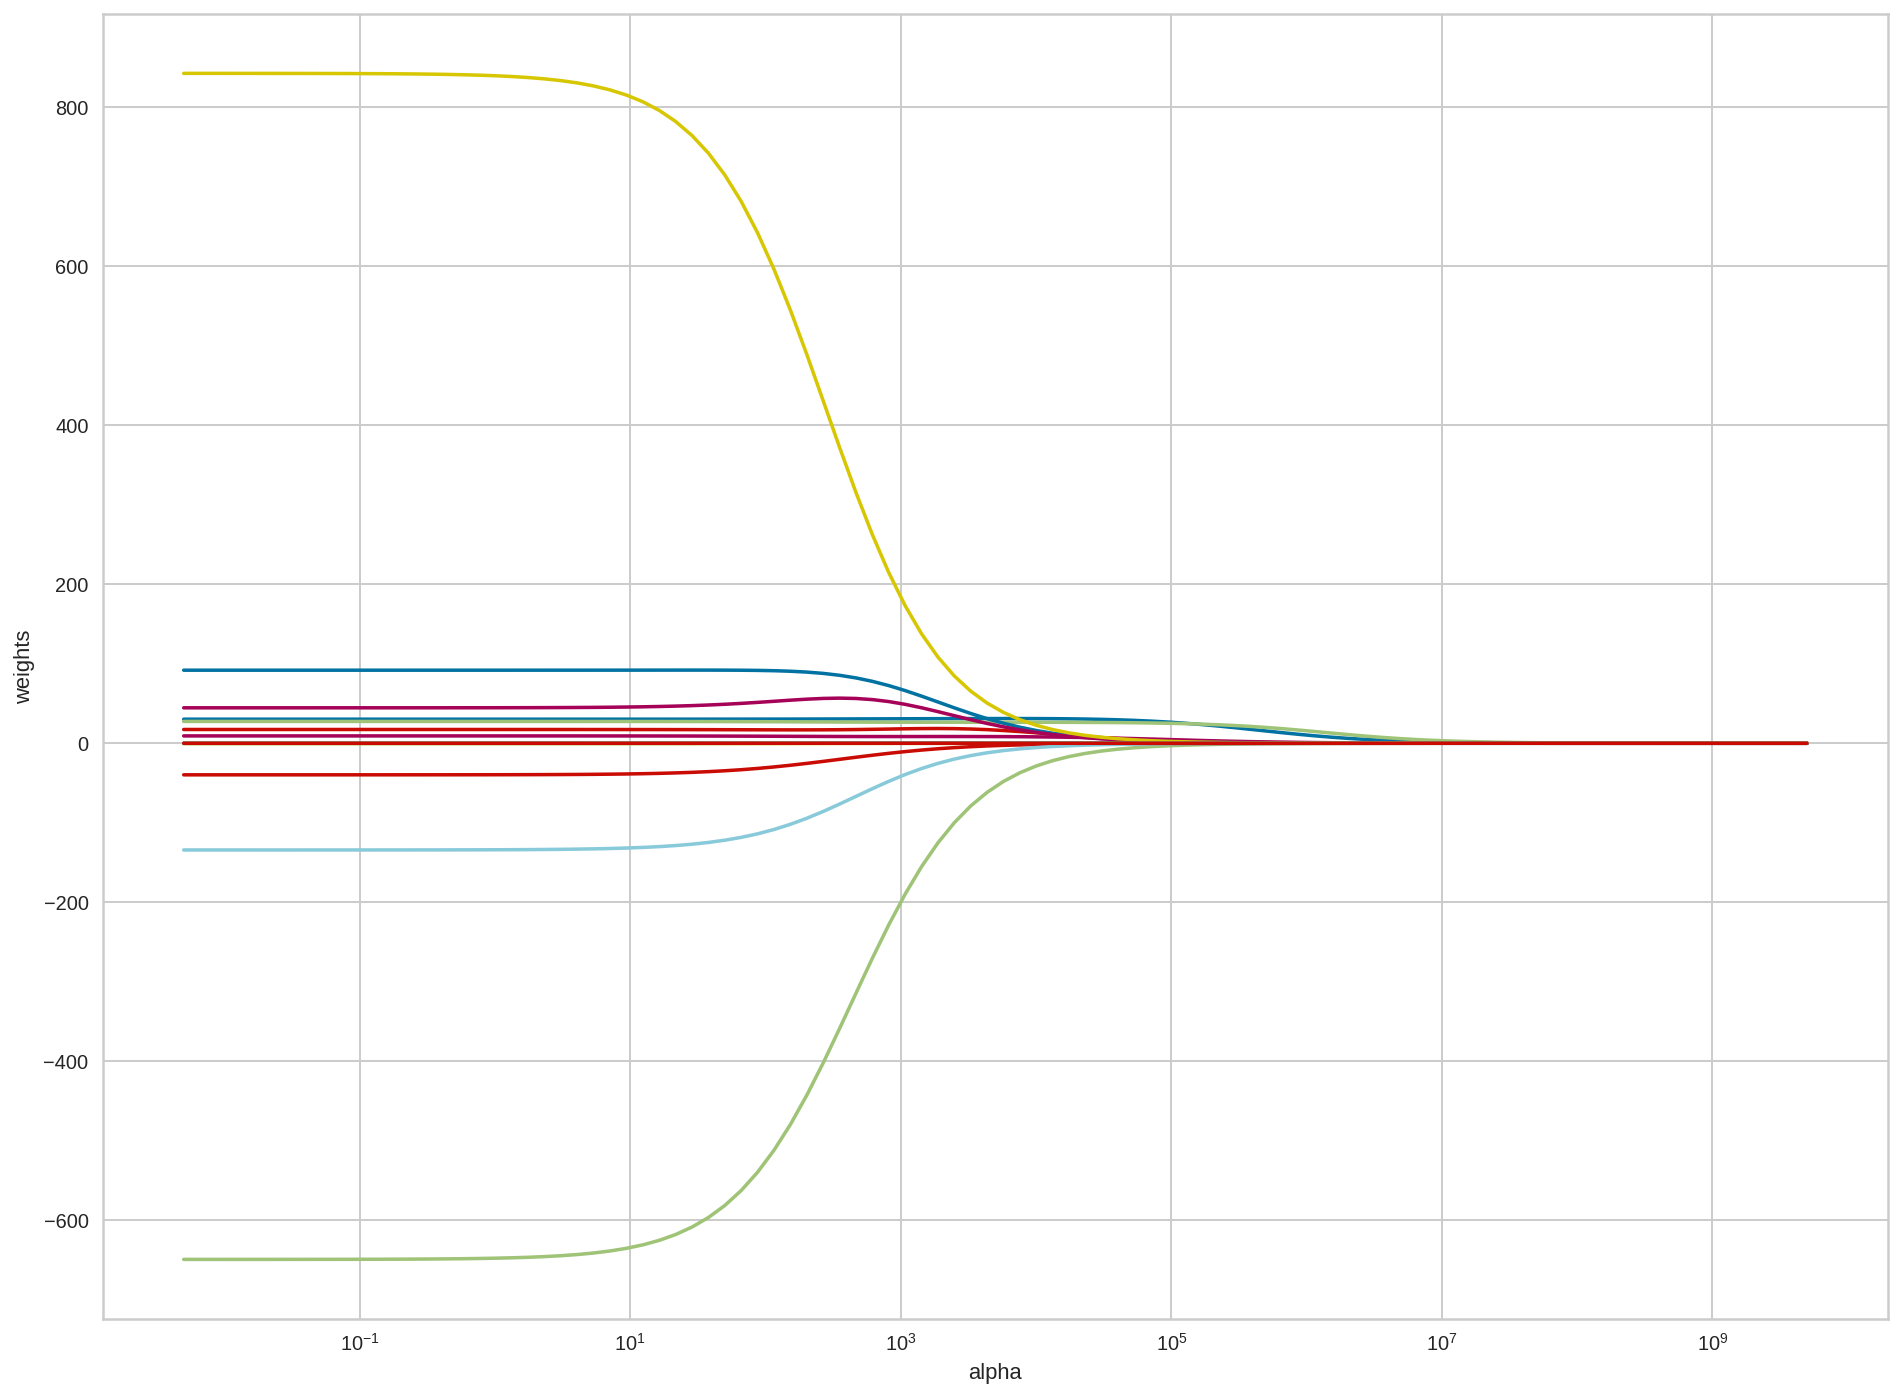

In [ ]:
plt.figure(figsize=(16, 12)) 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv = KFold(n_splits=10, random_state=0, shuffle=True))
ridgecv.fit(X, y)
print('Alpha: %.3f' % ridgecv.alpha_)
print('Mean Squared Error: %.3f' % mean_squared_error(y, ridgecv.predict(X)))
print('R^2: %.3f' % r2_score(y, ridgecv.predict(X)))

Alpha: 0.142
Mean Squared Error: 97711.099
R^2: 0.706


##**<a>2.0 Decision Tree </a>**

In [ ]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    overlay=(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    plt.annotate(s=overlay,xy=(0,2500),size='x-large')


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([2173., 1119.,  169., ...,  286.,  144.,    0.])

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8220223123120893

#**<a>2.1 Light Gradient Boosting Machine</a>**

In [ ]:
X=final_df.drop('rented_bike_count',axis=1)
y=final_df['rented_bike_count']


In [ ]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    overlay=(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    plt.annotate(s=overlay,xy=(0,2500),size='x-large')

[18:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


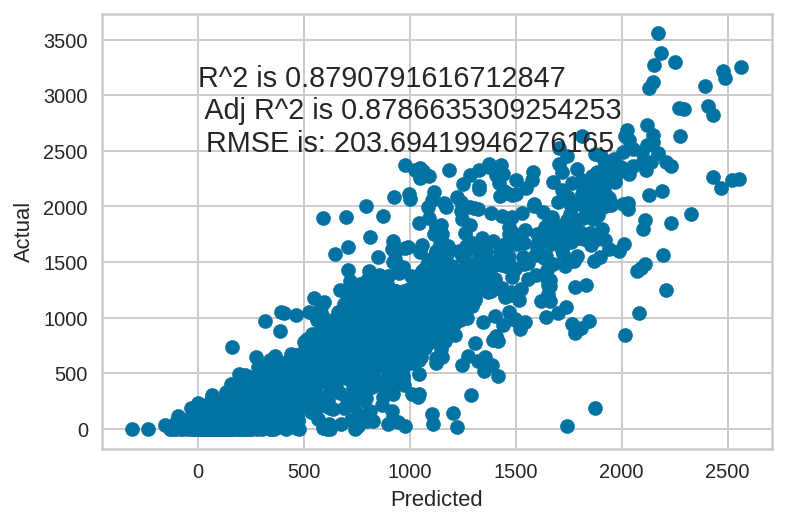

In [ ]:
predict(XGBRegressor(),X,y)

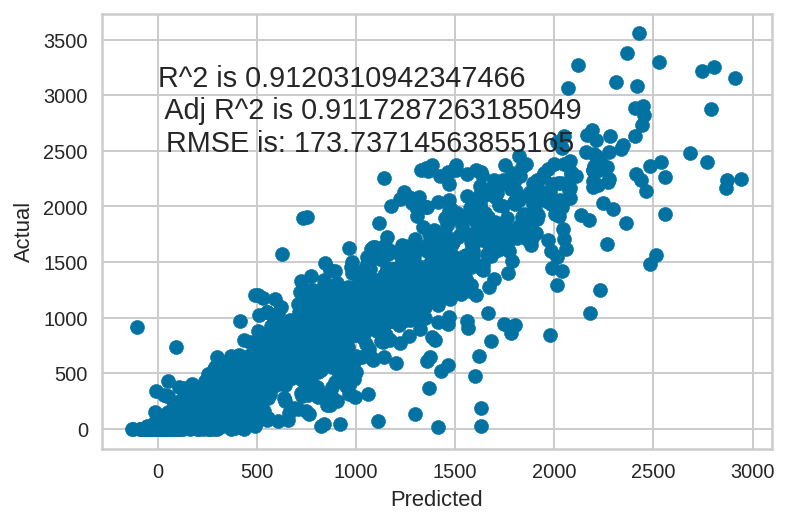

In [ ]:
predict(LGBMRegressor(),X,y)

##<a> 2.2 Random Forest Regressor</a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([2159.8,  938.6,  100.6, ...,  253.2,  165.7,    0. ])

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8919432266405286

(0.0, 3500.0)

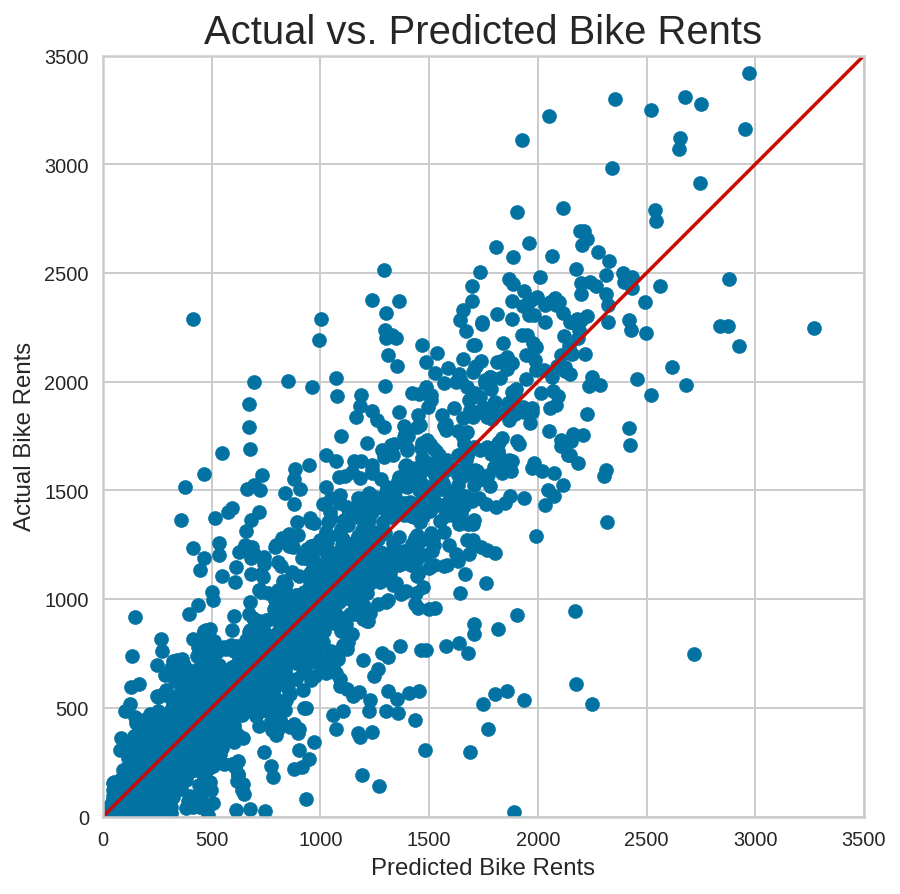

In [ ]:
plt.figure(figsize=(7,7))

# 1:1 line
x = np.linspace(0,3500,10)
y = x

# Scatter plot predicted vs. actual
plt.scatter(y_pred, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Predicted Bike Rents', size=12)
plt.ylabel('Actual Bike Rents', size=12)
plt.title('Actual vs. Predicted Bike Rents', size=20)
plt.xlim(0,3500)
plt.ylim(0,3500)

#<a> 2.3 Conclusion</a>

We have analyzed Seoul city bike sharing dataset. Through analysis, we saw that in general the number of bike rents in 2018 was more than in 2017. The highest number of bike rents occur in summer while the least bike rents occur in winter. In daily basis, the trend of bike rents is almost similar with slight peaking demands on Thursday while drops on Sunday. In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00). There are two peak occurences, at 7.00 and at 17.00, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon.

The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity. The bike counts peak in the afternoon (from 15.00 to 20.00) where temperature is the highest, with the most visibility, windspeed, and least humidity. There were days in a weekday when the bike sharing facility was not functioning. However, during public holidays, the facility was still operating.

Based on this analysis, we built an first Linear Regression model r2 score approximately 70% for improving Accuracy of model by using various Machine Algorithms like XGBoost and LGBM model to predict the number of bike rents and r2 score is 87% and 91%. Also Random forest Regression and Decision Tree it gives r2 score 89% and 82%. We made new features such as hour and month derived from the dates. So We achieved maximum accuracy in LGBM Regression model R2 accuracy of 91.2% based on 10-folds CV. Finally, it was found that rainfall and temperature are the most determining weather predictors.